# <font color='#2DA9B4'>**Data Mining - XYZ Sports Company**</font>
### Group 13 is:
* Andreia Guerreiro | r20201563
* Diogo Liladar | 20211764
* Pedro Barão | r20201614

# <font color='#2DA9B4'>**Index**</font>
* [Data Exploration](#explore)
  * [Duplicate Data](#duplicate)
  * [Statistical Exploration](#statexplor)
* [Visual EDA](#visualeda)
* [Data Preprocessing](#preproc)
  * [Outliers](#outliers)
    * [Manual](#manual)
    * [DBSCAN](#dbscan)
    * [IQ (25th and 75th Percentiles)](#iq)
  * [Missing Values](#missing)
  * [Feature Engineering](#feateng)
  * [Inconsistencies](#incon)
  * [Feature Selection](#featselect)
  * [Data Scaling](#scale)
  * [New Data Exploration](#newexplore)
* [Segment Perspectives](#segpersp)
* [Demographics](#demographics)
  * [Hierarquical Clustering](#hierarch)
  * [KMeans](#kmeans)
  * [Self-Organizing Maps](#som)
  * [Mean Shift Clustering](#msc)
  * [DBSCAN](#dbscanclust)
  * [Gaussian Mixture Model](#gmm)
  * [Demographics Results](#demoresults)
* [Activities](#activities)
  * [KMode](#kmode)
* [Manually Merge](#manually)
* [Clusters Visualization and Interpretation](#visandinterp)

# <font color='#2DA9B4'>**Data Exploration**</font> <a class="anchor" id="explore"></a>
[Back to Contents](#toc)

Before anything, let's start by installing all the necessary packages and libraries.

Because of some package instalations to use SOM, some visualizations might contain different warnings before displaying the image.

In [1]:
#!pip3 install ydata-profiling

In [2]:
#%pip install sompy

In [3]:
#%conda install git

In [4]:
#%pip install -U git+https://github.com/sevamoo/SOMPY.git

In [5]:
#%pip install scikit-image

In [6]:
#%pip install kmodes

In [7]:
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import datetime as dt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.mixture import GaussianMixture
from kmodes.kmodes import KModes
from sklearn.manifold import TSNE
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

Let's import the data and set new ID to the dataframe

In [8]:
df = pd.read_csv('XYZ_sports_dataset.csv', sep = ";")
df.set_index('ID', inplace = True) # set ID to index
df

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   
...    ...     ...     ...             ...              ...             ...   
24937   14    Male     0.0      2016-09-08       2016-09-08      2019-07-01   
24938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   
24939   20    Male  1810.0      2017-03-01       2017-03-31      2017-01-01   
24940   55    Male  4800.0      2018-03-01       2018-03-01      2019-07-01   
24941   32  Female  3700.0      2016-04-01       2019-06-11      2019-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   
...                ...           ...                   ...            ...   
24937       2019-12-31    2019-10-29                     2        1460.45   
24938       2016-06-30    2016-04-27                    38         343.85   
24939       2017-06-30    2017-03-29                     2          43.60   
24940       2019-12-31    2019-10-28                     3         788.60   
24941       2019-06-30    2019-05-28                    14         919.60   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10004  ...              NaN                 41.0                0   
...    ...              ...                  ...              ...   
24937  ...              0.0                112.0               96   
24938  ...              0.0                 57.0                0   
24939  ...              0.0                  6.0                0   
24940  ...              0.0                185.0              155   
24941  ...              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10001                       2.0                       17.42   
10002                       7.0                       30.03   
10003                       2.0                       17.72   
10004                       7.0                       60.97   
...                         ...                         ...   
24937                       4.0                       34.84   
24938                       7.0                       60.97   
24939                       7.0                       30.03   
24940                       3.0                       15.87   
24941                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002      

## <font color='#2DA9B4'>**Duplicate Data**</font> <a class="anchor" id="dupplicate"></a>
[Back to Contents](#toc)

In [9]:
df[df.duplicated(keep = False)]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
18942   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
18942       2019-12-31    2019-07-31                    41          73.35   
22873       2019-12-31    2019-07-31                    41          73.35   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
18942  ...              0.0                 14.0                7   
22873  ...              0.0                 14.0                7   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
18942                       5.0                        44.3   
22873                       5.0                        44.3   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
18942                  10                 1            0.0   
22873                  10                 1            0.0   

       NumberOfReferences  Dropout  
ID                                  
18942                   0        1  
22873                   0        1  

[2 rows x 30 columns]

In [10]:
df.duplicated().value_counts()

False    14941
True         1
Name: count, dtype: int64

We found 1 row that is duplicated and, as such, should be removed from our dataset.

In [11]:
df.drop_duplicates(inplace=True)
df

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   
...    ...     ...     ...             ...              ...             ...   
24937   14    Male     0.0      2016-09-08       2016-09-08      2019-07-01   
24938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   
24939   20    Male  1810.0      2017-03-01       2017-03-31      2017-01-01   
24940   55    Male  4800.0      2018-03-01       2018-03-01      2019-07-01   
24941   32  Female  3700.0      2016-04-01       2019-06-11      2019-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   
...                ...           ...                   ...            ...   
24937       2019-12-31    2019-10-29                     2        1460.45   
24938       2016-06-30    2016-04-27                    38         343.85   
24939       2017-06-30    2017-03-29                     2          43.60   
24940       2019-12-31    2019-10-28                     3         788.60   
24941       2019-06-30    2019-05-28                    14         919.60   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10004  ...              NaN                 41.0                0   
...    ...              ...                  ...              ...   
24937  ...              0.0                112.0               96   
24938  ...              0.0                 57.0                0   
24939  ...              0.0                  6.0                0   
24940  ...              0.0                185.0              155   
24941  ...              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10001                       2.0                       17.42   
10002                       7.0                       30.03   
10003                       2.0                       17.72   
10004                       7.0                       60.97   
...                         ...                         ...   
24937                       4.0                       34.84   
24938                       7.0                       60.97   
24939                       7.0                       30.03   
24940                       3.0                       15.87   
24941                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002      

## <font color='#2DA9B4'>**Statistical Exploration**</font> <a class="anchor" id="statexplor"></a>
[Back to Contents](#toc)

In [12]:
df.shape

(14941, 30)

In [13]:
df.columns

Index(['Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14941 entries, 10000 to 24941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14941 non-null  int64  
 1   Gender                      14941 non-null  object 
 2   Income                      14446 non-null  float64
 3   EnrollmentStart             14941 non-null  object 
 4   EnrollmentFinish            14941 non-null  object 
 5   LastPeriodStart             14941 non-null  object 
 6   LastPeriodFinish            14941 non-null  object 
 7   DateLastVisit               14941 non-null  object 
 8   DaysWithoutFrequency        14941 non-null  int64  
 9   LifetimeValue               14941 non-null  float64
 10  UseByTime                   14941 non-null  int64  
 11  AthleticsActivities         14905 non-null  float64
 12  WaterActivities             14904 non-null  float64
 13  FitnessActivities           1490

Before looking at the missing values, let's ensure that all blank spaces are properly labeled as missing data.

In [15]:
df.replace("", np.nan, inplace = True)

In [16]:
df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

In [17]:
df.isna().sum()/len(df)*100

Age                           0.000000
Gender                        0.000000
Income                        3.313031
EnrollmentStart               0.000000
EnrollmentFinish              0.000000
LastPeriodStart               0.000000
LastPeriodFinish              0.000000
DateLastVisit                 0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
UseByTime                     0.000000
AthleticsActivities           0.240948
WaterActivities               0.247641
FitnessActivities             0.234255
DanceActivities               0.240948
TeamActivities                0.234255
RacketActivities              0.247641
CombatActivities              0.220869
NatureActivities              0.314571
SpecialActivities             0.294492
OtherActivities               0.234255
NumberOfFrequencies           0.174018
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      3.580751
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits       

Some variables include missing values, with *Income* and *AllowedWeeklyVisitsBySLA* standing from the other variables, with more than 3% of their data being missing.

Let's make a general analysis of our data using Profile Report.

In [18]:
#profile = ProfileReport(df, title = 'Profiling Report')
#profile

In [19]:
df.describe().T

count         mean          std   min      25%  \
Age                         14941.0    26.016732    14.156592  0.00    19.00   
Income                      14446.0  2230.970511  1566.471988  0.00  1470.00   
DaysWithoutFrequency        14941.0    81.227629   144.204026  0.00    13.00   
LifetimeValue               14941.0   302.577212   364.326932  0.00    83.60   
UseByTime                   14941.0     0.047119     0.211900  0.00     0.00   
AthleticsActivities         14905.0     0.007380     0.085593  0.00     0.00   
WaterActivities             14904.0     0.296162     0.456579  0.00     0.00   
FitnessActivities           14906.0     0.576077     0.494195  0.00     0.00   
DanceActivities             14905.0     0.000000     0.000000  0.00     0.00   
TeamActivities              14906.0     0.055548     0.229055  0.00     0.00   
RacketActivities            14904.0     0.023417     0.151227  0.00     0.00   
CombatActivities            14908.0     0.107929     0.310301  0.00     0.00   
NatureActivities            14894.0     0.000000     0.000000  0.00     0.00   
SpecialActivities           14897.0     0.026515     0.160668  0.00     0.00   
OtherActivities             14906.0     0.001878     0.043302  0.00     0.00   
NumberOfFrequencies         14915.0    40.122293    65.468305  1.00     7.00   
AttendedClasses             14941.0    10.152667    29.155167  0.00     0.00   
AllowedWeeklyVisitsBySLA    14406.0     5.759614     2.118931  1.00     4.00   
AllowedNumberOfVisitsBySLA  14941.0    41.636121    21.066860  0.56    25.72   
RealNumberOfVisits          14941.0     5.320394     6.333055  0.00     1.00   
NumberOfRenewals            14941.0     1.205274     1.381350  0.00     0.00   
HasReferences               14929.0     0.019894     0.139641  0.00     0.00   
NumberOfReferences          14941.0     0.022288     0.166783  0.00     0.00   
Dropout                     14941.0     0.800950     0.399299  0.00     1.00   

                                50%      75%       max  
Age                           23.00    31.00     87.00  
Income                      1990.00  2790.00  10890.00  
DaysWithoutFrequency          41.00    84.00   1745.00  
LifetimeValue                166.20   355.10   6727.80  
UseByTime                      0.00     0.00      1.00  
AthleticsActivities            0.00     0.00      1.00  
WaterActivities                0.00     1.00      1.00  
FitnessActivities              1.00     1.00      1.00  
DanceActivities                0.00     0.00      0.00  
TeamActivities                 0.00     0.00      1.00  
RacketActivities               0.00     0.00      1.00  
CombatActivities               0.00     0.00      1.00  
NatureActivities               0.00     0.00      0.00  
SpecialActivities              0.00     0.00      1.00  
OtherActivities                0.00     0.00      1.00  
NumberOfFrequencies           18.00    45.00   1031.00  
AttendedClasses                0.00     3.00    581.00  
AllowedWeeklyVisitsBySLA       7.00     7.00      7.00  
AllowedNumberOfVisitsBySLA    38.99    60.97    240.03  
RealNumberOfVisits             4.00     7.00     84.00  
NumberOfRenewals               1.00     2.00      6.00  
HasReferences                  0.00     0.00      1.00  
NumberOfReferences             0.00     0.00      3.00  
Dropout                        1.00     1.00      1.00

Immediately, *DanceActivities* and NatureActivities stand out for being univariate variables.

Furthermore, *AllowedNumberOfVisitsBySLA*, which should only contain integer values given its nature, has a minimum value of 0.56.

In [20]:
len(df[df['AllowedNumberOfVisitsBySLA']<1])

7

In fact, 7 customers had their number of visits by SLA with values smaller than 1.

However, since this variable was later removed from the analysisz, it was an inconsistency not worth solving at this stage.

In [21]:
pd.set_option("display.max_columns", 30)
df[df['AthleticsActivities'].isna() | df['WaterActivities'].isna() | df['FitnessActivities'].isna() | df['DanceActivities'].isna() | df['TeamActivities'].isna() | df['RacketActivities'].isna() | df['CombatActivities'].isna() | df['NatureActivities'].isna() | df['SpecialActivities'].isna() | df['OtherActivities'].isna()]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   
10089   20  Female  1300.0      2016-04-27       2016-11-02      2016-07-01   
10145   20    Male  1630.0      2019-09-25       2019-10-31      2019-07-01   
10229   35    Male  3740.0      2017-03-24       2018-07-31      2018-01-01   
10240   40  Female  3070.0      2015-01-07       2015-12-05      2015-07-01   
...    ...     ...     ...             ...              ...             ...   
24830    2    Male  2750.0      2018-07-26       2018-07-26      2019-07-01   
24835   21    Male  1700.0      2019-03-11       2019-09-10      2019-07-01   
24840   62  Female  3570.0      2016-07-19       2017-04-07      2017-01-01   
24910   25    Male  1600.0      2014-09-03       2015-09-14      2015-01-01   
24929   32  Female  4050.0      2017-10-31       2018-03-10      2018-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10004       2018-06-30    2017-11-09                   210         373.20   
10089       2016-12-31    2016-10-20                    13          82.60   
10145       2019-12-31    2019-10-21                    10          45.10   
10229       2018-12-31    2018-07-25                     6         475.00   
10240       2015-12-31    2015-10-20                    46         157.20   
...                ...           ...                   ...            ...   
24830       2019-12-31    2019-10-19                    12         773.32   
24835       2019-12-31    2019-07-30                    42         110.20   
24840       2017-06-30    2016-10-18                   171         186.10   
24910       2015-06-30    2014-12-15                   273         285.20   
24929       2018-06-30    2018-01-29                    40         134.60   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10004          0                  0.0              0.0                1.0   
10089          0                  0.0              0.0                1.0   
10145          0                  0.0              0.0                1.0   
10229          0                  NaN              1.0                0.0   
10240          0                  0.0              0.0                1.0   
...          ...                  ...              ...                ...   
24830          0                  0.0              1.0                0.0   
24835          0                  0.0              0.0                1.0   
24840          0                  NaN              0.0                1.0   
24910          0                  NaN              1.0                0.0   
24929          0                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10004              0.0             0.0               0.0               0.0   
10089              0.0             0.0               0.0               0.0   
10145              0.0             0.0               0.0               0.0   
10229              0.0             0.0               0.0               0.0   
10240              0.0             0.0               NaN               0.0   
...                ...             ...               ...               ...   
24830              0.0             0.0               0.0               0.0   
24835              0.0             NaN               0.0               0.0   
24840              0.0             0.0               0.0               0.0   
24910              0.0             0.0               0.0               0.0   
24929              0.0             0.0 

When verifying the remaining activities, no issue seems to stand out.

In [22]:
df.describe(include = ['O']).T

count unique         top  freq
Gender            14941      2      Female  8930
EnrollmentStart   14941   1490  2015-03-02    92
EnrollmentFinish  14941   1300  2015-09-16  1684
LastPeriodStart   14941     12  2019-07-01  3171
LastPeriodFinish  14941     11  2019-12-31  3693
DateLastVisit     14941   1384  2019-10-31   475

The categorical variables also do not seem to reveal any unusual values.

In [23]:
df.skew(numeric_only=True)

Age                            1.073237
Income                         0.978243
DaysWithoutFrequency           5.194539
LifetimeValue                  3.054193
UseByTime                      4.275059
AthleticsActivities           11.512346
WaterActivities                0.893013
FitnessActivities             -0.307923
DanceActivities                0.000000
TeamActivities                 3.881271
RacketActivities               6.303717
CombatActivities               2.527381
NatureActivities               0.000000
SpecialActivities              5.894757
OtherActivities               23.010119
NumberOfFrequencies            4.843675
AttendedClasses                5.250789
AllowedWeeklyVisitsBySLA      -1.228765
AllowedNumberOfVisitsBySLA     1.090192
RealNumberOfVisits             2.872922
NumberOfRenewals               1.198479
HasReferences                  6.877194
NumberOfReferences             8.990330
Dropout                       -1.507596
dtype: float64

From the skewness of each variable, we know that:

*   If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
*   If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed.
*   If the skewness is less than -1 or greater than 1, the data are highly skewed.

With this, the variables seem highly skewed, with only a few exceptions with a moderate skewness.


In [24]:
df.kurt(numeric_only=True)

Age                             1.677344
Income                          1.494325
DaysWithoutFrequency           36.665633
LifetimeValue                  18.265873
UseByTime                      16.278309
AthleticsActivities           130.551628
WaterActivities                -1.202690
FitnessActivities              -1.905439
DanceActivities                 0.000000
TeamActivities                 13.066016
RacketActivities               37.741912
CombatActivities                4.388243
NatureActivities                0.000000
SpecialActivities              32.752556
OtherActivities               527.536365
NumberOfFrequencies            37.727239
AttendedClasses                43.679810
AllowedWeeklyVisitsBySLA       -0.318957
AllowedNumberOfVisitsBySLA      9.752482
RealNumberOfVisits             14.621755
NumberOfRenewals                0.835811
HasReferences                  45.301864
NumberOfReferences            100.347171
Dropout                         0.272883
dtype: float64

Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis, making the normal kurtosis distribution equal to 0.

Along with skewness, kurtosis is a helpful descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

High kurtosis in a data set indicates that data has heavy outliers.

Low kurtosis in a data set is an indicator that data has a lack of outliers.

In this case, there are several activities with high kurtosis, however, since the values could only be 0 or 1, there are no extreme outliers.

# <font color='#2DA9B4'>**Visual EDA**</font> <a class="anchor" id="visualeda"></a>
[Back to Contents](#toc)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', var

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRL.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHIC.TTF', name='Century Gothic', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DROGM.TTF', name='Guttman Drogolin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 6.888636363636364
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GYADBR.TTF', name='Guttman Yad-Brush', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAH.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNAB.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GAHROM.TTF', name='Guttman Aharoni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCMI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAMDCN.TTF', name='Franklin Gothic Medium Cond', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiaz.ttf', name='Georgia', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MATURASC.TTF', name='Matura MT Script Capitals', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegoeIcons.ttf', name='Segoe Fluent Icons', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', s

<Axes: xlabel='Age', ylabel='Count'>

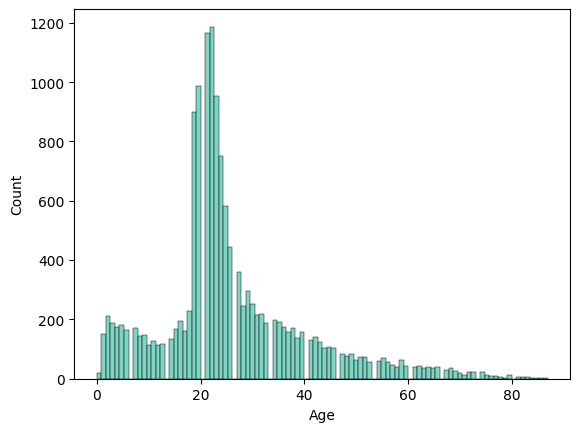

In [25]:
sns.histplot(data = df, x = 'Age', color = '#55c6b1', bins = 100)

There are people with age less than 18 year old buying / doing activities.

In [26]:
df['Age'].min()

0

In [27]:
len(df[df['Age']==0])

19

We have 19 people with 0 years old in our dataset.

In [28]:
len(df[df['Age'] < 4])/len(df)*100

3.835084666354327

If we keep only children until 3 years old on our dataset, we are removing approximately 3.84% of data.

<Axes: xlabel='Age'>

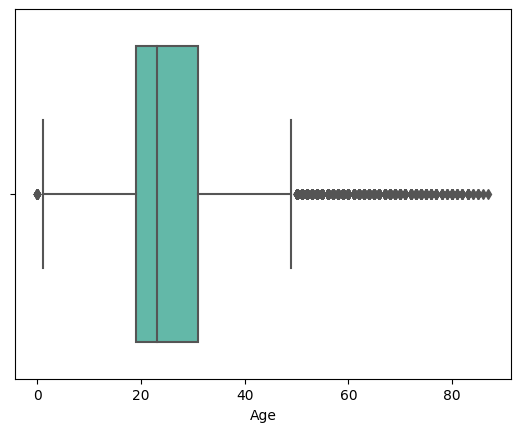

In [29]:
sns.boxplot(x = 'Age', data = df, color = '#55c6b1')

<Axes: xlabel='Income', ylabel='Count'>

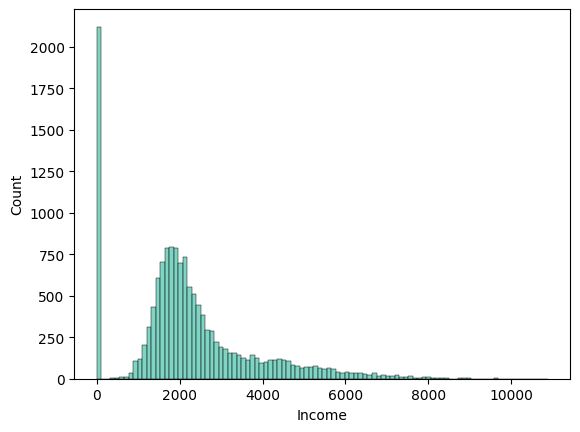

In [30]:
sns.histplot(df['Income'], color = '#55c6b1', bins = 100)

In [31]:
len(df[df['Income']==0])/len(df)*100

14.202529951141155

<Axes: xlabel='Income'>

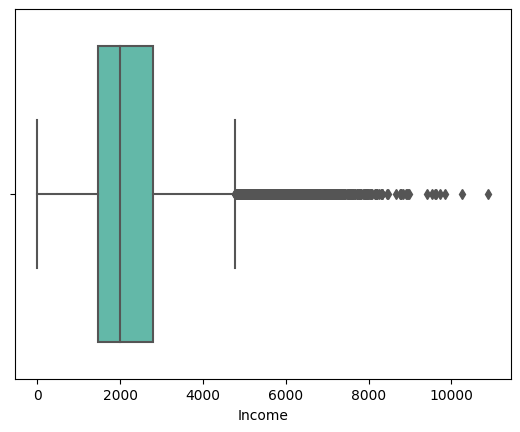

In [32]:
sns.boxplot(x = 'Income', data = df, color = '#55c6b1')

In [33]:
df[df['Age']<15][['Age','Income']].value_counts()

Age  Income
2    0.0       178
3    0.0       159
5    0.0       149
4    0.0       142
7    0.0       142
6    0.0       134
9    0.0       133
1    0.0       130
8    0.0       128
14   0.0       117
11   0.0       108
10   0.0       102
13   0.0        99
12   0.0        99
0    0.0        16
9    3490.0      1
5    3400.0      1
     3380.0      1
11   1120.0      1
4    3430.0      1
2    2750.0      1
13   1260.0      1
     3870.0      1
2    2260.0      1
14   1390.0      1
     2640.0      1
Name: count, dtype: int64

It seems that there is another inconsistency in the data. If we assume that XYZ is a company in the European Union context, then it is not expected that children with less than 15 years old present an income.

Not only does this happen in the data, but the registered incomes also reached high values.

<Axes: xlabel='DaysWithoutFrequency'>

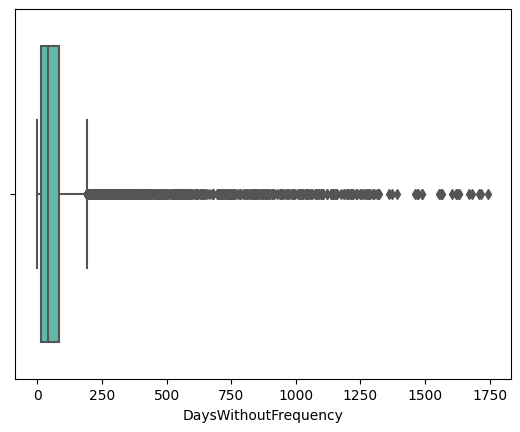

In [34]:
sns.boxplot(x = 'DaysWithoutFrequency', data = df, color = '#55c6b1')

<Axes: xlabel='LifetimeValue'>

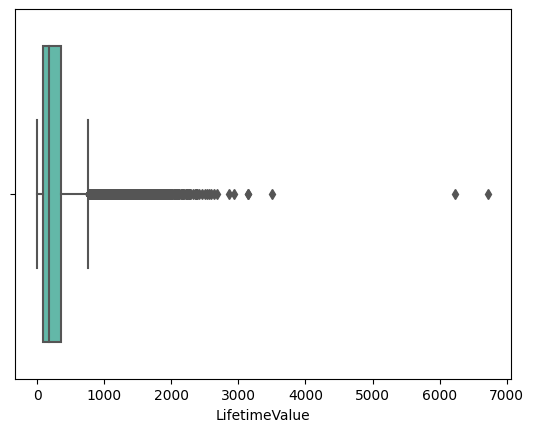

In [35]:
sns.boxplot(x = 'LifetimeValue', data = df, color = '#55c6b1')

It seems that we have encountered some outliers in this variable. Let's take a look at them.

In [36]:
len(df[df['LifetimeValue']>4000])

2

<Axes: xlabel='NumberOfFrequencies'>

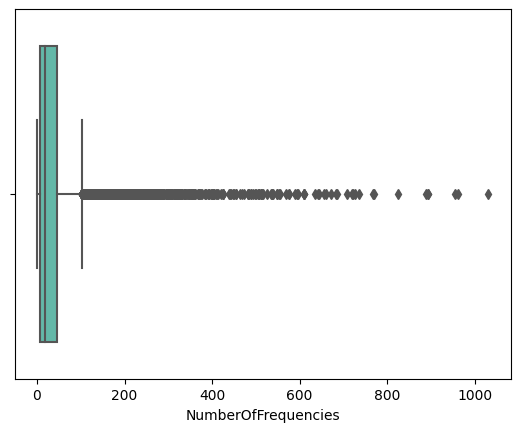

In [37]:
sns.boxplot(x = 'NumberOfFrequencies', data = df, color = '#55c6b1')

<Axes: xlabel='AttendedClasses'>

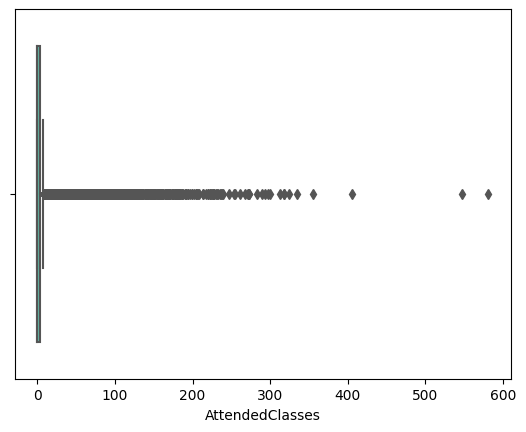

In [38]:
sns.boxplot(x = 'AttendedClasses', data = df, color = '#55c6b1')

More outliers have appeared.

In [39]:
len(df[df['AttendedClasses']>450])

2

Let's check if these outliers are the same ones has the ones previously spotted.

In [40]:
df[df['AttendedClasses']>450]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10262   19  Female  1160.0      2015-09-09       2019-09-10      2019-07-01   
22730   15    Male     0.0      2015-09-17       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10262       2019-12-31    2019-07-31                    41        1526.82   
22730       2019-12-31    2019-07-16                    56        1816.45   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10262          0                  0.0              1.0                0.0   
22730          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10262              0.0             0.0               0.0               0.0   
22730              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10262               0.0                0.0              0.0   
22730               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10262                590.0              581                       3.0   
22730                593.0              547                       6.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10262                       26.58                   4                 4   
22730                       53.16                   3                 4   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
10262            1.0                   1        1  
22730            0.0                   0        1

In [41]:
df[df['LifetimeValue']>4000]

Age Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                           
21273   63   Male  5450.0      2016-11-15       2016-11-15      2019-07-01   
24139   62   Male  5300.0      2016-04-04       2016-04-04      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
21273       2019-12-31    2019-10-30                     1         6727.8   
24139       2019-12-31    2019-10-24                     7         6232.2   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
21273          0                  0.0              0.0                1.0   
24139          0                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
21273              0.0             0.0               0.0               0.0   
24139              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
21273               0.0                0.0              0.0   
24139               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
21273                100.0                0                       7.0   
24139                 83.0                0                       7.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
21273                       60.97                  16                 3   
24139                       60.97                  12                 4   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
21273            0.0                   0        0  
24139            0.0                   0        0

<Axes: xlabel='AllowedWeeklyVisitsBySLA'>

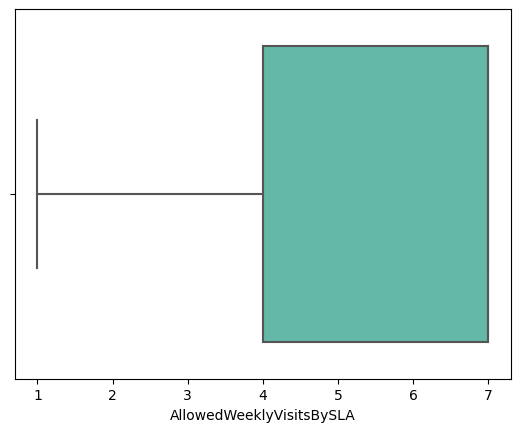

In [42]:
sns.boxplot(x = 'AllowedWeeklyVisitsBySLA', data = df, color = '#55c6b1')

<Axes: xlabel='AllowedNumberOfVisitsBySLA'>

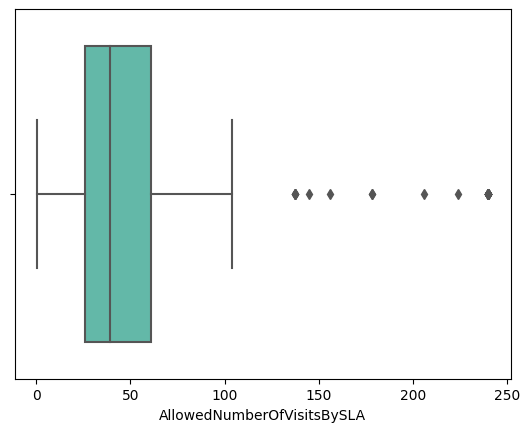

In [43]:
sns.boxplot(x = 'AllowedNumberOfVisitsBySLA', data = df, color = '#55c6b1')

<Axes: xlabel='RealNumberOfVisits'>

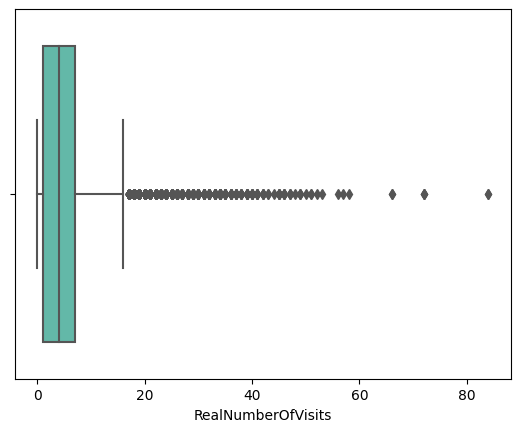

In [44]:
sns.boxplot(x = 'RealNumberOfVisits', data = df, color = '#55c6b1')

And yet again we've come accross some more extreme values.

In [45]:
len(df[df['RealNumberOfVisits']>80])

2

<Axes: xlabel='NumberOfRenewals'>

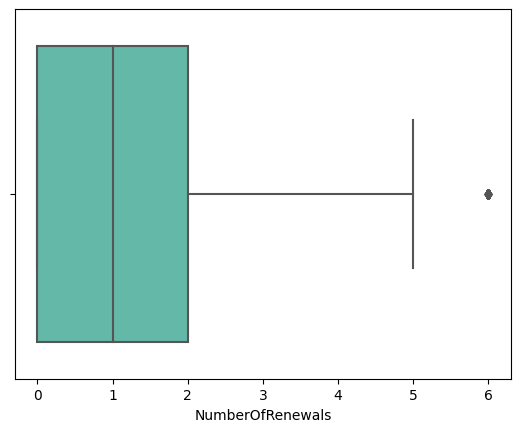

In [46]:
sns.boxplot(x = 'NumberOfRenewals', data = df, color = '#55c6b1')

<Axes: xlabel='NumberOfReferences'>

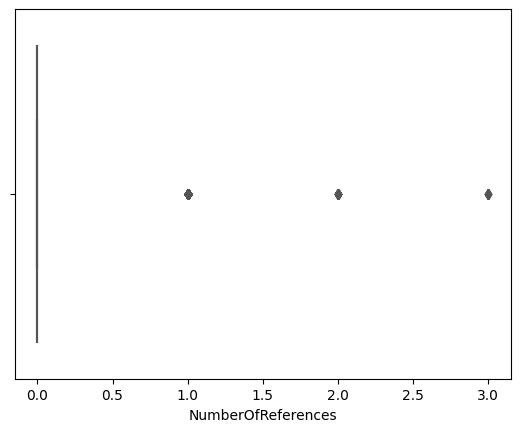

In [47]:
sns.boxplot(x = 'NumberOfReferences', data = df, color = '#55c6b1')

<Axes: xlabel='NumberOfReferences', ylabel='Count'>

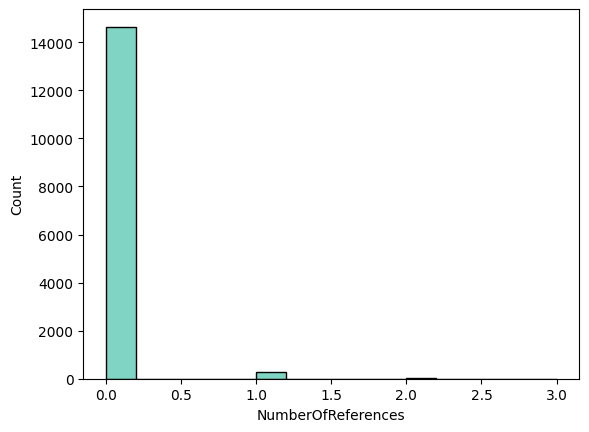

In [48]:
sns.histplot(df['NumberOfReferences'], color = '#55c6b1')

# <font color='#2DA9B4'>**Data Preprocessing**</font> <a class="anchor" id="preproc"></a>
[Back to Contents](#toc)

Let's begin by creating a copy of our data to ensure that the original values remain untouched.

In [49]:
df_copy = df.copy()

## <font color='#2DA9B4'>**Missing Values**</font> <a class="anchor" id="missing"></a>
[Back to Contents](#toc)

In [50]:
df_copy.isna().sum()/len(df)*100

Age                           0.000000
Gender                        0.000000
Income                        3.313031
EnrollmentStart               0.000000
EnrollmentFinish              0.000000
LastPeriodStart               0.000000
LastPeriodFinish              0.000000
DateLastVisit                 0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
UseByTime                     0.000000
AthleticsActivities           0.240948
WaterActivities               0.247641
FitnessActivities             0.234255
DanceActivities               0.240948
TeamActivities                0.234255
RacketActivities              0.247641
CombatActivities              0.220869
NatureActivities              0.314571
SpecialActivities             0.294492
OtherActivities               0.234255
NumberOfFrequencies           0.174018
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      3.580751
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits       

All numerical variables will have their missing values imputed with the median, as it is one, if not the most robust measure of extreme values, while our categorical variables will have their missings assigned to the mode of the respective feature.

As we have some binary variables on our dataset, such as all the activity variables, their outliers, and missing values should not be evaluated like the others, considering that the possible values are simply 0 and 1. As such, these features will be treated as categorical variables.

For that, we will split our dataset into numerical and categorical variables.

In [51]:
numerical_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']
categorical_features = df_copy.columns.drop(numerical_features).to_list()

Let's also take a look at the missing values heat map.

locator: <matplotlib.ticker.AutoLocator object at 0x0000021E037DF650>


Text(0.5, 1.0, 'Heatmap of Missing Values (Train Dataset)')

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', var

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRL.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHIC.TTF', name='Century Gothic', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DROGM.TTF', name='Guttman Drogolin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 6.888636363636364
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GYADBR.TTF', name='Guttman Yad-Brush', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAH.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNAB.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GAHROM.TTF', name='Guttman Aharoni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCMI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAMDCN.TTF', name='Franklin Gothic Medium Cond', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiaz.ttf', name='Georgia', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MATURASC.TTF', name='Matura MT Script Capitals', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegoeIcons.ttf', name='Segoe Fluent Icons', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', s

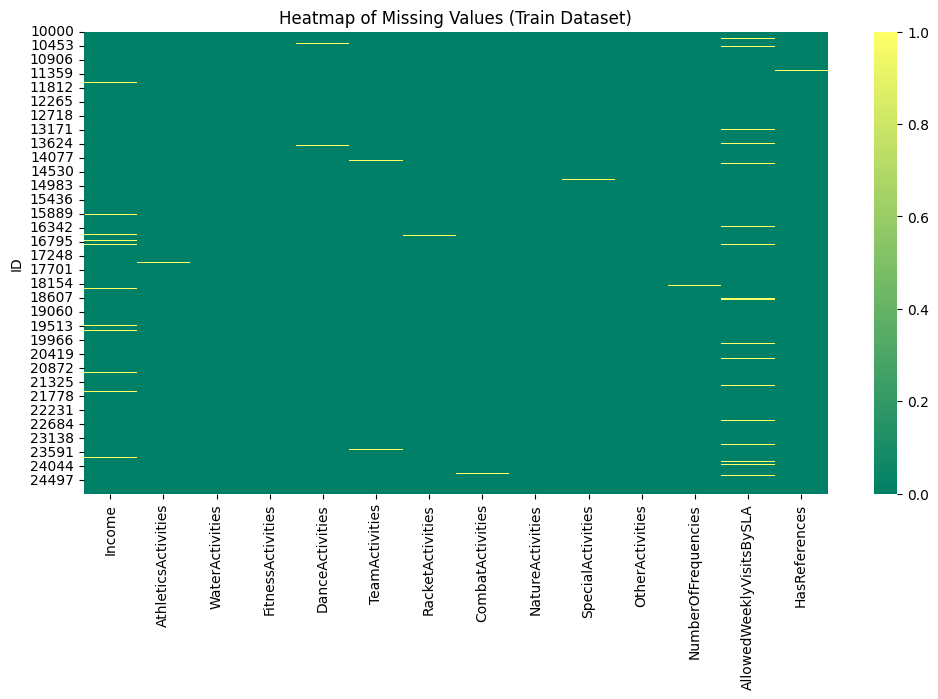

In [52]:
plt.figure(figsize = (12,6))
sns.heatmap(df_copy[['Income', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AllowedWeeklyVisitsBySLA',
       'HasReferences']].isna(), cmap = "summer")
plt.title("Heatmap of Missing Values (Train Dataset)")

In [53]:
df_copy[numerical_features] = df_copy[numerical_features].apply(lambda x: x.fillna(x.median()), axis = 0)

In [54]:
df_copy[categorical_features] = df_copy[categorical_features].apply(lambda x: x.fillna(x.mode()[0]), axis = 0)

Let's now confirm that we do not have any missing values in our dataset.

In [55]:
df_copy.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

## <font color='#2DA9B4'>**Outliers**</font> <a class="anchor" id="outliers"></a>
[Back to Contents](#toc)

Different outlier removal methods will be tested, so that we can select the one that keeps the higher percentage of data.

### <font color='#2DA9B4'>**Manual**</font> <a class="anchor" id="manual"></a>
[Back to Contents](#toc)

In [56]:
filter = (
    (df['Age']>=3)
    &
    (df['LifetimeValue']<=4000)
    &
    (df['AttendedClasses']<=450)
    &
    (df['RealNumberOfVisits']<=80)
)

df_no_outliers_manual = df[filter]

print('Percentage of data kept after removing outliers:', np.round(df_no_outliers_manual.shape[0] / df_copy.shape[0], 4)*100)

Percentage of data kept after removing outliers: 97.39


### <font color='#2DA9B4'>**DBSCAN**</font> <a class="anchor" id="dbscan"></a>
[Back to Contents](#toc)

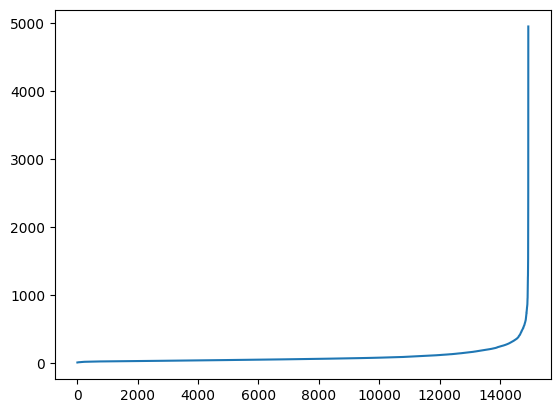

In [57]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_copy[numerical_features])
distances, _ = neigh.kneighbors(df_copy[numerical_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [58]:
dbscan = DBSCAN(eps=500, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_copy[numerical_features])
Counter(dbscan_labels)

Counter({0: 14878, -1: 63})

In [59]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_outliers = df_copy[dbscan_labels==-1].copy()

# New df without outlier
df_no_outliers = df_copy[dbscan_labels!=-1].copy()

print('Percentage of data kept after removing outliers:', np.round(df_no_outliers.shape[0] / df_copy.shape[0], 4)*100)

Percentage of data kept after removing outliers: 99.58


### <font color='#2DA9B4'>**IQ (25th and 75th Percentiles)**</font> <a class="anchor" id="iq"></a>
[Back to Contents](#toc)

In [60]:
q25 = df_copy[numerical_features].quantile(.25)
q75 = df_copy[numerical_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in numerical_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_copy[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0), index = df_copy.index)
df_no_outliers_2 = df_copy[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_no_outliers_2.shape[0] / df_copy.shape[0], 4)*100)

Percentage of data kept after removing outliers: 55.269999999999996


DBSCAN was then one that kept more data after removing outliers, so we selected this as our final outlier removal method.

In [61]:
# So, we will proceed with the first option.

df_copy = df_no_outliers.copy()

## <font color='#2DA9B4'>**Feature Engineering**</font> <a class="anchor" id="feateng"></a>
[Back to Contents](#toc)

Let's begin by transforming *EnrollmentStart*, *EnrollmentFinish*, *LastPeriodStart*, *LastPeriodFinish*, and *DateLastVisit* into datetime variables.

In [62]:
df_copy[['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']] = df_copy[['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']].apply(pd.to_datetime)

Now, we can create new numerical variables that will substitute these ones.

In [63]:
Last_Date = pd.Timestamp(dt.date(2019,10,31))

df_copy['DaysSinceFirstEnrollment'] = (Last_Date - df_copy['EnrollmentStart']).dt.days

df_copy = df_copy.drop('EnrollmentStart', axis = 1)

In [64]:
df_copy['DaysSinceLastEnrollment'] = (Last_Date - df_copy['EnrollmentFinish']).dt.days

df_copy = df_copy.drop('EnrollmentFinish', axis = 1)

In [65]:
df_copy['DaysSinceLastVisit'] = (Last_Date - df_copy['DateLastVisit']).dt.days

df_copy = df_copy.drop('DateLastVisit', axis = 1)

Let's check for some possible inconsistency.

In [66]:
df_copy[df_copy['DaysSinceFirstEnrollment'] < df_copy['DaysSinceLastEnrollment']]

Empty DataFrame
Columns: [Age, Gender, Income, LastPeriodStart, LastPeriodFinish, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout, DaysSinceFirstEnrollment, DaysSinceLastEnrollment, DaysSinceLastVisit]
Index: []

In [67]:
df_copy[df_copy['DaysSinceFirstEnrollment'] == df_copy['DaysSinceLastEnrollment']]

Age  Gender  Income LastPeriodStart LastPeriodFinish  \
ID                                                            
10025   13  Female     0.0      2019-07-01       2019-12-31   
10036   13  Female     0.0      2019-07-01       2019-12-31   
10038   38  Female  1910.0      2019-07-01       2019-12-31   
10049   56    Male  6540.0      2019-07-01       2019-12-31   
10051   12  Female     0.0      2019-07-01       2019-12-31   
...    ...     ...     ...             ...              ...   
24918   73    Male  3870.0      2019-07-01       2019-12-31   
24919    1  Female     0.0      2019-07-01       2019-12-31   
24926   24  Female  3290.0      2019-01-01       2019-12-31   
24937   14    Male     0.0      2019-07-01       2019-12-31   
24940   55    Male  4800.0      2019-07-01       2019-12-31   

       DaysWithoutFrequency  LifetimeValue  UseByTime  AthleticsActivities  \
ID                                                                           
10025                     5         596.30          0                  0.0   
10036                     9        2209.97          0                  0.0   
10038                     1         554.60          0                  0.0   
10049                     2         540.10          0                  0.0   
10051                     3         852.30          0                  0.0   
...                     ...            ...        ...                  ...   
24918                     0        1583.90          0                  0.0   
24919                     0         201.20          0                  0.0   
24926                     2         196.10          0                  0.0   
24937                     2        1460.45          0                  0.0   
24940                     3         788.60          0                  0.0   

       WaterActivities  FitnessActivities  DanceActivities  TeamActivities  \
ID                                                                           
10025              1.0                0.0              0.0             0.0   
10036              1.0                0.0              0.0             1.0   
10038              1.0                0.0              0.0             0.0   
10049              1.0                0.0              0.0             0.0   
10051              1.0                0.0              0.0             1.0   
...                ...                ...              ...             ...   
24918              1.0                1.0              0.0             0.0   
24919              1.0                0.0              0.0             0.0   
24926              1.0                0.0              0.0             0.0   
24937              1.0                0.0              0.0             0.0   
24940              1.0                0.0              0.0             0.0   

       RacketActivities  CombatActivities  NatureActivities  \
ID                                                            
10025               0.0               0.0               0.0   
10036               0.0               1.0               0.0   
10038               0.0               0.0               0.0   
10049               0.0               0.0               0.0   
10051               0.0               0.0               0.0   
...                 ...               ...               ...   
24918               0.0               0.0               0.0   
24919               0.0               0.0               0.0   
24926               0.0               0.0               0.0   
24937               0.0               0.0               0.0   
24940               0.0               0.0               0.0   

       SpecialActivities  OtherActivities  NumberOfFrequencies  \
ID                                                               
10025                0.0              0.0                 27.0   
10036                0.0              0.0                199.0   
10038                0.0              0.0                127.0   
10049  

It seems that several people had only a 1 day enrollment with the fitness company, perhaps to try an activity and see if they liked it, giving up later.

Let's also create a new variable to represent the total number of activities each customer has ever enrolled in and check for possible inconsistencies.

In [68]:
df_copy['DifferentActivities'] = df_copy['AthleticsActivities'] + df_copy['WaterActivities'] + df_copy['FitnessActivities'] + df_copy['TeamActivities'] + df_copy['RacketActivities'] + df_copy['CombatActivities'] + df_copy['SpecialActivities'] + df_copy['OtherActivities']

In [69]:
df_copy[df_copy['DifferentActivities'] == 0]

Age  Gender  Income LastPeriodStart LastPeriodFinish  \
ID                                                            
10333   42    Male  4720.0      2019-07-01       2019-12-31   
10415   53  Female  3290.0      2018-07-01       2019-06-30   
11046   14    Male  1990.0      2018-01-01       2018-12-31   
12964   15  Female     0.0      2019-07-01       2019-12-31   
13735   21  Female  1200.0      2016-01-01       2016-06-30   
15368    8    Male     0.0      2019-01-01       2019-06-30   
15976    5  Female     0.0      2018-01-01       2018-12-31   
17689    8    Male     0.0      2016-01-01       2016-12-31   
17709   29    Male  2550.0      2017-01-01       2017-12-31   
18537   33  Female  1890.0      2018-01-01       2018-06-30   
19399   17    Male  1080.0      2016-01-01       2016-06-30   
20370   29  Female  2830.0      2016-07-01       2017-06-30   
20529    7    Male     0.0      2015-07-01       2015-12-31   
21444   52    Male  4370.0      2019-07-01       2019-12-31   
21929    1    Male     0.0      2019-07-01       2019-12-31   
22395    4  Female     0.0      2019-07-01       2019-12-31   
23416   14    Male     0.0      2016-07-01       2016-12-31   
23518   16  Female     0.0      2019-07-01       2019-12-31   
24510   20    Male  1360.0      2016-01-01       2016-12-31   
24824    5  Female     0.0      2017-07-01       2018-06-30   

       DaysWithoutFrequency  LifetimeValue  UseByTime  AthleticsActivities  \
ID                                                                           
10333                     1         885.80          0                  0.0   
10415                    31         264.50          0                  0.0   
11046                    64        1420.90          0                  0.0   
12964                   219         861.20          0                  0.0   
13735                     5          95.60          0                  0.0   
15368                    26        1061.25          0                  0.0   
15976                    45         309.35          0                  0.0   
17689                     9         392.52          0                  0.0   
17709                    42         324.50          0                  0.0   
18537                    93         283.60          0                  0.0   
19399                    52         262.60          0                  0.0   
20370                    41          95.60          0                  0.0   
20529                    53          77.10          0                  0.0   
21444                     7         839.10          0                  0.0   
21929                   110         264.20          0                  0.0   
22395                     5          69.20          0                  0.0   
23416                   157         323.60          0                  0.0   
23518                    74         607.40          0                  0.0   
24510                    26         350.10          0                  0.0   
24824                    50         143.60          0                  0.0   

       WaterActivities  FitnessActivities  DanceActivities  TeamActivities  \
ID                                                                           
10333              0.0                0.0              0.0             0.0   
10415              0.0                0.0              0.0             0.0   
11046              0.0                0.0              0.0             0.0   
12964              0.0                0.0              0.0             0.0   
13735              0.0                0.0              0.0             0.0   
15368              0.0                0.0              0.0             0.0   
15976              0.0                0.0              0.0             0.0   
17689              0.0                0.0              0.0             0.0   
17709              0.0                0.0              0.0             0.0   
18537              0.0                0.0    

20 people are enrolled but never practiced/ enrolled in any activity with XYZ Sports Company.

Before advancing to Feature Selection, we are only left to transform Gender into a numerical variable.

In [70]:
gender_mapping = {'Male': 0, 'Female': 1}
df_copy['Gender'] = df_copy['Gender'].map(gender_mapping)

Now, all the variables are numerical.

In [71]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14878 entries, 10000 to 24941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         14878 non-null  int64         
 1   Gender                      14878 non-null  int64         
 2   Income                      14878 non-null  float64       
 3   LastPeriodStart             14878 non-null  datetime64[ns]
 4   LastPeriodFinish            14878 non-null  datetime64[ns]
 5   DaysWithoutFrequency        14878 non-null  int64         
 6   LifetimeValue               14878 non-null  float64       
 7   UseByTime                   14878 non-null  int64         
 8   AthleticsActivities         14878 non-null  float64       
 9   WaterActivities             14878 non-null  float64       
 10  FitnessActivities           14878 non-null  float64       
 11  DanceActivities             14878 non-null  float64    

## <font color='#2DA9B4'>**Inconsistencies**</font> <a class="anchor" id="incon"></a>
[Back to Contents](#toc)

As previously spotted, we have customers with 0 years old and some with quite a young age.

We will only consider in our analysis customers that are more than 3 years old.

In [72]:
df_copy = df_copy[df_copy['Age']>=3]

We also noticed that customers with less than 15 years had an income on our dataset, which, according to the European Union rules, should not be allowed.

As such, all customers with less than 15 years old should have an *Income* equal to 0.

In [73]:
df_copy.loc[df_copy['Age'] <= 14, 'Income'] = 0

Lastly, we will remove from our analysis all the customers that were never enrolled in any activity.

In [74]:
df_copy = df_copy[df_copy['DifferentActivities'] != 0]

Let's check if now we are inconsistencies free:

In [75]:
df_copy['Age'].min()

3

In [76]:
df_copy[df_copy['Age']<=14]['Income'].value_counts()

Income
0.0    1762
Name: count, dtype: int64

In [77]:
df_copy[df_copy['DifferentActivities'] == 0]

Empty DataFrame
Columns: [Age, Gender, Income, LastPeriodStart, LastPeriodFinish, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout, DaysSinceFirstEnrollment, DaysSinceLastEnrollment, DaysSinceLastVisit, DifferentActivities]
Index: []

[0 rows x 31 columns]

## <font color='#2DA9B4'>**Feature Selection**</font> <a class="anchor" id="featselect"></a>
[Back to Contents](#toc)

Let's drop those 2 variables that were only composed by 0s.

In [78]:
df_copy.drop(['DanceActivities', 'NatureActivities'], axis = 1, inplace=True)
df_copy

Age  Gender  Income LastPeriodStart LastPeriodFinish  \
ID                                                            
10000   60       1  5500.0      2019-07-01       2019-12-31   
10001   29       1  2630.0      2015-01-01       2015-12-31   
10002   23       0  1980.0      2017-01-01       2017-06-30   
10003    9       0     0.0      2018-07-01       2019-06-30   
10004   35       0  4320.0      2018-01-01       2018-06-30   
...    ...     ...     ...             ...              ...   
24937   14       0     0.0      2019-07-01       2019-12-31   
24938   39       0  1990.0      2016-01-01       2016-06-30   
24939   20       0  1810.0      2017-01-01       2017-06-30   
24940   55       0  4800.0      2019-07-01       2019-12-31   
24941   32       1  3700.0      2019-01-01       2019-06-30   

       DaysWithoutFrequency  LifetimeValue  UseByTime  AthleticsActivities  \
ID                                                                           
10000                     1          89.35          0                  0.0   
10001                    60         479.20          0                  0.0   
10002                     7          37.60          0                  0.0   
10003                    22         155.40          0                  0.0   
10004                   210         373.20          0                  0.0   
...                     ...            ...        ...                  ...   
24937                     2        1460.45          0                  0.0   
24938                    38         343.85          0                  0.0   
24939                     2          43.60          0                  0.0   
24940                     3         788.60          0                  0.0   
24941                    14         919.60          0                  0.0   

       WaterActivities  FitnessActivities  TeamActivities  RacketActivities  \
ID                                                                            
10000              0.0                1.0             0.0               0.0   
10001              0.0                0.0             0.0               0.0   
10002              0.0                1.0             0.0               0.0   
10003              0.0                0.0             1.0               0.0   
10004              0.0                1.0             0.0               0.0   
...                ...                ...             ...               ...   
24937              1.0                0.0             0.0               0.0   
24938              0.0                0.0             0.0               0.0   
24939              0.0                1.0             0.0               0.0   
24940              1.0                0.0             0.0               0.0   
24941              0.0                1.0             0.0               0.0   

       CombatActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10001               0.0                1.0              0.0   
10002               0.0                0.0              0.0   
10003               0.0                0.0              0.0   
10004               0.0                0.0              0.0   
...                 ...                ...              ...   
24937               0.0                0.0              0.0   
24938               1.0                0.0              0.0   
24939               0.0                0.0              0.0   
24940               0.0                0.0              0.0   
24941               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000                  9.0                7                       7.0   
10001                 23.0                1                       2.0   
10002                  6.0      

As we cannot take much more valuable information from *LastPeriodStart* and *LastPeriodFinish*, we decided to remove them from our analysis.

In [79]:
df_copy.drop(['LastPeriodStart', 'LastPeriodFinish'], axis = 1, inplace=True)
df_copy

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                           
10000   60       1  5500.0                     1          89.35          0   
10001   29       1  2630.0                    60         479.20          0   
10002   23       0  1980.0                     7          37.60          0   
10003    9       0     0.0                    22         155.40          0   
10004   35       0  4320.0                   210         373.20          0   
...    ...     ...     ...                   ...            ...        ...   
24937   14       0     0.0                     2        1460.45          0   
24938   39       0  1990.0                    38         343.85          0   
24939   20       0  1810.0                     2          43.60          0   
24940   55       0  4800.0                     3         788.60          0   
24941   32       1  3700.0                    14         919.60          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   
...                    ...              ...                ...   
24937                  0.0              1.0                0.0   
24938                  0.0              0.0                0.0   
24939                  0.0              0.0                1.0   
24940                  0.0              1.0                0.0   
24941                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
ID                                                                             
10000             0.0               0.0               0.0                0.0   
10001             0.0               0.0               0.0                1.0   
10002             0.0               0.0               0.0                0.0   
10003             1.0               0.0               0.0                0.0   
10004             0.0               0.0               0.0                0.0   
...               ...               ...               ...                ...   
24937             0.0               0.0               0.0                0.0   
24938             0.0               0.0               1.0                0.0   
24939             0.0               0.0               0.0                0.0   
24940             0.0               0.0               0.0                0.0   
24941             0.0               0.0               0.0                0.0   

       OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID                                                             
10000              0.0                  9.0                7   
10001              0.0                 23.0                1   
10002              0.0                  6.0                0   
10003              0.0                 20.0                2   
10004              0.0                 41.0                0   
...                ...                  ...              ...   
24937              0.0                112.0               96   
24938              0.0                 57.0                0   
24939              0.0                  6.0                0   
24940              0.0                185.0              155   
24941              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       7.0                        6.28   
10001                       2.0                       17.42   
10002  

Before anything, let's create a new dataset that is clean in terms of missing values, outliers, and no categorical variables or inconsistencies, but still contains all the variables, except for the univariate variables, *LastPeriodStart* and *LastPeriodFinish*.

This will be useful later on.

In [80]:
df2 = df_copy.copy()

In [81]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14475 entries, 10000 to 24941
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14475 non-null  int64  
 1   Gender                      14475 non-null  int64  
 2   Income                      14475 non-null  float64
 3   DaysWithoutFrequency        14475 non-null  int64  
 4   LifetimeValue               14475 non-null  float64
 5   UseByTime                   14475 non-null  int64  
 6   AthleticsActivities         14475 non-null  float64
 7   WaterActivities             14475 non-null  float64
 8   FitnessActivities           14475 non-null  float64
 9   TeamActivities              14475 non-null  float64
 10  RacketActivities            14475 non-null  float64
 11  CombatActivities            14475 non-null  float64
 12  SpecialActivities           14475 non-null  float64
 13  OtherActivities             1447

From the early report, we already know that our data contains some high correlations. Let's take a look at them in more detail.

In [82]:
df_copy_num = df_copy.drop(['Gender', 'Dropout', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences'], axis = 1)

df_copy_bin = df_copy.drop(df_copy_num, axis = 1)

In [83]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap ='YlGnBu', fmt='.1')
    plt.show()

locator: <matplotlib.ticker.AutoLocator object at 0x0000021E04C4CB50>


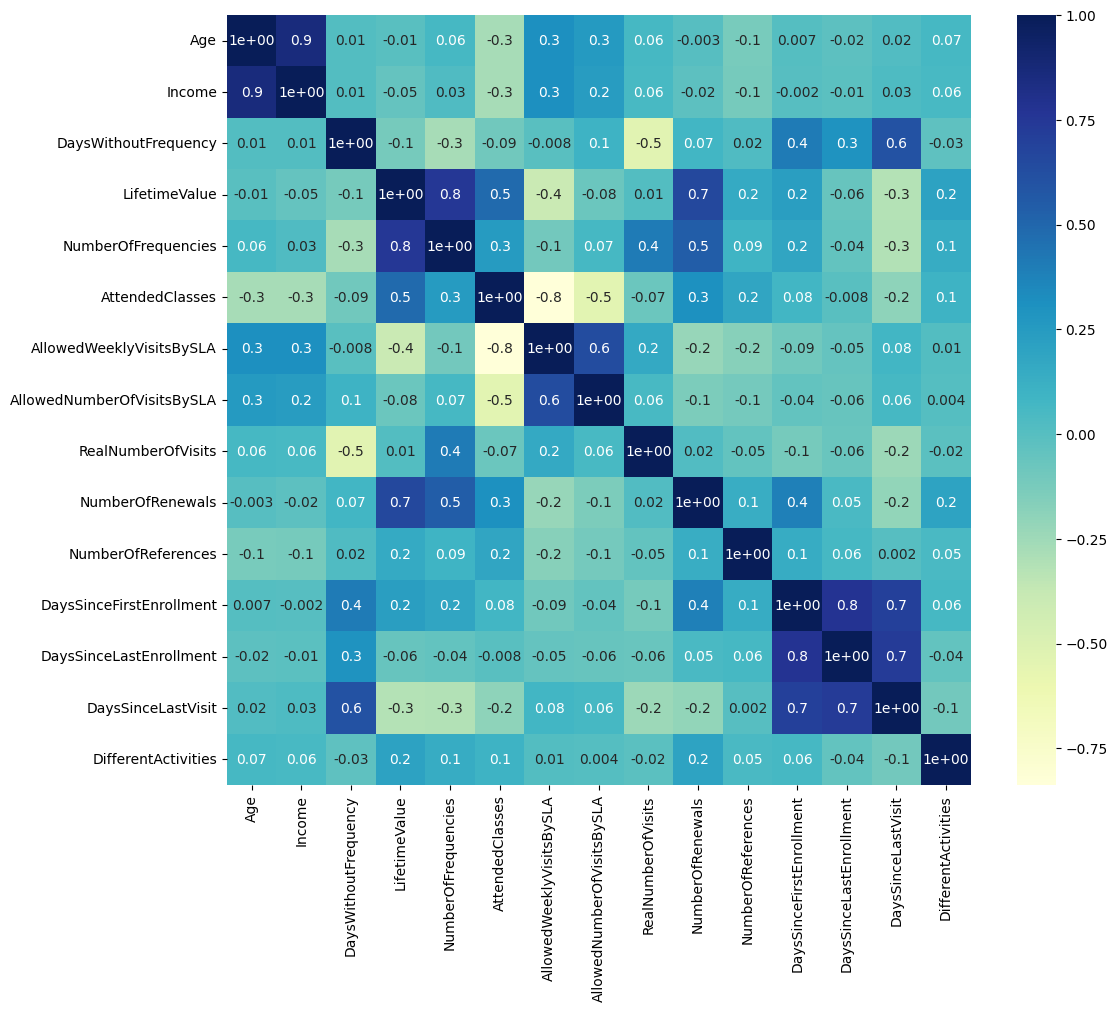

In [84]:
spearman_correlation = df_copy_num.corr('spearman')
cor_heatmap(spearman_correlation)

Correlations bigger or equal to abs(0.7):

In [85]:
# Find pairs of variables with a correlation greater than 0.70
high_correlation_pairs = []
for i in range(len(spearman_correlation.columns)):
    for j in range(i + 1, len(spearman_correlation.columns)):
        if abs(spearman_correlation.iloc[i, j]) >= 0.70:
            high_correlation_pairs.append((spearman_correlation.columns[i], spearman_correlation.columns[j]))
# Display the pairs of variables with high correlation
for pair in high_correlation_pairs:
    correlation_value = spearman_correlation.loc[pair[0], pair[1]]
    print(f"High Correlation: {pair[0]} and {pair[1]} - Correlation: {correlation_value}")

High Correlation: Age and Income - Correlation: 0.8566127850205443
High Correlation: LifetimeValue and NumberOfFrequencies - Correlation: 0.7501815557446178
High Correlation: AttendedClasses and AllowedWeeklyVisitsBySLA - Correlation: -0.8377368594918336
High Correlation: DaysSinceFirstEnrollment and DaysSinceLastEnrollment - Correlation: 0.77449619062046
High Correlation: DaysSinceLastEnrollment and DaysSinceLastVisit - Correlation: 0.7279203598022445


In [86]:
abs(spearman_correlation['Age']) > abs(spearman_correlation['Income'])

Age                            True
Income                        False
DaysWithoutFrequency           True
LifetimeValue                 False
NumberOfFrequencies            True
AttendedClasses               False
AllowedWeeklyVisitsBySLA       True
AllowedNumberOfVisitsBySLA     True
RealNumberOfVisits             True
NumberOfRenewals              False
NumberOfReferences             True
DaysSinceFirstEnrollment       True
DaysSinceLastEnrollment        True
DaysSinceLastVisit            False
DifferentActivities            True
dtype: bool

In [87]:
abs(spearman_correlation['NumberOfFrequencies']) > abs(spearman_correlation['LifetimeValue'])

Age                            True
Income                        False
DaysWithoutFrequency           True
LifetimeValue                 False
NumberOfFrequencies            True
AttendedClasses               False
AllowedWeeklyVisitsBySLA      False
AllowedNumberOfVisitsBySLA    False
RealNumberOfVisits             True
NumberOfRenewals              False
NumberOfReferences            False
DaysSinceFirstEnrollment      False
DaysSinceLastEnrollment       False
DaysSinceLastVisit            False
DifferentActivities           False
dtype: bool

In [88]:
abs(spearman_correlation['AllowedWeeklyVisitsBySLA']) > abs(spearman_correlation['AttendedClasses'])

Age                            True
Income                         True
DaysWithoutFrequency          False
LifetimeValue                 False
NumberOfFrequencies           False
AttendedClasses               False
AllowedWeeklyVisitsBySLA       True
AllowedNumberOfVisitsBySLA     True
RealNumberOfVisits             True
NumberOfRenewals              False
NumberOfReferences            False
DaysSinceFirstEnrollment       True
DaysSinceLastEnrollment        True
DaysSinceLastVisit            False
DifferentActivities           False
dtype: bool

In [89]:
abs(spearman_correlation['DaysSinceLastEnrollment']) > abs(spearman_correlation['DaysSinceFirstEnrollment'])

Age                            True
Income                         True
DaysWithoutFrequency          False
LifetimeValue                 False
NumberOfFrequencies           False
AttendedClasses               False
AllowedWeeklyVisitsBySLA      False
AllowedNumberOfVisitsBySLA     True
RealNumberOfVisits            False
NumberOfRenewals              False
NumberOfReferences            False
DaysSinceFirstEnrollment      False
DaysSinceLastEnrollment        True
DaysSinceLastVisit             True
DifferentActivities           False
dtype: bool

In [90]:
abs(spearman_correlation['DaysSinceLastEnrollment']) > abs(spearman_correlation['DaysSinceLastVisit'])

Age                           False
Income                        False
DaysWithoutFrequency          False
LifetimeValue                 False
NumberOfFrequencies           False
AttendedClasses               False
AllowedWeeklyVisitsBySLA      False
AllowedNumberOfVisitsBySLA    False
RealNumberOfVisits            False
NumberOfRenewals              False
NumberOfReferences             True
DaysSinceFirstEnrollment       True
DaysSinceLastEnrollment        True
DaysSinceLastVisit            False
DifferentActivities           False
dtype: bool

And let's drop the variables from the highly correlated pairs that were more correlated with the remaining metric variables.

In [91]:
df_copy = df_copy.drop(['Age', 'LifetimeValue', 'AttendedClasses', 'DaysSinceFirstEnrollment', 'DaysSinceLastVisit'], axis = 1)

In [92]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14475 entries, 10000 to 24941
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      14475 non-null  int64  
 1   Income                      14475 non-null  float64
 2   DaysWithoutFrequency        14475 non-null  int64  
 3   UseByTime                   14475 non-null  int64  
 4   AthleticsActivities         14475 non-null  float64
 5   WaterActivities             14475 non-null  float64
 6   FitnessActivities           14475 non-null  float64
 7   TeamActivities              14475 non-null  float64
 8   RacketActivities            14475 non-null  float64
 9   CombatActivities            14475 non-null  float64
 10  SpecialActivities           14475 non-null  float64
 11  OtherActivities             14475 non-null  float64
 12  NumberOfFrequencies         14475 non-null  float64
 13  AllowedWeeklyVisitsBySLA    1447

In [93]:
df_copy.columns

Index(['Gender', 'Income', 'DaysWithoutFrequency', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout', 'DaysSinceLastEnrollment',
       'DifferentActivities'],
      dtype='object')

Cramér's V measure will also be used to evaluate the pairs of binary variables.

In [94]:
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with binary columns

# Replace 'binary_var1', 'binary_var2', ..., with your actual column names

binary_columns = df_copy_bin.columns

# Function to calculate Cramér's V

def cramers_v(confusion_matrix):

    chi2 = chi2_contingency(confusion_matrix)[0]

    n = confusion_matrix.sum()

    phi2 = chi2 / n

    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))

    rcorr = r - ((r - 1) ** 2) / (n - 1)

    kcorr = k - ((k - 1) ** 2) / (n - 1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each pair of binary variables

cramers_vs = {}

for i, var1 in enumerate(binary_columns):

    for j, var2 in enumerate(binary_columns):

        if i < j:  # Avoid duplicate pairs

            contingency_table = pd.crosstab(df_copy_bin[var1], df_copy_bin[var2])

            cramers_vs[(var1, var2)] = cramers_v(contingency_table.values)

for pair, v in cramers_vs.items():

    print(f"Cramér's V for {pair}: {v}")

Cramér's V for ('Gender', 'UseByTime'): 0.03885814347640574
Cramér's V for ('Gender', 'AthleticsActivities'): 0.019856110616470916
Cramér's V for ('Gender', 'WaterActivities'): 0.0
Cramér's V for ('Gender', 'FitnessActivities'): 0.1039666873805298
Cramér's V for ('Gender', 'TeamActivities'): 0.09586782094958379
Cramér's V for ('Gender', 'RacketActivities'): 0.019256287777686527
Cramér's V for ('Gender', 'CombatActivities'): 0.1174117793865384
Cramér's V for ('Gender', 'SpecialActivities'): 0.028036310432604298
Cramér's V for ('Gender', 'OtherActivities'): 0.03343388293652145
Cramér's V for ('Gender', 'HasReferences'): 0.0
Cramér's V for ('Gender', 'Dropout'): 0.033427160316015
Cramér's V for ('UseByTime', 'AthleticsActivities'): 0.009017862623584628
Cramér's V for ('UseByTime', 'WaterActivities'): 0.0
Cramér's V for ('UseByTime', 'FitnessActivities'): 0.0580024109832419
Cramér's V for ('UseByTime', 'TeamActivities'): 0.03131907082872317
Cramér's V for ('UseByTime', 'RacketActivities'):

As no pair presents significantly high Cramér's V values, no binary variable needs to be removed.

## <font color='#2DA9B4'>**Data Scaling**</font> <a class="anchor" id="scale"></a>
[Back to Contents](#toc)

Finally, let's scale our data, while also keeping the unscaled version saved to later be used.

In [95]:
df_copy_unscaled = df_copy.copy()

In [96]:
scale = MinMaxScaler().fit(df_copy)
minmax_data = scale.transform(df_copy)
df_copy_scaled = pd.DataFrame(minmax_data, columns = df_copy.columns, index=df_copy.index)

In [97]:
df_copy = df_copy_scaled.copy()

## <font color='#2DA9B4'>**New Data Exploration**</font> <a class="anchor" id="newexplore"></a>
[Back to Contents](#toc)

After all the preprocessing, a new data exploration can be made to see if there is still anything that stands out to be solved in our data.

In [98]:
#newprofile = ProfileReport(df_copy, title="Profiling Report")
#newprofile

The report shows that we still have correlated variables, so let's evaluate again the Spearman's Rank Correlations, considering the same value for highly correlated variables as before.

In [99]:
new_df_copy_num = df_copy.drop(['Gender', 'Dropout', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences'], axis = 1)

new_df_copy_bin = df_copy.drop(new_df_copy_num, axis = 1)

locator: <matplotlib.ticker.AutoLocator object at 0x0000021E0518B3D0>


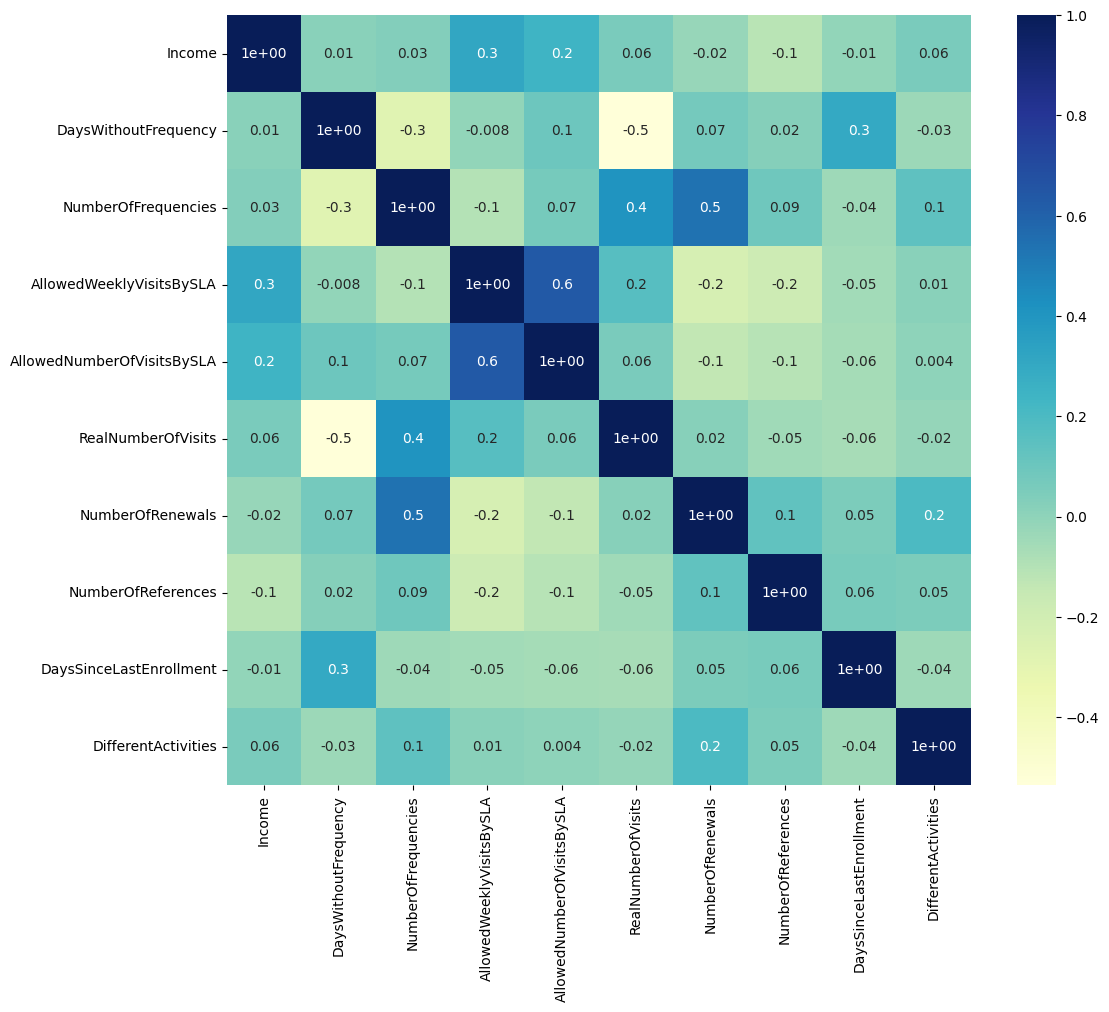

In [100]:
spearman_correlation = new_df_copy_num.corr('spearman')
cor_heatmap(spearman_correlation)

In [101]:
# Find pairs of variables with a correlation greater than 0.70
high_correlation_pairs = []
for i in range(len(spearman_correlation.columns)):
    for j in range(i + 1, len(spearman_correlation.columns)):
        if abs(spearman_correlation.iloc[i, j]) >= 0.70:
            high_correlation_pairs.append((spearman_correlation.columns[i], spearman_correlation.columns[j]))
# Display the pairs of variables with high correlation
for pair in high_correlation_pairs:
    correlation_value = spearman_correlation.loc[pair[0], pair[1]]
    print(f"High Correlation: {pair[0]} and {pair[1]} - Correlation: {correlation_value}")

We have no more highly correlated variables in the dataset.

Let's now take a look at the identified duplicated rows.

In [102]:
df_copy.duplicated().value_counts()

False    14467
True         8
Name: count, dtype: int64

Eventhough it seems that new duplicated rows appeared, because we are confident that all duplicated information was removed beforehand, we will not remove these observations from the analysis.

# <font color='#2DA9B4'>**Segment Perspectives**</font> <a class="anchor" id="segpersp"></a>
[Back to Contents](#toc)

In [103]:
Demographics = df_copy[['Income', 'NumberOfFrequencies', 'NumberOfRenewals', 'NumberOfReferences']].copy()

Activities = df_copy[['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities',
                             'CombatActivities', 'SpecialActivities', 'OtherActivities']].copy()

Before proceeding, let's define a function to calculate the r-squared of our clusters for each method.

In [104]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

# <font color='#2DA9B4'>**Demographics**</font> <a class="anchor" id="demographics"></a>
[Back to Contents](#toc)

Let's begin by creating a list to store all the r-squares and silhouette scores for the upcoming clustering methods used in this perspective.

In [105]:
r2 = []

In [106]:
silhouettes = []

## <font color='#2DA9B4'>**Hierarchical Clustering**</font> <a class="anchor" id="hierarch"></a>
[Back to Contents](#toc)

In [107]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt.

    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".

    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable

    sst = get_ss(df)  # get total sum of squares

    r2 = []  # where we will store the R2 metrics for each cluster solution

    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)


        # get cluster labels
        hclabels = cluster.fit_predict(df)


        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)


        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)


        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)


        r2.append(ssb / sst)  # save the R2 of the given cluster solution

    return np.array(r2)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', var

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRL.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHIC.TTF', name='Century Gothic', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DROGM.TTF', name='Guttman Drogolin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 0.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', style='itali

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GYADBR.TTF', name='Guttman Yad-Brush', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAH.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNAB.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GAHROM.TTF', name='Guttman Aharoni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCMI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAMDCN.TTF', name='Franklin Gothic Medium Cond', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiaz.ttf', name='Georgia', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MATURASC.TTF', name='Matura MT Script Capitals', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegoeIcons.ttf', name='Segoe Fluent Icons', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', s

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scala

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JOKERMAN.TTF', name='Jokerman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRLNSDB.TTF', name='Berlin Sans FB Demi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNA.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolaz.ttf', name='Consolas', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRADM.TTF', name='Franklin Gothic Demi', style='normal', v

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILB____.TTF', name='Gill Sans MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibriz.ttf', name='Calibri', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCB____.TTF', name='Tw Cen MT Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\OUTLOOK.TTF', name='MS Outlook', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSI.TTF', name='Goudy Old Style', style='ital

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanaz.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VLADIMIR.TTF', name='Vladimir Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CURLZ___.TTF', name='Curlz MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\pala.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HATTEN.TTF', name='Haettenschweiler', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\impact.ttf', name='Impact', style='normal', variant='n

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELLI.TTF', name='Bell MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MSUIGHUB.TTF', name='Microsoft Uighur', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\lucon.ttf', name='Lucida Console', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTBI.TTF', name='Calisto MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COLONNA.TTF', name='Colonna MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNT.TTF', name='Elephant', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GFRANK.TTF', name='Guttman Frank', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRADHITC.TTF', name='Bradley Hand ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palai.ttf', name='Palatino Linotype', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_R.TTF', name='Bodoni MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comicz.ttf', name='Comic Sans MS', style='italic', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisb.ttf', name='Segoe UI', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ntailub.ttf', name='Microsoft New Tai Lue', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolai.ttf', name='Consolas', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TZVIB.TTF', name='Guttman Hatzvi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CR.TTF', name='Bodoni MT', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SCRIPTBL.TTF', name='Script MT Bold', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucbi.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ITCBLKAD.TTF', name='Blackadder ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCM_____.TTF', name='Tw Cen MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HARLOWSI.TTF', name='Harlow Solid Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_B.TTF', name='Bodoni MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\wingding.ttf', name='Wingdings', style='normal', v

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhl.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=290, stretch='normal', size='scalable')) = 10.1545
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CASTELAR.TTF', name='Castellar', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisbi.ttf', name='Segoe UI', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAVIE.TTF', name='Ravie', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candara.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelz.ttf', name='Corbel', style='italic', variant='normal', weight=700

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05
findfont: score

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constani.ttf', name='Constantia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLSNECB.TTF', name='Gill Sans MT Ext Condensed Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOS.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HTOWERT.TTF', name='High Tower Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCB_____.TTF', name='Tw Cen MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG2.TTF', name='Wingdings 2

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\IMPRISHA.TTF', name='Imprint MT Shadow', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanai.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucit.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARA.TTF', name='Garamond', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PARCHM.TTF', name='Parchment', style='normal', variant='normal',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARLRDBD.TTF', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MAGNETOB.TTF', name='Magneto', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelUIsl.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAX.TTF', name='Lucida Fax', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgun.ttf', name='Malgun Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRB.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CENSCBK.TTF', name='Century Schoolbook', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRUSHSCI.TTF', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GKAVMED.TTF', name='Guttman Kav', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCEB.TTF', name='Tw Cen MT Condensed Extra Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARABD.TTF', name='Garamond',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERB____.TTF', name='Perpetua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RASHI.TTF', name='Guttman Rashi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AGENCYB.TTF', name='Agency FB', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCBI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesi.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CHILLER.TTF', name='Chiller', style='normal', variant='normal

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BERNHC.TTF', name='Bernard MT Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELL.TTF', name='Bell MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibrili.ttf', name='Calibri', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLECB.TTF', name='Gloucester MT Extra Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='norma

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTEXTRA.TTF', name='MT Extra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUAB.TTF', name='Book Antiqua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LTYPEO.TTF', name='Lucida Sans Typewriter', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COPRGTB.TTF', name='Copperplate Gothic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASLGHT.TTF', name='Eras Light IT

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MOD20.TTF', name='Modern No. 20', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BASKVILL.TTF', name='Baskerville Old Face', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriaz.ttf', name='Cambria', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunsl.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERI____.TTF', name='Perpetua', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BROADW.TTF', name='Broadway', style='normal', varian

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTI.TTF', name='Calisto MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXI.TTF', name='Lucida Fax', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GHAIMC.TTF', name='Guttman Haim-Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelaUIb.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguiemj.ttf', name='Segoe UI Emoji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGENG.TTF', name='Niagara Engraved', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriai.ttf', name='Cambria', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SCHLBKI.TTF', name='Century Schoolbook', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palabi.ttf', name='Palatino Linotype', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PER_____.TTF', name='Perpetua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RASHIB.TTF', name='Guttman Rashi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JUICE___.TTF', name='Juice ITC', style='normal', var

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PAPYRUS.TTF', name='Papyrus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRLNSB.TTF', name='Berlin Sans FB', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNI.TTF', name='Arial', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 1.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SCHLBKBI.TTF', name='Century Schoolbook', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsunb.ttf', name='SimSun-ExtB', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FTLTLT.TTF', name='Footlight MT Light', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SansSerifCollection.ttf', name='Sans Serif Collection', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msgothic.ttc', name='MS Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STAM1.TTF', name='Guttman Stam1', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRADMCN.TTF', name='Franklin Gothic De

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LTYPEB.TTF', name='Lucida Sans Typewriter', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MAIAN.TTF', name='Maiandra GD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoesc.ttf', name='Segoe Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\REFSAN.TTF', name='MS Reference Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOS.TTF', name='Bookman Old Style', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LEELAWDB.TTF', name='Leelawadee', st

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRNEW.TTF', name='Guttman Frnew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaS.ttf', name='Nirmala UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOSB.TTF', name='Bookman Old Style', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VINERITC.TTF', name='Viner Hand ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PRISTINA.TTF', name='Pristina', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXDI.TTF', name='Lucida Fax', style='italic', vari

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taile.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candaral.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ebrimabd.ttf', name='Ebrima', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CBI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=700

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDYSTO.TTF', name='Goudy Stout', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\INFROMAN.TTF', name='Informal Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCC____.TTF', name='Rockwell Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\times.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAHB.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuil.ttf', name='Segoe UI', 

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=21.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.


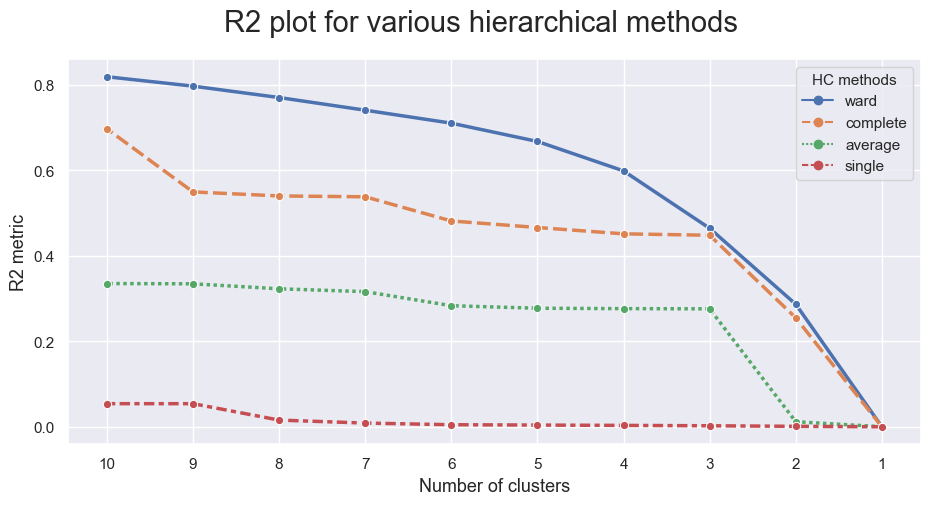

In [108]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"] #'Centroid' was not used because it doesn't belong to the AgglomerativeClustering library
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(Demographics, link_method=link, max_nclus=max_nclus)
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

Ward's displays the best results, so let's proceed to evaluate the optimal number of clusters to use.

In [109]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(Demographics)

array([11231, 12049, 14474, ...,     3,     1,     0], dtype=int64)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0.
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', vari

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRL.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHIC.TTF', name='Century Gothic', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DROGM.TTF', name='Guttman Drogolin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 0.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', style='itali

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GYADBR.TTF', name='Guttman Yad-Brush', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAH.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNAB.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GAHROM.TTF', name='Guttman Aharoni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCMI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAMDCN.TTF', name='Franklin Gothic Medium Cond', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiaz.ttf', name='Georgia', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MATURASC.TTF', name='Matura MT Script Capitals', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegoeIcons.ttf', name='Segoe Fluent Icons', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', s

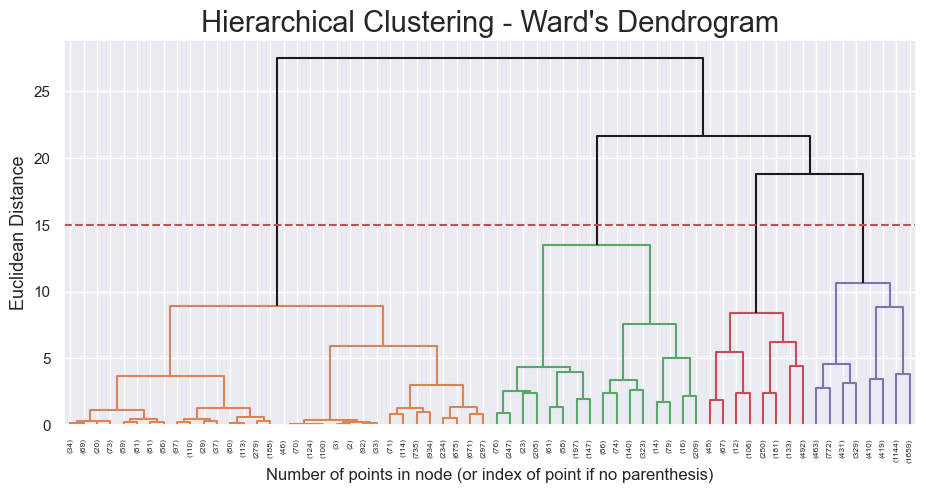

In [110]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 15
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

According to the graph, the optimal number of clusters seems to be 4 clusters, as this is where the first "big jump" in the dendogram happens.

Nevertheless, let's also evaluate the solution with 3 clusters and select the most adequate one.

### <font color='#2DA9B4'>**Testing Solutions**</font> <a class="anchor" id="testsolutions"></a>
[Back to Contents](#toc)

In [111]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(Demographics)

In [112]:
# Characterizing the 4 clusters
df_concat = pd.concat((Demographics, pd.Series(hc4_labels, name='labels', index=Demographics.index)), axis=1)
df_concat.groupby('labels').mean()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences
labels                                                                     
0       0.571280             0.091451          0.314322            0.007502
1       0.229788             0.015719          0.000000            0.000000
2       0.199176             0.044074          0.256235            0.000000
3       0.105737             0.090382          0.648004            0.067652

In [113]:
sst_hc4 = get_ss(df_concat)  # get total sum of squares
ssw_labels_hc4 = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_hc4 = sst_hc4 - np.sum(ssw_labels_hc4)  # remember: SST = SSW + SSB
r2_hc4 = ssb_hc4 / sst_hc4
r2_hc4

0.9534825607060889

In [114]:
silhouette_avg_hc4 = silhouette_score(Demographics, hc4_labels, random_state = 1)
silhouette_avg_hc4

0.37011398019059455

In [115]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)
hc3_labels = hc3lust.fit_predict(Demographics)

In [116]:
# Characterizing the 3 clusters
df_concat = pd.concat((Demographics, pd.Series(hc3_labels, name='labels', index=Demographics.index)), axis=1)
df_concat.groupby('labels').mean()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences
labels                                                                     
0       0.181794             0.052688          0.329114            0.012585
1       0.229788             0.015719          0.000000            0.000000
2       0.571280             0.091451          0.314322            0.007502

In [117]:
sst_hc3 = get_ss(df_concat)  # get total sum of squares
ssw_labels_hc3 = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_hc3 = sst_hc3 - np.sum(ssw_labels_hc3)  # remember: SST = SSW + SSB
r2_hc3 = ssb_hc3 / sst_hc3
r2_hc3

0.9169494108196773

In [118]:
silhouette_avg_hc3 = silhouette_score(Demographics, hc3_labels, random_state = 1)
silhouette_avg_hc3

0.33038599995846996

In [119]:
## Let's put both HC4 and HC3 labels in the same df to compare

df_hc4_hc3 = pd.concat((Demographics,
                        pd.Series(hc4_labels,
                                  name='hc4_labels',
                                  index=Demographics.index),
                        pd.Series(hc3_labels,
                                  name='hc3_labels',
                                  index=Demographics.index)
                        ), axis=1)

In [120]:
## See crosstab of 4 vs 3

pd.crosstab(df_hc4_hc3['hc4_labels'],
           df_hc4_hc3['hc3_labels'])

hc3_labels     0     1     2
hc4_labels                  
0              0     0  1955
1              0  5607     0
2           5627     0     0
3           1286     0     0

### <font color='#2DA9B4'>**Final Hierarquical Clustering Solution**</font> <a class="anchor" id="finalhierarchclust"></a>
[Back to Contents](#toc)

We decided that 4 clusters gave us the best solution for Ward's Hierarchical Clustering.

In [121]:
# final cluster solution
linkage = 'ward'
distance = 'euclidean'
hclust_final = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc_labels_final = hclust_final.fit_predict(Demographics)

In [122]:
# Characterizing the final clusters
df_concat_hc = pd.concat((Demographics, pd.Series(hc_labels_final, name='labels', index=Demographics.index)), axis=1)
df_concat_hc.groupby('labels').mean()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences
labels                                                                     
0       0.571280             0.091451          0.314322            0.007502
1       0.229788             0.015719          0.000000            0.000000
2       0.199176             0.044074          0.256235            0.000000
3       0.105737             0.090382          0.648004            0.067652

In [123]:
cluster_means = df_concat_hc.groupby('labels').mean().T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [124]:
sst_hc = get_ss(df_concat_hc)  # get total sum of squares
ssw_labels_hc = df_concat_hc.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_hc = sst_hc - np.sum(ssw_labels_hc)  # remember: SST = SSW + SSB
r2_hc = ssb_hc / sst_hc
r2_hc

0.9534825607060889

In [125]:
r2.append(r2_hc)

In [126]:
silhouette_avg_hc = silhouette_score(Demographics, hc_labels_final, random_state = 1)
silhouettes.append(silhouette_avg_hc)

## <font color='#2DA9B4'>**KMeans**</font> <a class="anchor" id="kmeans"></a>
[Back to Contents](#toc)

In [127]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(Demographics)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', var

findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MIRL.TTF', name='Guttman Miryam', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHIC.TTF', name='Century Gothic', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DROGM.TTF', name='Guttman Drogolin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 0.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', style='itali

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GYADBR.TTF', name='Guttman Yad-Brush', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HADASAH.TTF', name='Hadassah Friedlaender', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\VILNAB.TTF', name='Guttman Vilna', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GAHROM.TTF', name='Guttman Aharoni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCMI____.TTF', name='Tw Cen MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAMDCN.TTF', name='Franklin Gothic Medium Cond', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiaz.ttf', name='Georgia', style=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MATURASC.TTF', name='Matura MT Script Capitals', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegoeIcons.ttf', name='Segoe Fluent Icons', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', s

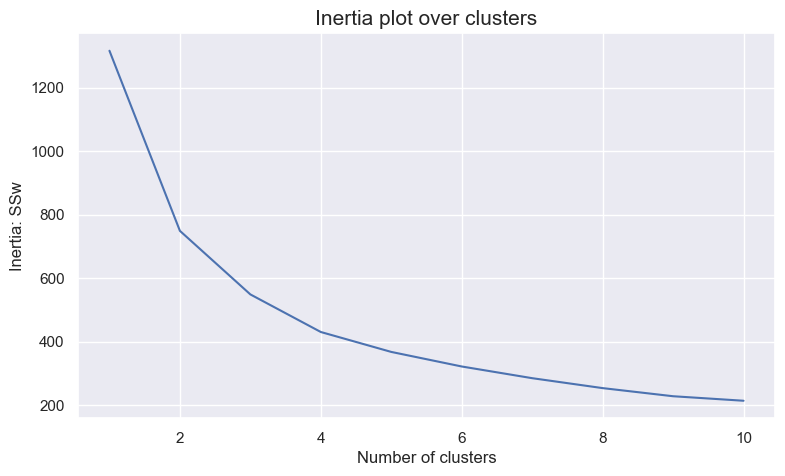

In [128]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

3 or 4 clusters seem to be our best solution.

Let's now evaluate the silhouette scores.

For n_clusters = 2, the average silhouette_score is : 0.46256564052300175
For n_clusters = 3, the average silhouette_score is : 0.45289594284640927
For n_clusters = 4, the average silhouette_score is : 0.40473975066943946
For n_clusters = 5, the average silhouette_score is : 0.4119640349691448
For n_clusters = 6, the average silhouette_score is : 0.3996113837815998
For n_clusters = 7, the average silhouette_score is : 0.43108155479953336
For n_clusters = 8, the average silhouette_score is : 0.44982143533095326
For n_clusters = 9, the average silhouette_score is : 0.45918363345958774
For n_clusters = 10, the average silhouette_score is : 0.4591996464162675


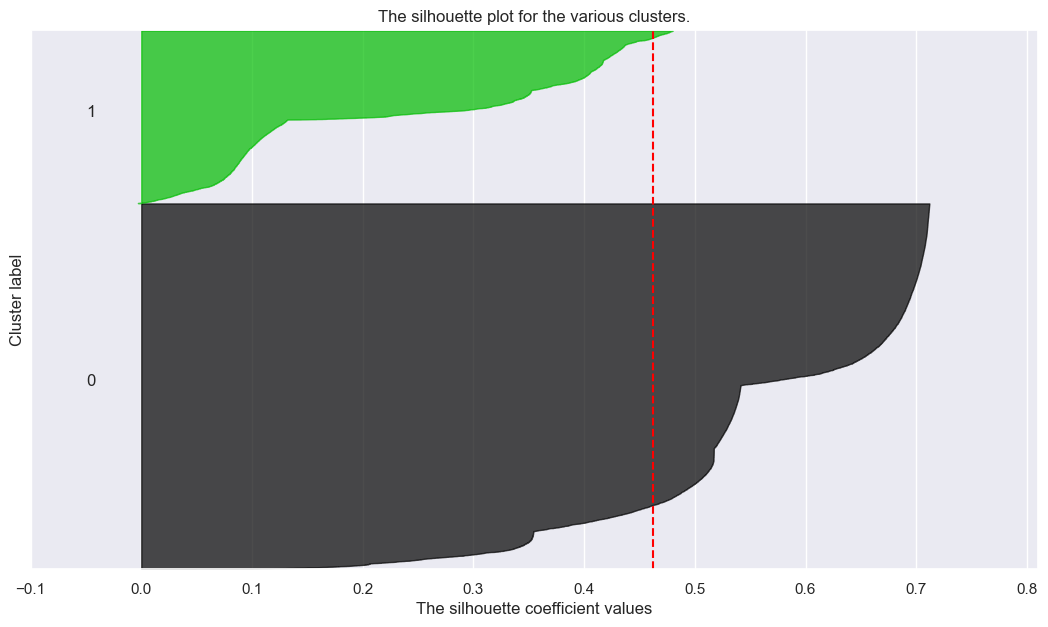

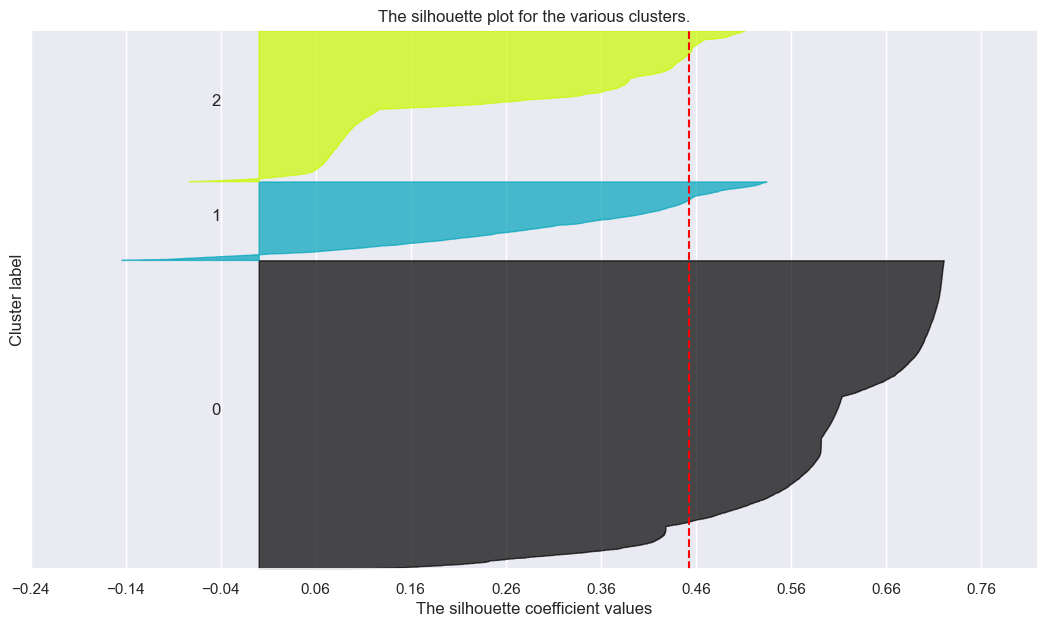

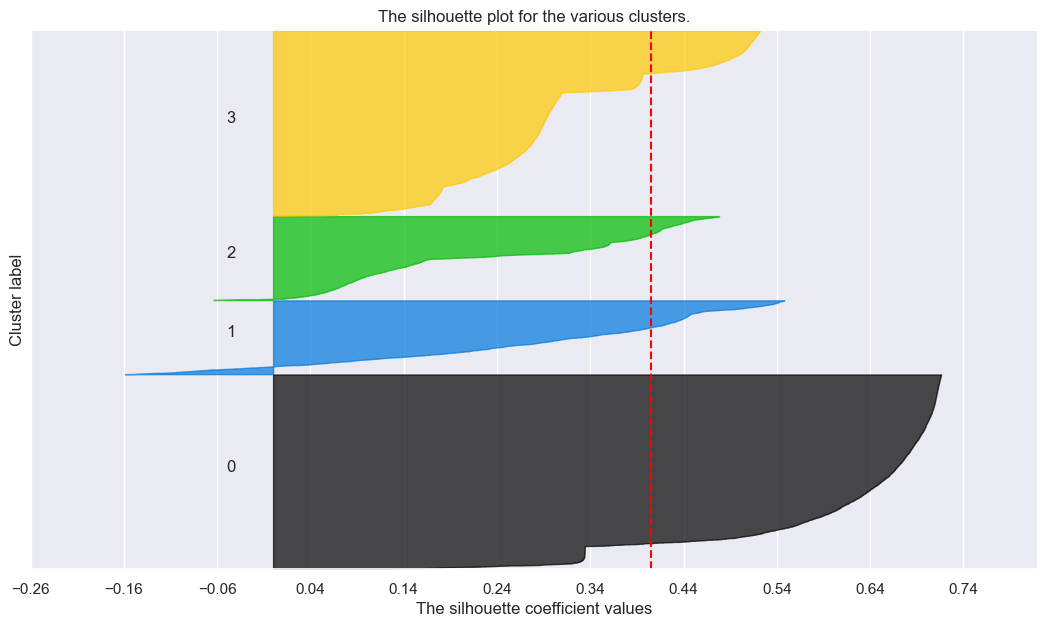

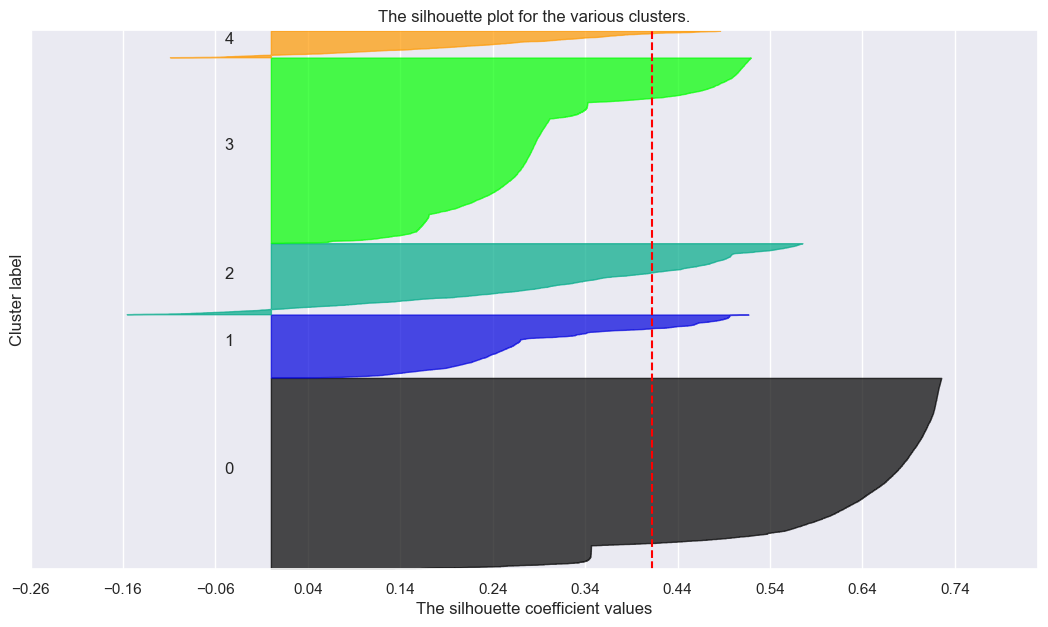

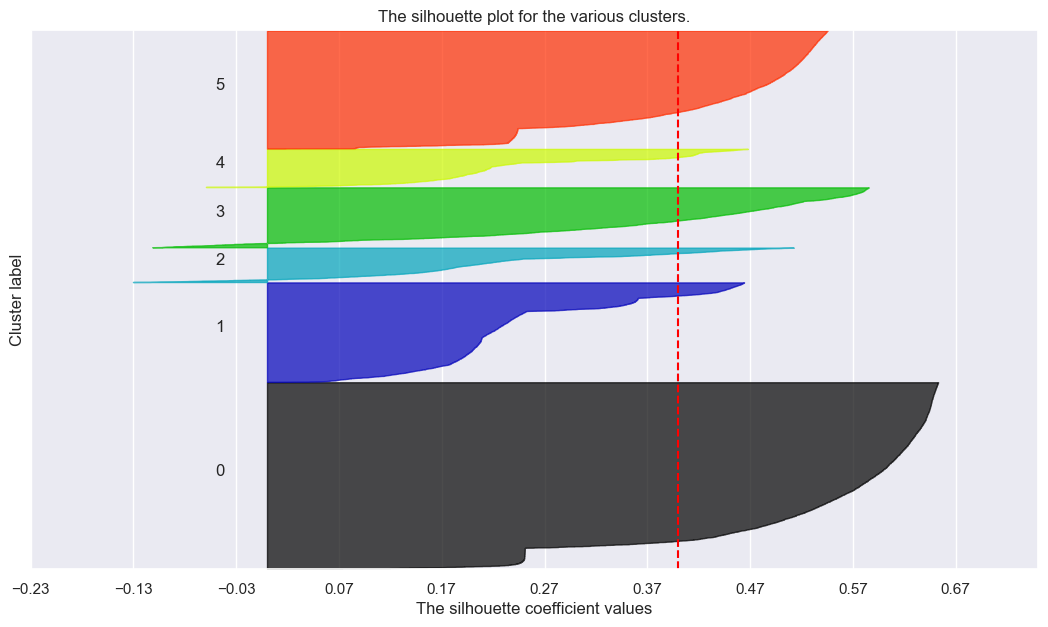

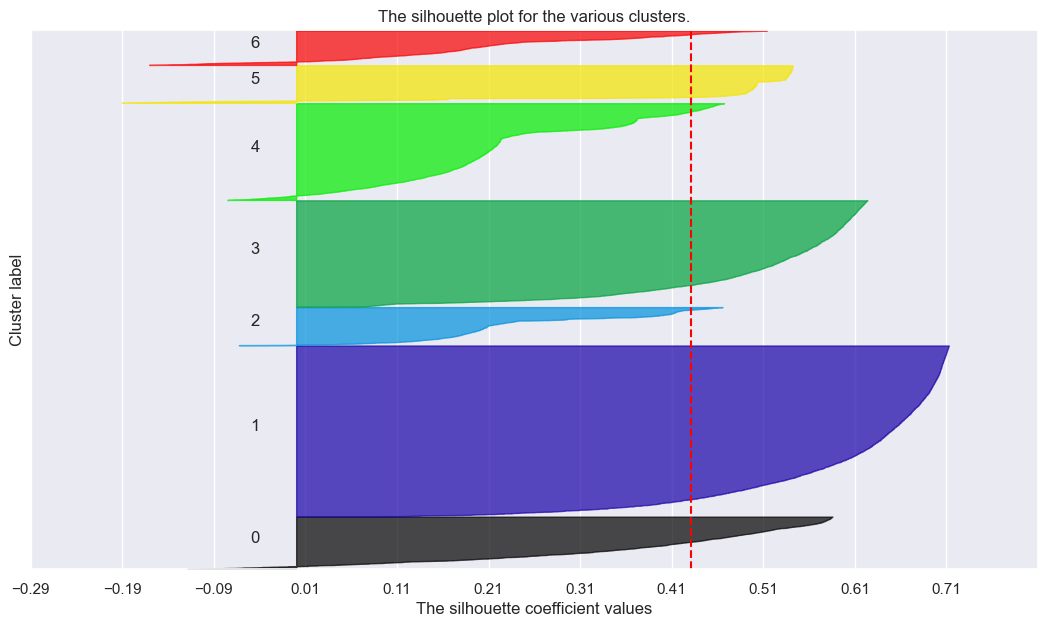

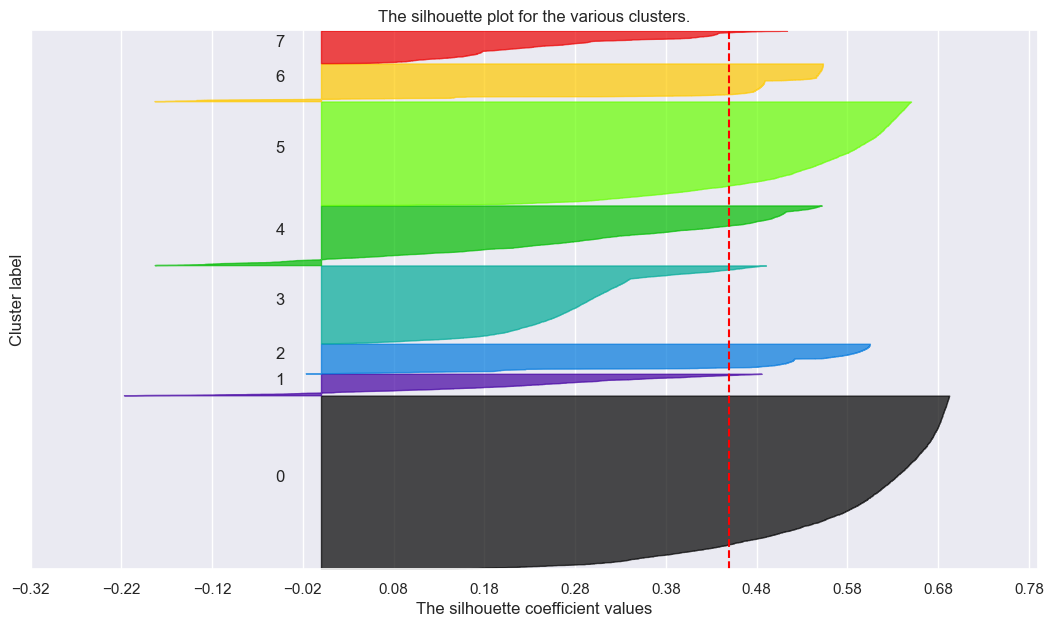

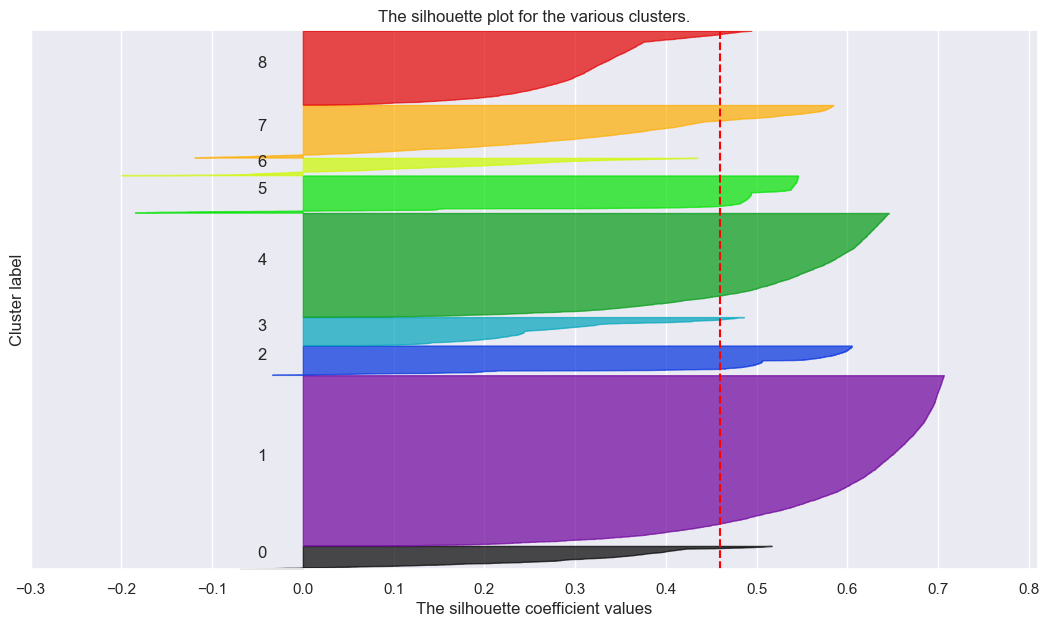

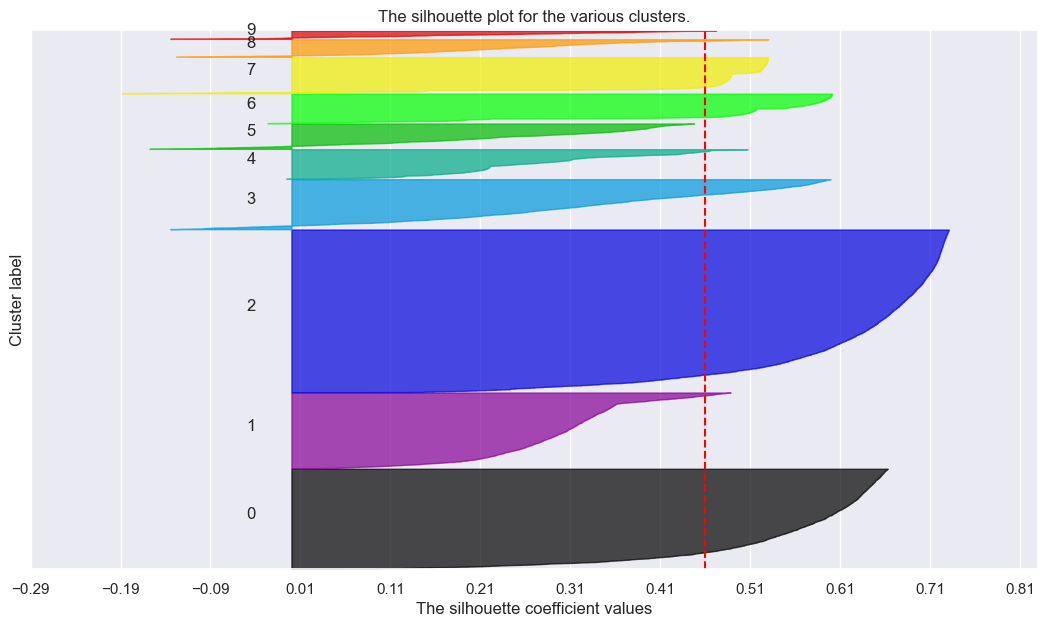

In [129]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(Demographics)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(Demographics, cluster_labels, random_state = 1)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Demographics, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])

    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(Demographics) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

From the overall graph analysis, 3 would be the best solution: it has one of the highest silhouette scores, and the smallest negative value is only 0.14, so the clusters can be said to be well-defined, and all clusters pass the mean value.

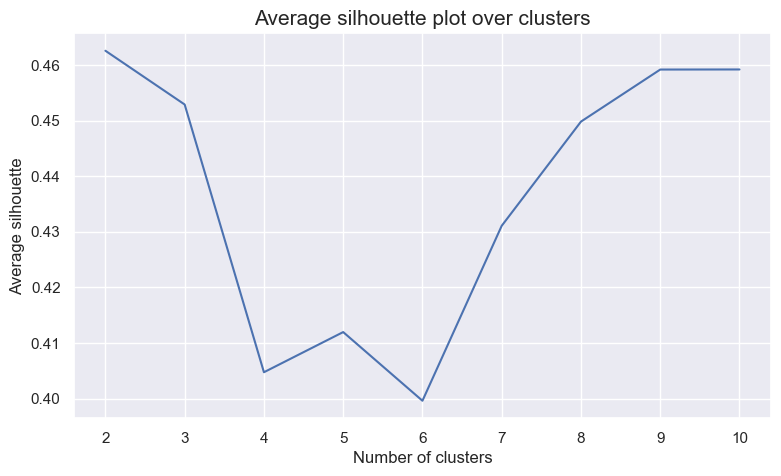

In [130]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### <font color='#2DA9B4'>**Final KMeans Solution**</font> <a class="anchor" id="finalkmeans"></a>
[Back to Contents](#toc)

We decided that the best solution for KMeans would be optained by using 3 clusters.

In [131]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(Demographics)

In [132]:
# Characterizing the final clusters
df_concat_km = pd.concat((Demographics, pd.Series(km_labels, name='labels', index=Demographics.index)), axis=1)
df_concat_km.groupby('labels').mean()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences
labels                                                                     
0       0.202040             0.021274          0.062836            0.003410
1       0.558970             0.041383          0.162879            0.004261
2       0.198006             0.090544          0.499260            0.015873

In [133]:
sst_km = get_ss(df_concat_km)  # get total sum of squares
ssw_labels_km = df_concat_km.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_km = sst_km - np.sum(ssw_labels_km)  # remember: SST = SSW + SSB
r2_km = ssb_km / sst_km
r2_km

0.9558609072078161

In [134]:
r2.append(r2_km)

In [135]:
silhouette_avg_km = silhouette_score(Demographics, km_labels, random_state = 1)
silhouettes.append(silhouette_avg_km)

## <font color='#2DA9B4'>**Self-Organizing Maps**</font> <a class="anchor" id="som"></a>
[Back to Contents](#toc)

In [136]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(1)

sm = sompy.SOMFactory().build(
    Demographics.values,
    mapsize=[10, 10],  # NEEDS TO BE A LIST
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=Demographics.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.003000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.199000, quantization error: 2.626539

 epoch: 2 ---> elapsed time:  0.129000, quantization error: 1.480118

 epoch: 3 ---> elapsed time:  0.102000, quantization error: 1.412637

 epoch: 4 ---> elapsed time:  0.115000, quantization error: 1.404630

 epoch: 5 ---> elapsed time:  0.118000, quantization error: 1.396892

 epoch: 6 ---> elapsed time:  0.100000, quantization error: 1.384948

 epoch: 7 ---> elapsed time:  0.102000, quantization error: 1.375698

 epoch: 8 ---> elapsed time:  0.083000, quantization error: 1.367931

 epoch: 9 ---> elapsed time:  0.100000, quantization error: 1.357906

 epoch: 10 ---> elapsed time:  0.100000, quantization error: 1.347425

 epoch: 11 ---> elapsed time:  0.118000, quantization error: 1.339562

 epoch: 12 ---> elapsed time:  0.083000, quantization error: 1.332877

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.101000, quantization error: 0.545679

 epoch: 15 ---> elapsed time:  0.100000, quantization error: 0.545614

 epoch: 16 ---> elapsed time:  0.116000, quantization error: 0.545551

 epoch: 17 ---> elapsed time:  0.115000, quantization error: 0.545477

 epoch: 18 ---> elapsed time:  0.102000, quantization error: 0.545451

 epoch: 19 ---> elapsed time:  0.132000, quantization error: 0.545421

 epoch: 20 ---> elapsed time:  0.117000, quantization error: 0.545404

 epoch: 21 ---> elapsed time:  0.116000, quantization error: 0.545387

 epoch: 22 ---> elapsed time:  0.117000, quantization error: 0.545381

 epoch: 23 ---> elapsed time:  0.086000, quantization error: 0.545380

 epoch: 24 ---> elapsed time:  0.099000, quantization error: 0.545380

 epoch: 25 ---> elapsed time:  0.084000, quantization error: 0.545380

 epoch: 26 ---> elapsed time:  0.131000, quantization error: 0.545380

 epoch: 27 ---> elapsed time:  0.086000, quantization error: 0.545380

 epoch

### <font color='#2DA9B4'>**U-Matrix**</font> <a class="anchor" id="umatric"></a>
[Back to Contents](#toc)

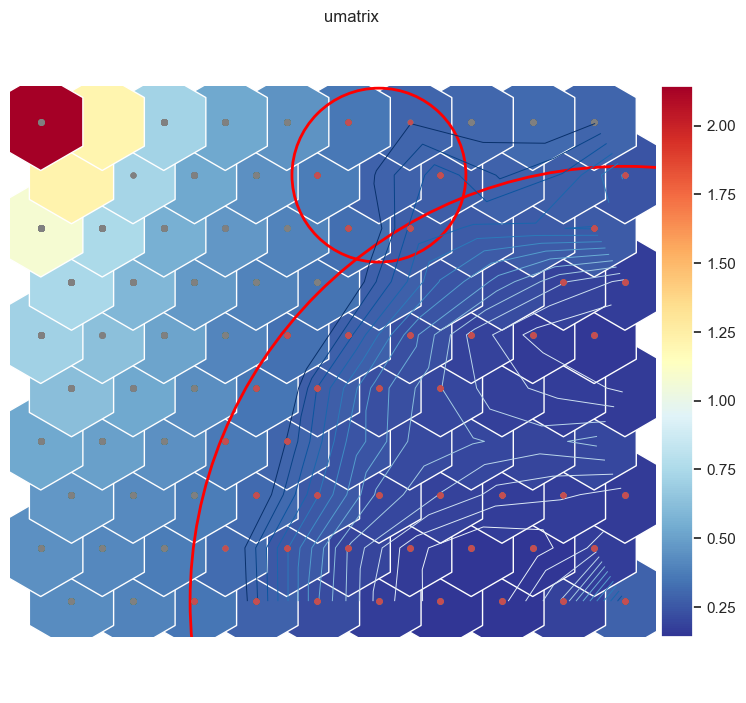

array([[2.14224965, 1.20651568, 0.71395459, 0.52646171, 0.45160774,
        0.35460202, 0.29582045, 0.30059688, 0.31028905, 0.29664965],
       [1.21985186, 0.72630801, 0.52654635, 0.44298706, 0.36948168,
        0.28941313, 0.26752199, 0.28577047, 0.2718797 , 0.23851006],
       [1.07675641, 0.74988682, 0.56316716, 0.46764589, 0.39917217,
        0.3231972 , 0.2714737 , 0.26028728, 0.26113047, 0.2631456 ],
       [0.74206947, 0.59056718, 0.47800059, 0.39441861, 0.33789408,
        0.28149473, 0.23952022, 0.21318387, 0.18705358, 0.17184561],
       [0.70553495, 0.63120555, 0.51698958, 0.40466528, 0.33498478,
        0.27694872, 0.22456859, 0.18267624, 0.16063697, 0.15416363],
       [0.62297539, 0.5294461 , 0.43791807, 0.34559228, 0.27243292,
        0.22281446, 0.19723446, 0.17800303, 0.17102763, 0.16128691],
       [0.53055917, 0.49580269, 0.43981286, 0.36422846, 0.29392191,
        0.23860977, 0.20668444, 0.19813883, 0.19199825, 0.20049567],
       [0.46884426, 0.42153496, 0.3692321

In [137]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm,
    distance=2,
    row_normalized=False,
    show_data=True,
    contour=True, # Visualize isomorphic curves
    blob=True
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

The U-Matrix identified 3 clusters.

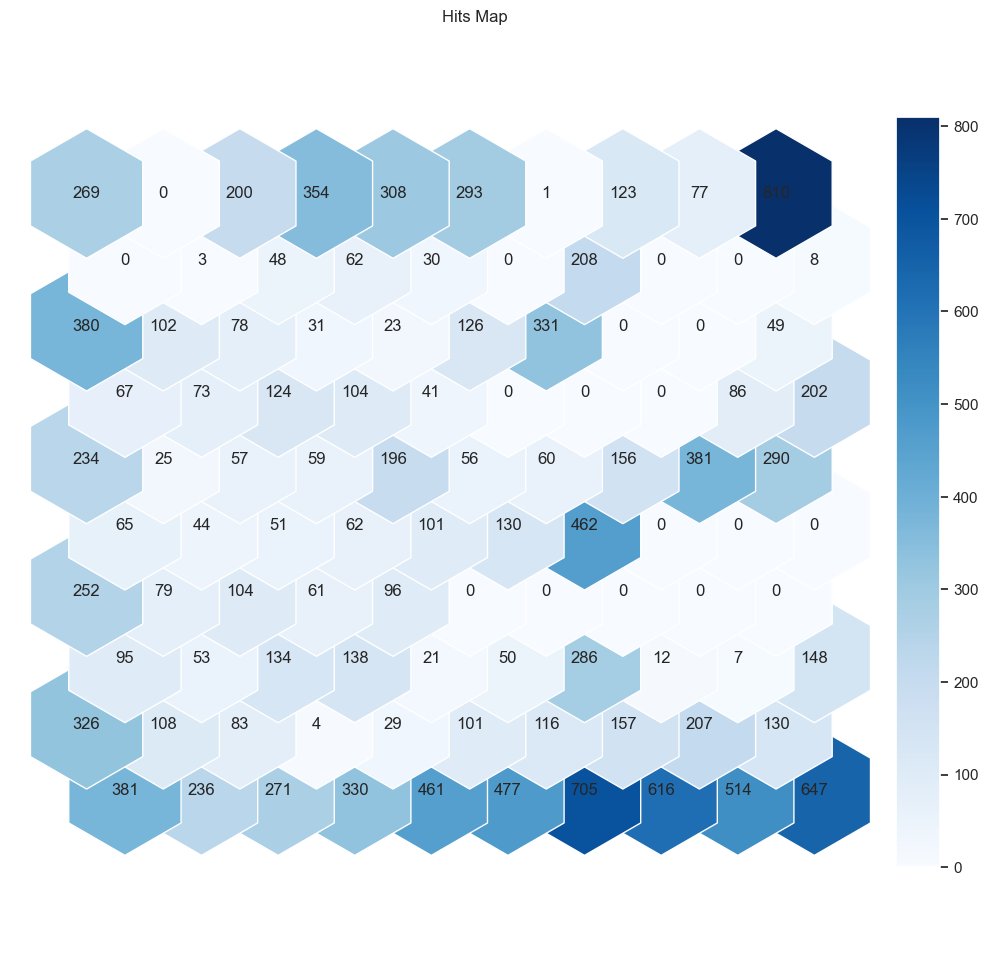

In [138]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

### <font color='#2DA9B4'>**Component Planes**</font> <a class="anchor" id="componentplanes"></a>
[Back to Contents](#toc)

In [139]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(1)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    Demographics.values,
    mapsize=[50, 50],  # NEEDS TO BE A LIST
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=Demographics.columns
)

## This will take a few minutes!
# sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)
sm.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)


 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  0.610000, quantization error: 1.060121

 epoch: 2 ---> elapsed time:  0.568000, quantization error: 1.508835

 epoch: 3 ---> elapsed time:  0.564000, quantization error: 1.485414

 epoch: 4 ---> elapsed time:  0.567000, quantization error: 1.476667

 epoch: 5 ---> elapsed time:  0.573000, quantization error: 1.468127

 epoch: 6 ---> elapsed time:  0.545000, quantization error: 1.463078

 epoch: 7 ---> elapsed time:  0.550000, quantization error: 1.459961

 epoch: 8 ---> elapsed time:  0.564000, quantization error: 1.457384

 epoch: 9 ---> elapsed time:  0.552000, quantization error: 1.454821

 epoch: 10 ---> elapsed time:  0.579000, quantization error: 1.452130

 epoch: 11 ---> elapsed time:  0.554000, quantization error: 1.449302

 epoch: 12 ---> elapsed time:  0.566000, quantization error: 1.446315

 epoch: 13 ---> 

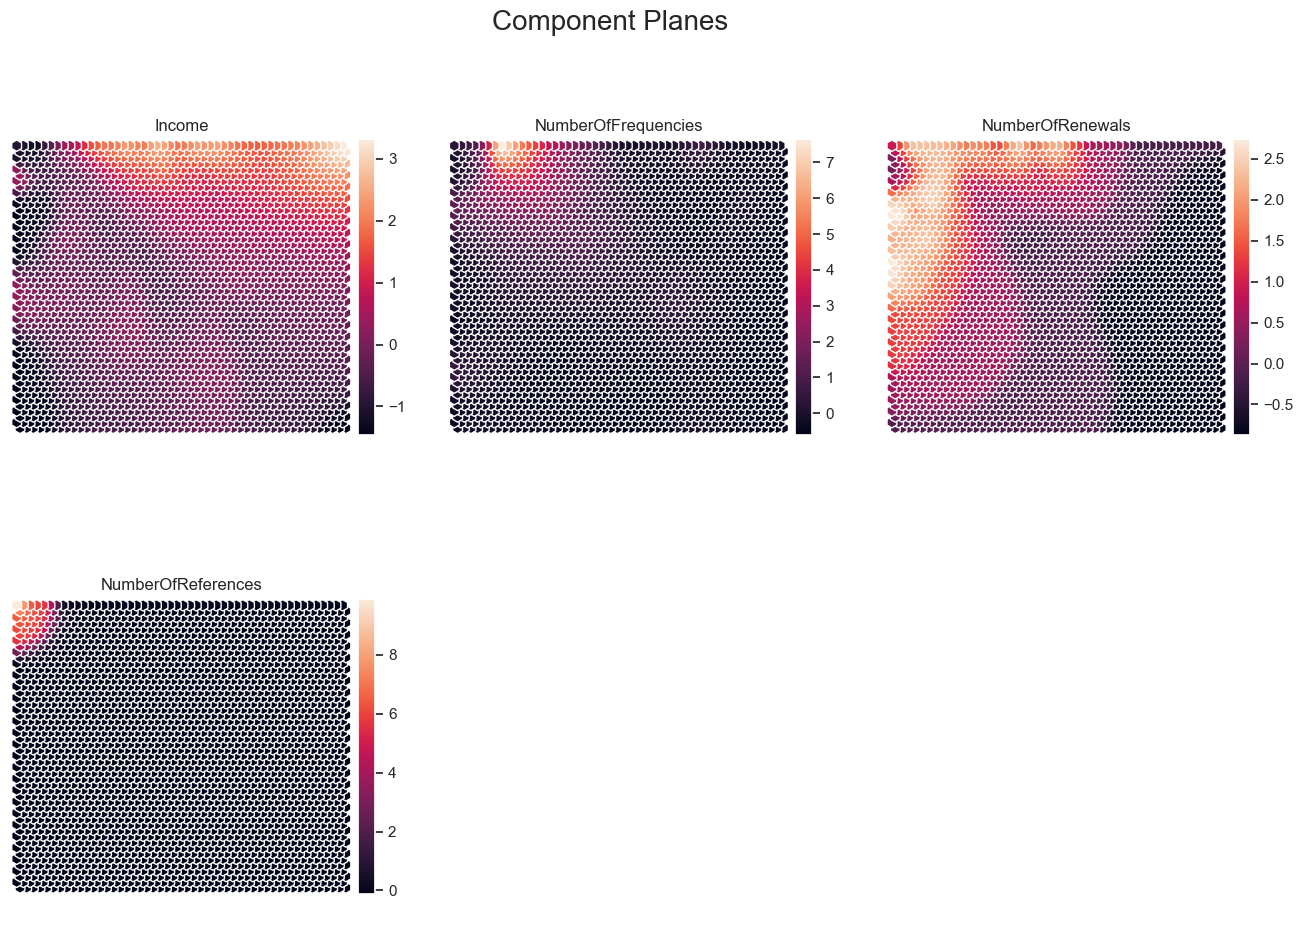

In [140]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

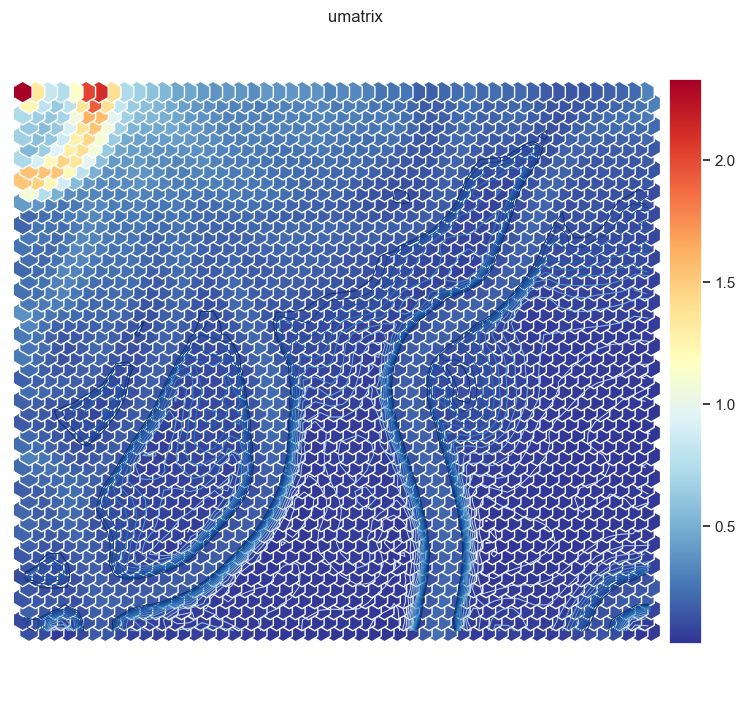

In [141]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm,
    distance=2,
    row_normalized=False,
    show_data=False,
    contour=True # Visualize isomorphic curves
)

### <font color='#2DA9B4'>**KMeans with SOM**</font> <a class="anchor" id="kmeanssom"></a>
[Back to Contents](#toc)

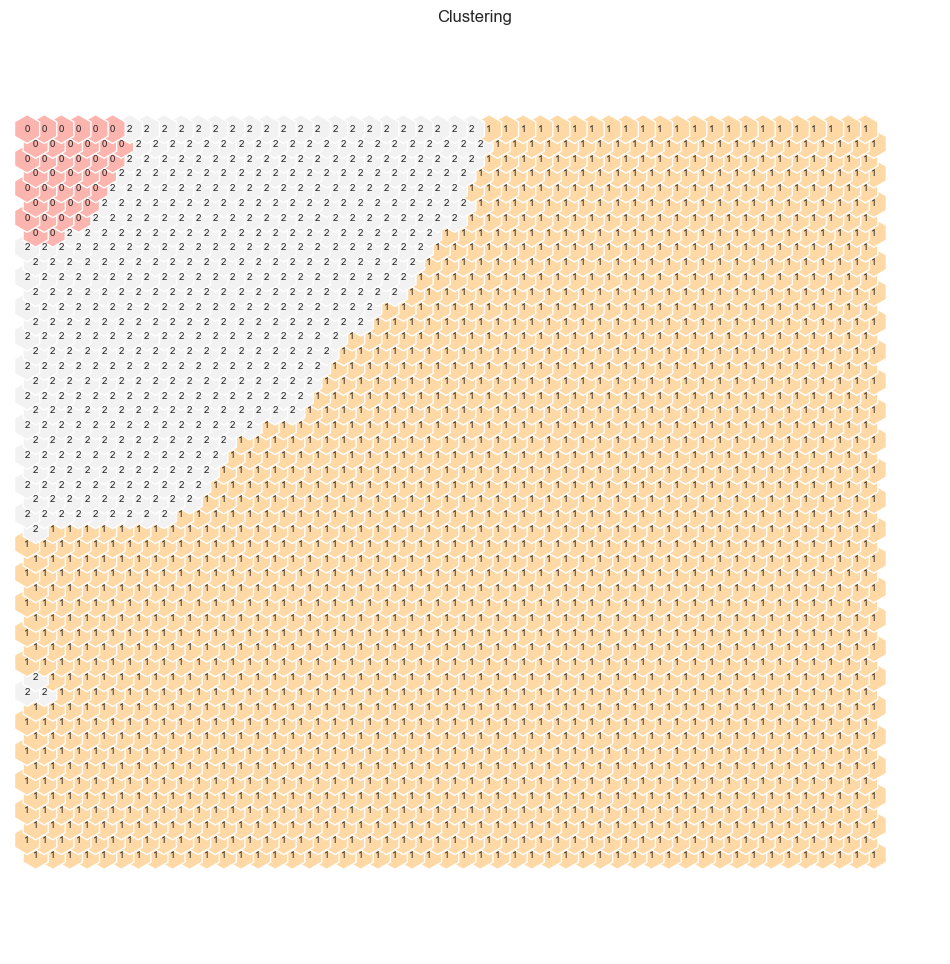

In [142]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=50, random_state=1)
nodeclus_labels_km = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels_km  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### <font color='#2DA9B4'>**Hierarchical Clustering with SOM**</font> <a class="anchor" id="hclustsom"></a>
[Back to Contents](#toc)

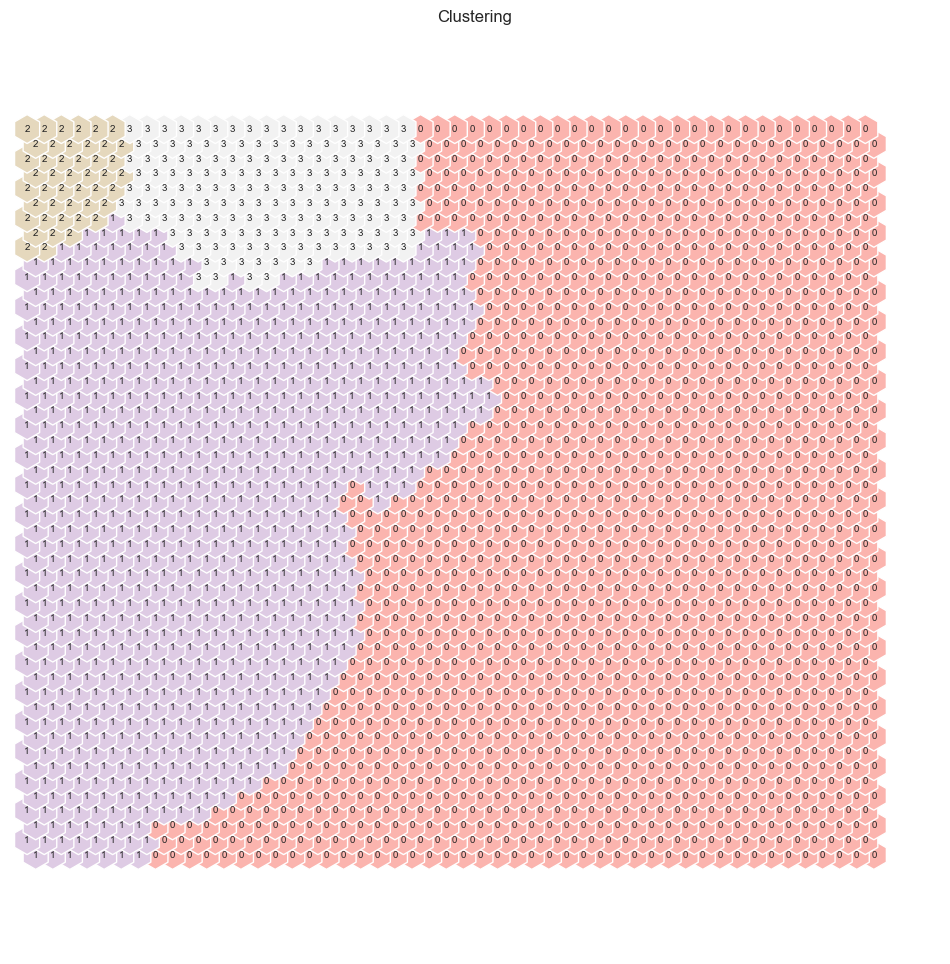

In [143]:
# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels_hc = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels_hc  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### <font color='#2DA9B4'>**Final SOM**</font> <a class="anchor" id="finalsom"></a>
[Back to Contents](#toc)

Because the clusters for the Hierarchical Clustering presented a more clear division in the Hit Map than those of KMeans, we decided to apply SOM with Hierarchical Clustering.

In [144]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=Demographics.columns)
df_nodes['label'] = nodeclus_labels_hc
df_nodes

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
0     3.317840            -0.107410         -0.156481           -0.128936   
1     3.130482            -0.153287         -0.225144           -0.128936   
2     2.911129            -0.154921         -0.210274           -0.128936   
3     2.761929            -0.303919         -0.152575           -0.128936   
4     2.581836            -0.365846         -0.165586           -0.128936   
...        ...                  ...               ...                 ...   
2495 -1.383159            -0.188072         -0.067191           -0.128936   
2496 -1.439413            -0.179101         -0.083653           -0.128936   
2497 -1.451720            -0.174764         -0.103178           -0.128936   
2498 -1.454166            -0.171282         -0.120277           -0.128936   
2499 -1.454530            -0.366409         -0.121884           -0.128936   

      label  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
2495      1  
2496      1  
2497      1  
2498      1  
2499      1  

[2500 rows x 5 columns]

In [145]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(Demographics)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((Demographics, np.expand_dims(bmus_map,1)), axis=1),
    index=Demographics.index, columns=np.append(Demographics.columns,"BMU")
)
df_bmus

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10000  0.625711             0.008969          0.000000                 0.0   
10001  0.299204             0.024664          0.333333                 0.0   
10002  0.225256             0.005605          0.000000                 0.0   
10003  0.000000             0.021300          0.000000                 0.0   
10004  0.491468             0.044843          0.500000                 0.0   
...         ...                  ...               ...                 ...   
24937  0.000000             0.124439          0.500000                 0.0   
24938  0.226394             0.062780          0.000000                 0.0   
24939  0.205916             0.005605          0.000000                 0.0   
24940  0.546075             0.206278          0.333333                 0.0   
24941  0.420933             0.188341          0.666667                 0.0   

          BMU  
ID             
10000   720.0  
10001  1481.0  
10002   970.0  
10003  1120.0  
10004   572.0  
...       ...  
24937  1385.0  
24938   971.0  
24939   970.0  
24940   622.0  
24941  1483.0  

[14475 rows x 5 columns]

In [146]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10000  0.625711             0.008969          0.000000                 0.0   
10001  0.299204             0.024664          0.333333                 0.0   
10002  0.225256             0.005605          0.000000                 0.0   
10003  0.000000             0.021300          0.000000                 0.0   
10004  0.491468             0.044843          0.500000                 0.0   
...         ...                  ...               ...                 ...   
24937  0.000000             0.124439          0.500000                 0.0   
24938  0.226394             0.062780          0.000000                 0.0   
24939  0.205916             0.005605          0.000000                 0.0   
24940  0.546075             0.206278          0.333333                 0.0   
24941  0.420933             0.188341          0.666667                 0.0   

          BMU  label  
ID                    
10000   720.0      0  
10001  1481.0      1  
10002   970.0      0  
10003  1120.0      0  
10004   572.0      0  
...       ...    ...  
24937  1385.0      1  
24938   971.0      0  
24939   970.0      0  
24940   622.0      0  
24941  1483.0      1  

[14475 rows x 6 columns]

In [147]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences
label                                                                     
0      0.276055             0.028729          0.093657            0.004774
1      0.208055             0.072580          0.406076            0.011405

In [148]:
sst_som = get_ss(df_final[Demographics.columns.to_list()])  # get total sum of squares
ssw_labels_som = df_final[Demographics.columns.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb_som = sst_som - np.sum(ssw_labels_som)  # remember: SST = SSW + SSB
r2_som = ssb_som / sst_som
r2_som

0.2569231844382677

In [149]:
r2.append(r2_som)

In [150]:
silhouette_avg_som = silhouette_score(Demographics, bmus_map, random_state = 1)
silhouettes.append(silhouette_avg_som)

## <font color='#2DA9B4'>**Mean Shift Clustering**</font> <a class="anchor" id="msc"></a>
[Back to Contents](#toc)

The quantile values for the bandwidth were adjusted in such a way that the estimated number of values fitted the results that we got previously (between 3 and 4 clusters).

In the end, the 0.60 quantile was the one selected, indicating 3 clusters.

In [151]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(Demographics, quantile=0.60, random_state=1, n_jobs=-1)
bandwidth

0.37902036832823083

In [152]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(Demographics)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


In [153]:
# Concatenating the labels to df
df_concat_msc = pd.concat([Demographics, pd.Series(ms_labels, index=Demographics.index, name="ms_labels")], axis=1)
df_concat_msc.head()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10000  0.625711             0.008969          0.000000                 0.0   
10001  0.299204             0.024664          0.333333                 0.0   
10002  0.225256             0.005605          0.000000                 0.0   
10003  0.000000             0.021300          0.000000                 0.0   
10004  0.491468             0.044843          0.500000                 0.0   

       ms_labels  
ID                
10000          0  
10001          0  
10002          0  
10003          0  
10004          0

In [154]:
# Computing the R^2 of the cluster solution
sst_msc = get_ss(df_concat_msc)  # get total sum of squares
ssw_labels_msc = df_concat_msc.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_msc = sst_msc - np.sum(ssw_labels_msc)  # remember: SST = SSW + SSB
r2_msc = ssb_msc / sst_msc
r2_msc

0.19283300863193573

In [155]:
r2.append(r2_msc)

In [156]:
silhouette_avg_msc = silhouette_score(Demographics, ms_labels, random_state = 1)
silhouettes.append(silhouette_avg_msc)

## <font color='#2DA9B4'>**DBSCAN**</font> <a class="anchor" id="dbscanclust"></a>
[Back to Contents](#toc)

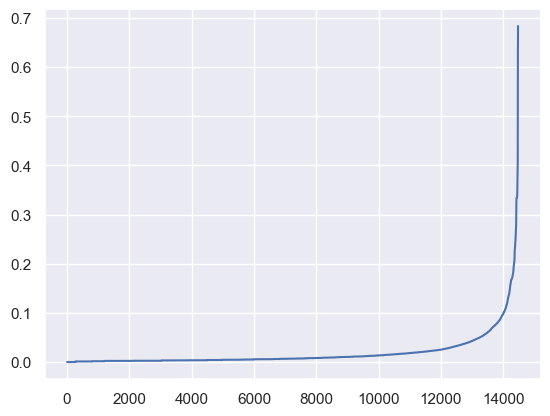

In [157]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(Demographics)
distances, _ = neigh.kneighbors(Demographics)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [158]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.08, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(Demographics)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 14


From the graphic, 0.08 seems to be the most suitable value for eps, although the estimated number of clusters was considerably high. Neighbor values were also tested, and they retrieved even higher cluster numbers, so we settled for this one.

In [159]:
Counter(dbscan_labels)

Counter({0: 5950,
         1: 2185,
         2: 1116,
         3: 190,
         4: 3791,
         -1: 387,
         5: 179,
         11: 29,
         6: 431,
         7: 92,
         9: 35,
         8: 35,
         10: 32,
         12: 23})

In [160]:
# Concatenating the labels to df
df_concat_dbscan = pd.concat([Demographics, pd.Series(dbscan_labels, index=Demographics.index, name="dbscan_labels")], axis=1)
df_concat_dbscan.head()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10000  0.625711             0.008969          0.000000                 0.0   
10001  0.299204             0.024664          0.333333                 0.0   
10002  0.225256             0.005605          0.000000                 0.0   
10003  0.000000             0.021300          0.000000                 0.0   
10004  0.491468             0.044843          0.500000                 0.0   

       dbscan_labels  
ID                    
10000              0  
10001              1  
10002              0  
10003              0  
10004              2

In [161]:
# Detecting noise (potential outliers)
df_concat_dbscan.loc[df_concat_dbscan['dbscan_labels'] == -1]

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10016  0.510808             0.330717          0.833333            0.000000   
10060  0.336746             0.413677          0.833333            0.000000   
10075  0.287827             0.460762          0.666667            0.000000   
10217  0.468714             0.428251          0.500000            0.000000   
10223  0.641638             0.153587          0.833333            0.000000   
...         ...                  ...               ...                 ...   
24739  0.171786             0.072870          0.833333            0.333333   
24766  0.761092             0.049327          0.833333            0.000000   
24832  0.457338             0.103139          0.500000            0.333333   
24890  0.000000             0.134529          0.500000            0.333333   
24918  0.440273             0.528027          0.833333            0.000000   

       dbscan_labels  
ID                    
10016             -1  
10060             -1  
10075             -1  
10217             -1  
10223             -1  
...              ...  
24739             -1  
24766             -1  
24832             -1  
24890             -1  
24918             -1  

[387 rows x 5 columns]

In [162]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat_dbscan.loc[df_concat_dbscan['dbscan_labels'] != -1]
sst_nonoise = get_ss(Demographics)  # get total sum of squares
ssw_labels_nonoise = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_nonoise = sst_nonoise - np.sum(ssw_labels_nonoise)  # remember: SST = SSW + SSB
r2_nonoise = ssb_nonoise / sst_nonoise
r2_nonoise

0.694997812872764

In [163]:
r2.append(r2_nonoise)

In [164]:
silhouette_avg_dbscan = silhouette_score(Demographics, dbscan_labels, random_state = 1)
silhouettes.append(silhouette_avg_dbscan)

## <font color='#2DA9B4'>**Gaussian Mixture Model**</font> <a class="anchor" id="gmm"></a>
[Back to Contents](#toc)

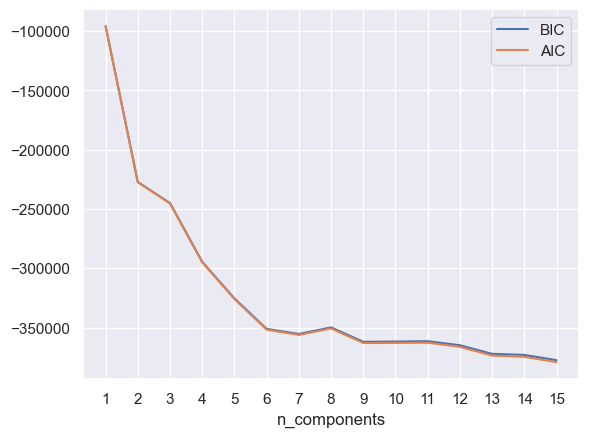

In [165]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(Demographics)
          for n in n_components]

bic_values = [m.bic(Demographics) for m in models]
aic_values = [m.aic(Demographics) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

6 seems to be the optimal number of components as it represents the point where the BIC and AIC values start to stabilize.

In [166]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=6, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(Demographics)

In [167]:
# Concatenating the labels to df
df_concat_gmm = pd.concat([Demographics, pd.Series(gmm_labels, index=Demographics.index, name="gmm_labels")], axis=1)
df_concat_gmm.head()

Income  NumberOfFrequencies  NumberOfRenewals  NumberOfReferences  \
ID                                                                           
10000  0.625711             0.008969          0.000000                 0.0   
10001  0.299204             0.024664          0.333333                 0.0   
10002  0.225256             0.005605          0.000000                 0.0   
10003  0.000000             0.021300          0.000000                 0.0   
10004  0.491468             0.044843          0.500000                 0.0   

       gmm_labels  
ID                 
10000           0  
10001           3  
10002           0  
10003           0  
10004           1

In [168]:
# Computing the R^2 of the cluster solution
sst_gmm = get_ss(Demographics)  # get total sum of squares
ssw_labels_gmm = df_concat_gmm.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_gmm = sst_gmm - np.sum(ssw_labels_gmm)  # remember: SST = SSW + SSB
r2_gmm = ssb_gmm / sst_gmm
r2_gmm

0.5822505944347278

In [169]:
r2.append(r2_gmm)

In [170]:
silhouette_avg_gmm = silhouette_score(Demographics, gmm_labels, random_state = 1)
silhouettes.append(silhouette_avg_gmm)

## <font color='#2DA9B4'>**Demographics Results**</font> <a class="anchor" id="demoresults"></a>
[Back to Contents](#toc)

Before proceeding to the other perspective, we plotted all the r-squares and silhouette scores of the experimented clustering methods.

In [171]:
Models = ['Hierarchical Clustering', 'KMeans', 'Hierarchical Clustering With SOM', 'Mean Shift Clustering', 'DBSCAN', 'Gaussian Mixture Model']

scores = {'Models': Models, 'R-Squared': r2, 'Silhouette Scores': silhouettes}

Demographics_scores = pd.DataFrame(scores)
Demographics_scores = Demographics_scores.sort_values(by=['R-Squared', 'Silhouette Scores'], ascending=False)

Demographics_scores

Models  R-Squared  Silhouette Scores
1                            KMeans   0.955861           0.452896
0           Hierarchical Clustering   0.953483           0.370114
4                            DBSCAN   0.694998           0.303077
5            Gaussian Mixture Model   0.582251           0.296367
2  Hierarchical Clustering With SOM   0.256923           0.146395
3             Mean Shift Clustering   0.192833           0.515255

KMeans was the best clustering method, displaying the highest scores for both metrics, so we decided to select it as our clustering representation for the Demographic's perspective.

# <font color='#2DA9B4'>**Activities**</font> <a class="anchor" id="activities"></a>
[Back to Contents](#toc)

As this perspective contained mainly binary values, KModes was used to create the clusters.

## <font color='#2DA9B4'>**KMode**</font> <a class="anchor" id="kmode"></a>
[Back to Contents](#toc)

In [172]:
# Simililarly to the implementation of k-means, we will find the elbow plot for the number of clusters in kmode

# Elbow curve to find optimal K
cost = []
range_clusters = range(1,11)
for k in range_clusters:  # iterate over desired ncluster range
	kmode = KModes(n_clusters=k, init = "Huang", n_init = 5, verbose=1)
	kmode.fit_predict(Activities)
	cost.append(kmode.cost_)  # save the cost of the given cluster solution

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13199.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 13199.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 13199.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 13199.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 13199.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 348, cost: 10681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10681.0
Init: initializing centroids
Init: initializing clusters
Starting iterati

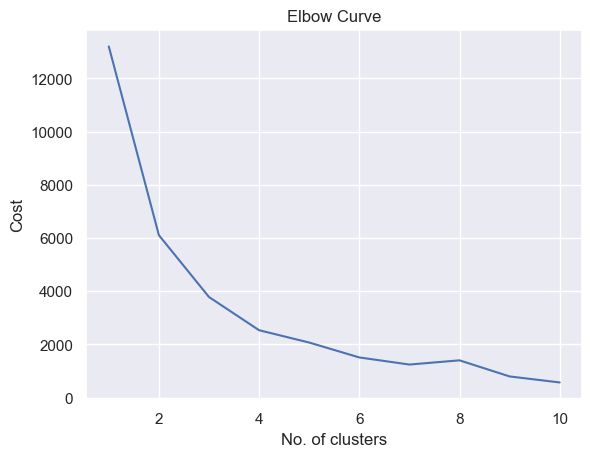

In [173]:
plt.plot(range_clusters, cost)
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

4 or 5 clusters seem to be our best solution, so let's proceed to evaluate the silhouette scores.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 463, cost: 6105.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2344, cost: 6105.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 403, cost: 11685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6105.0
Best run was number 1
For n_clusters = 2, the average silhouette_score is : 0.6713890936282737
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 458, cost: 10077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2179, cost: 5642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 816, cost: 

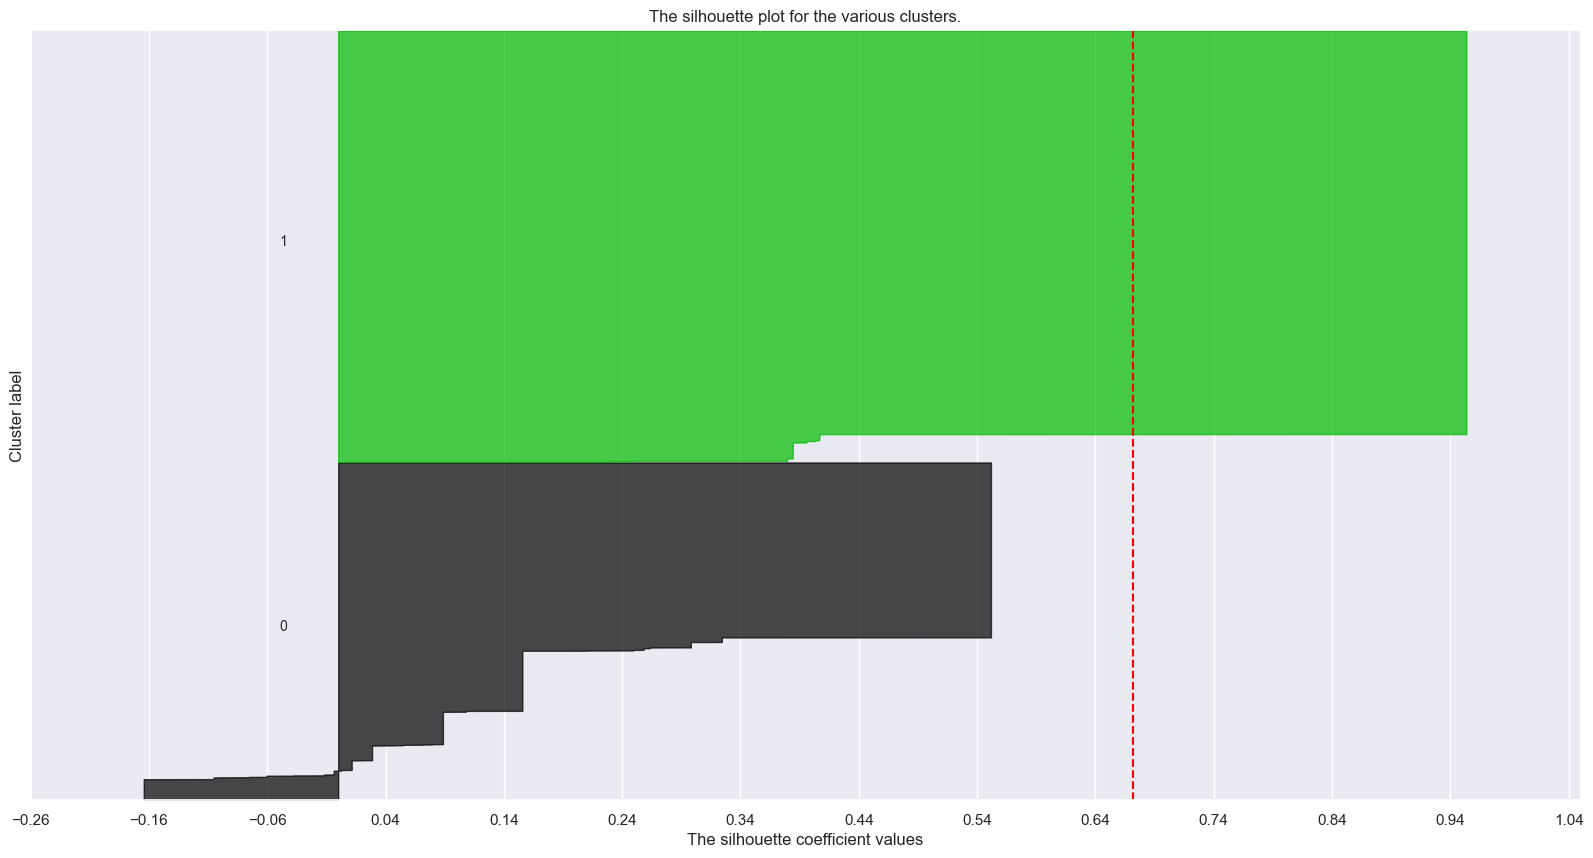

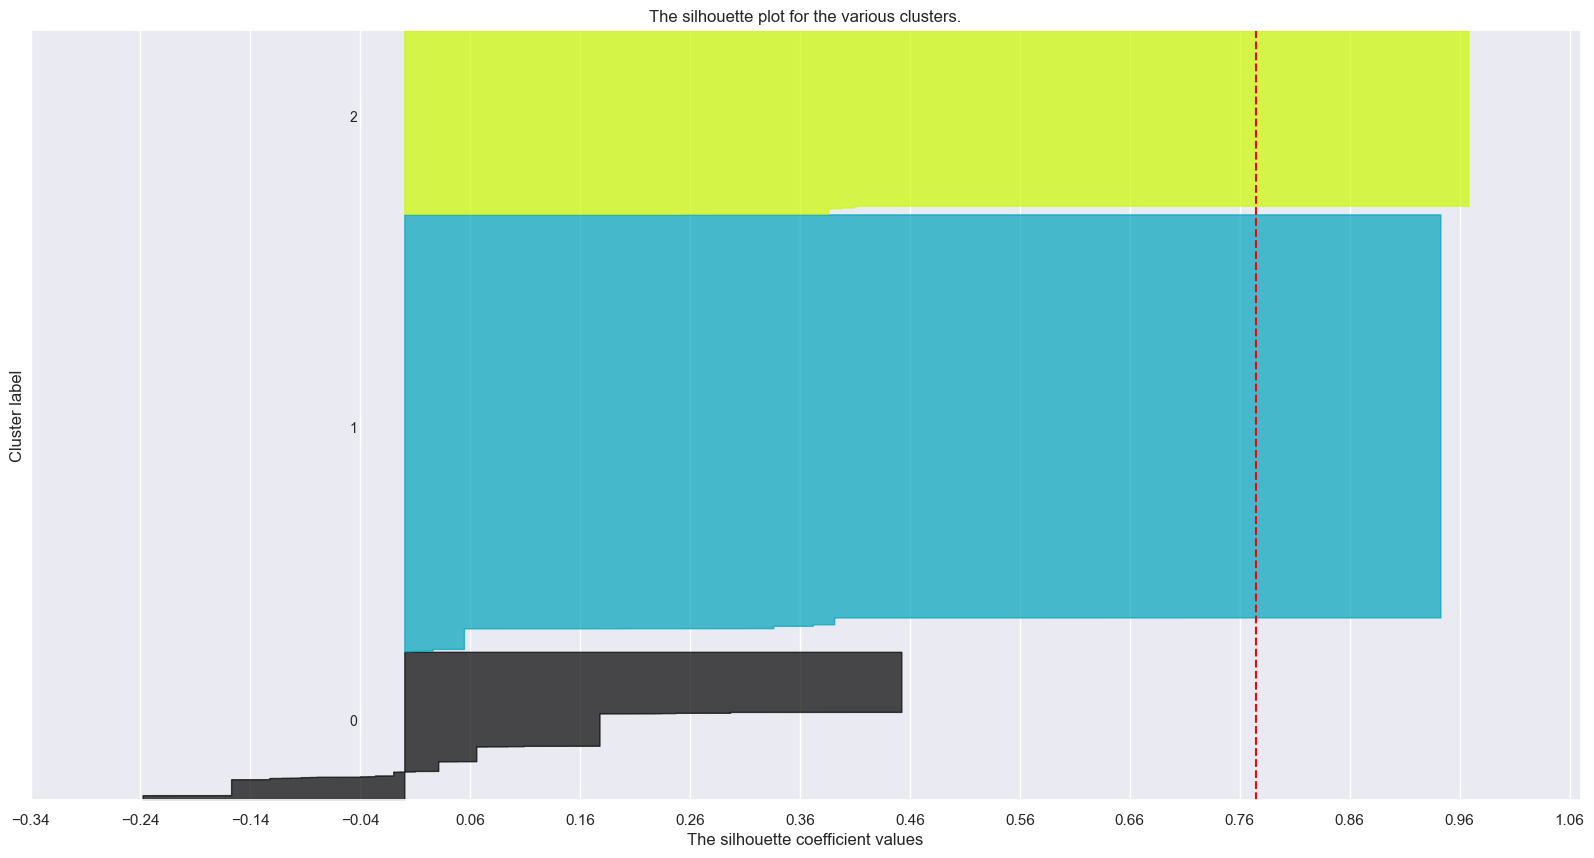

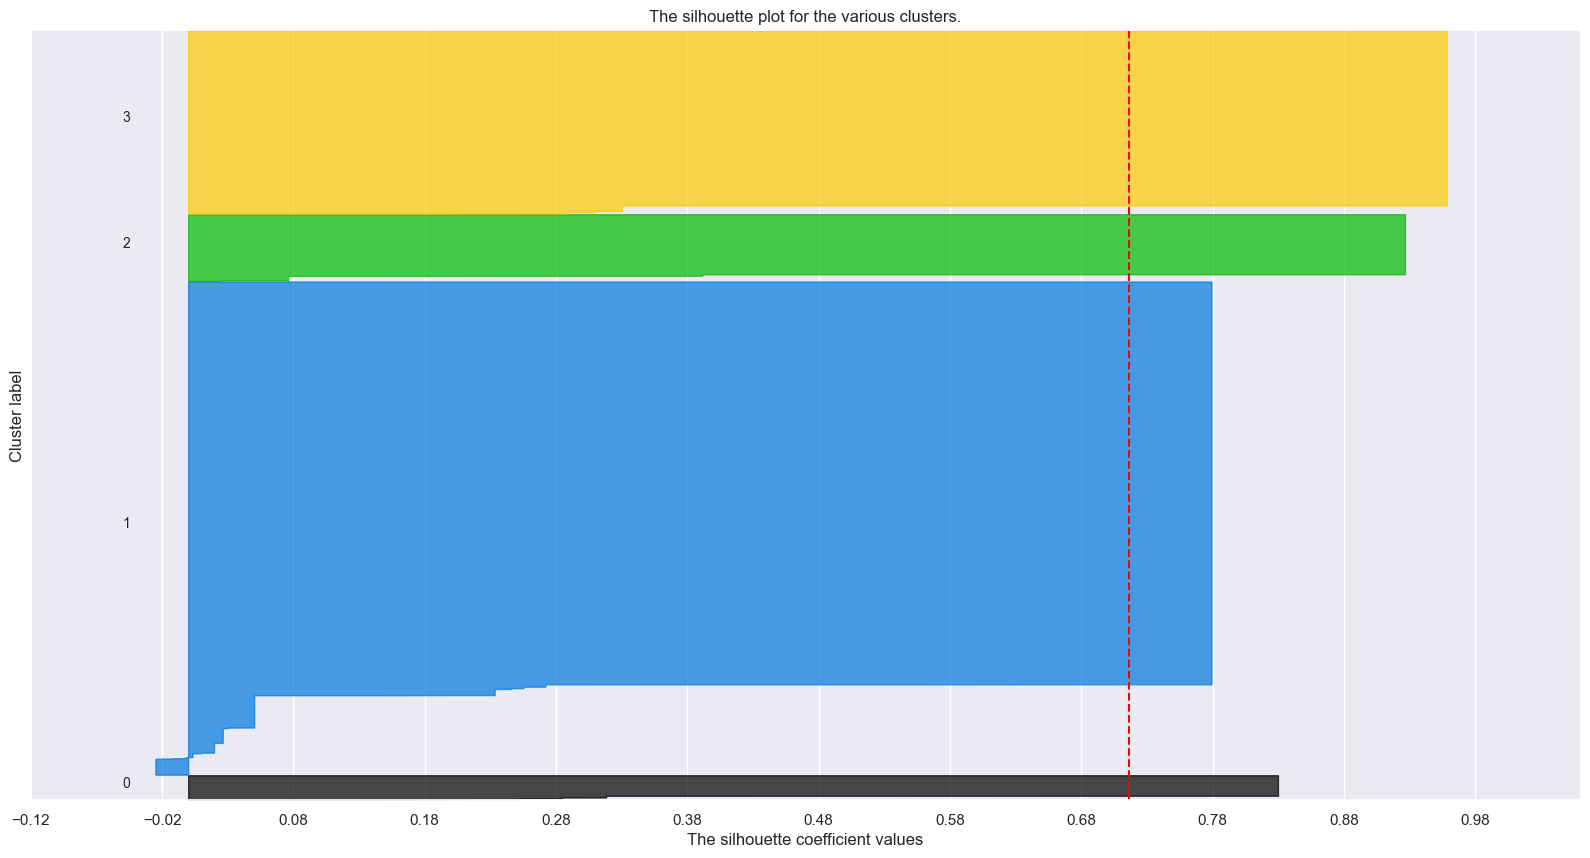

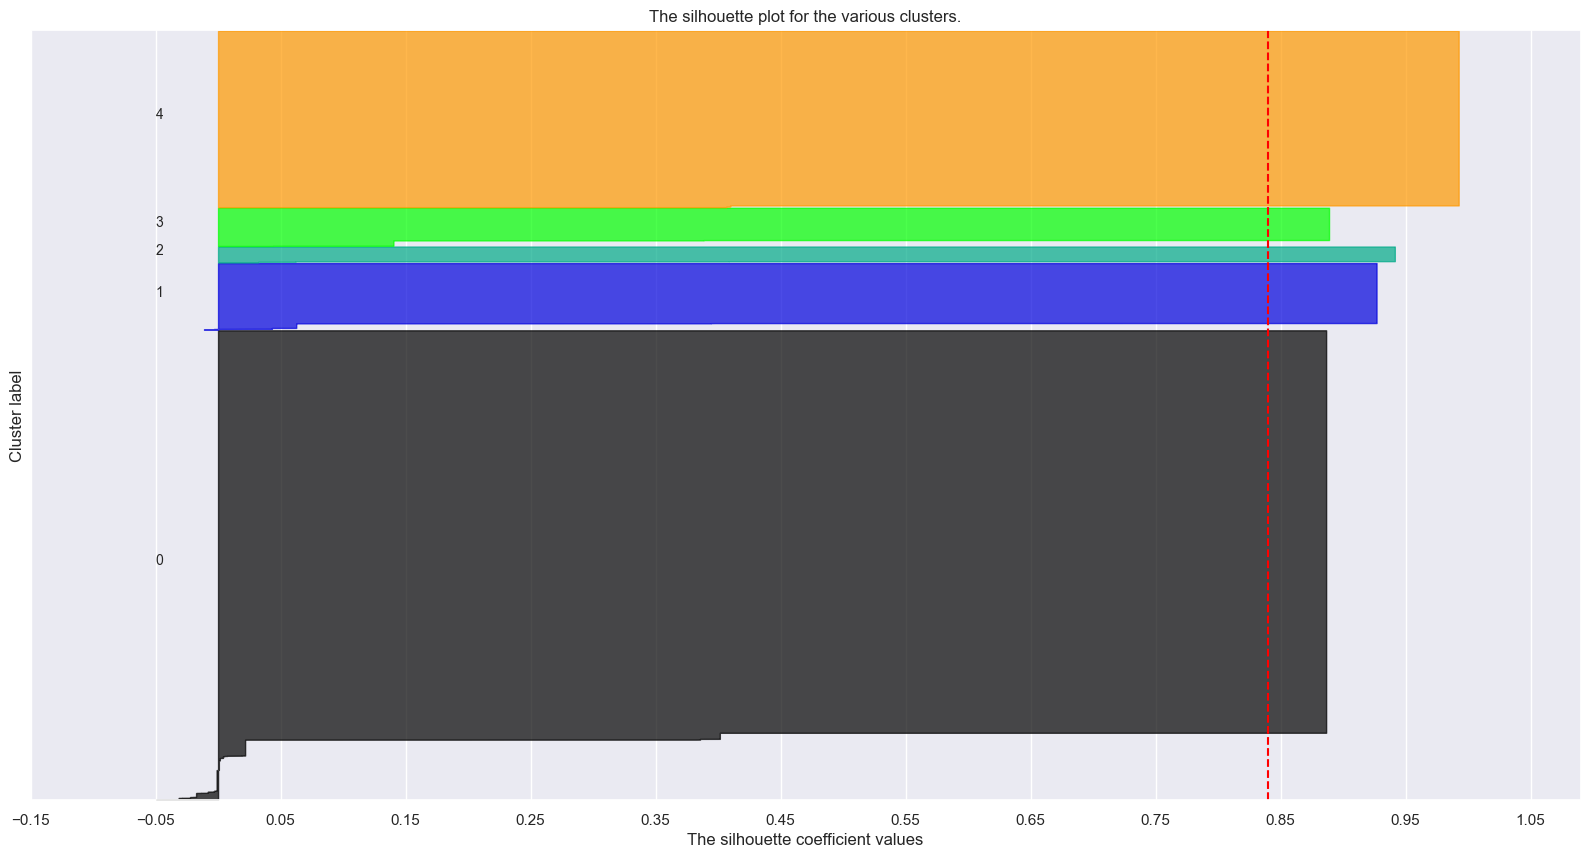

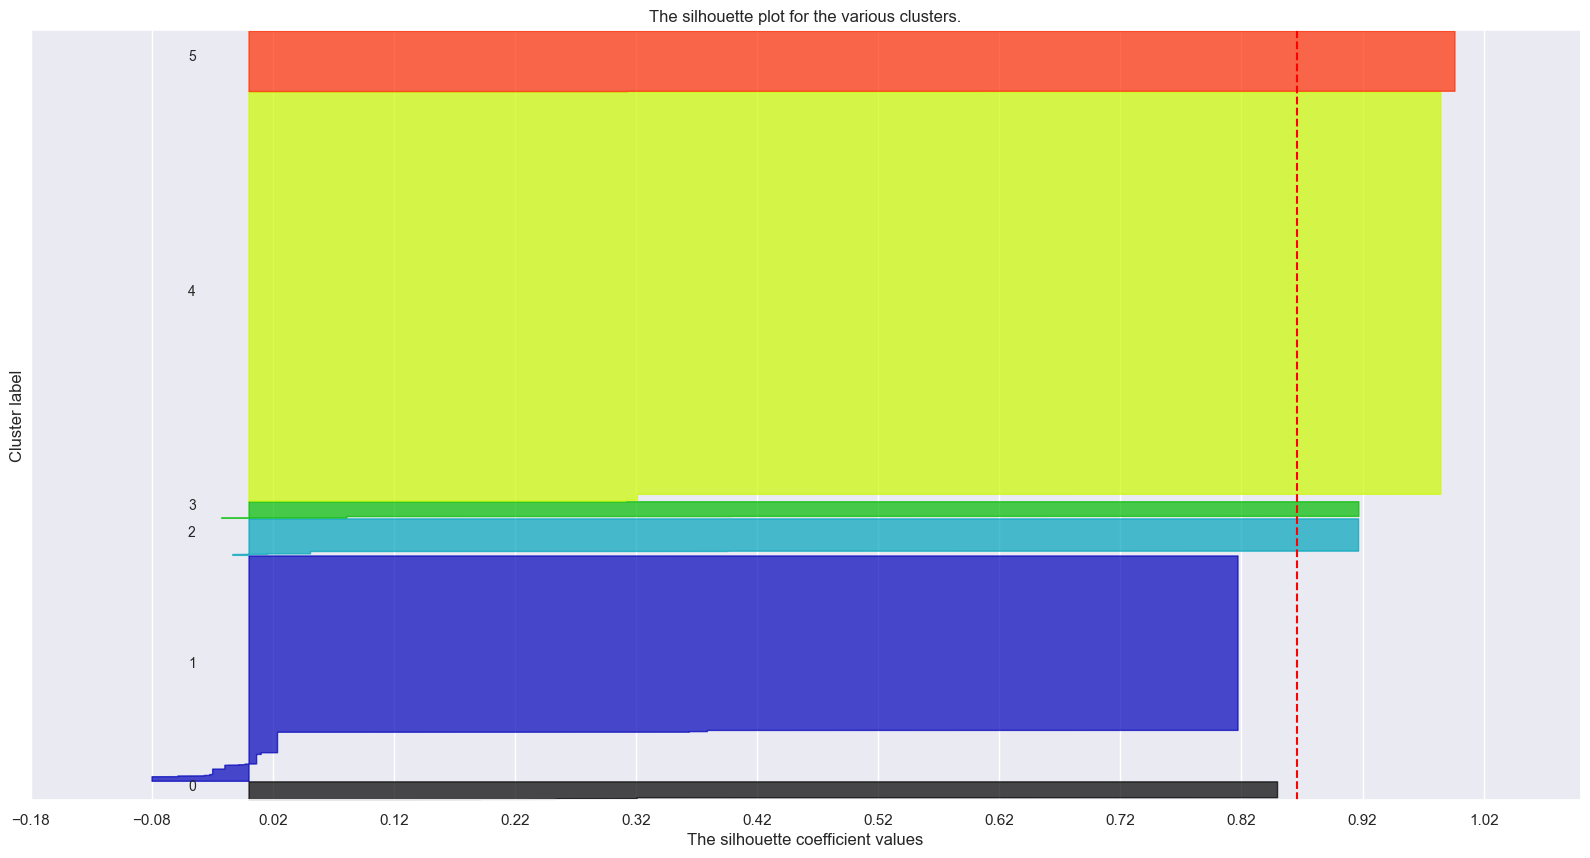

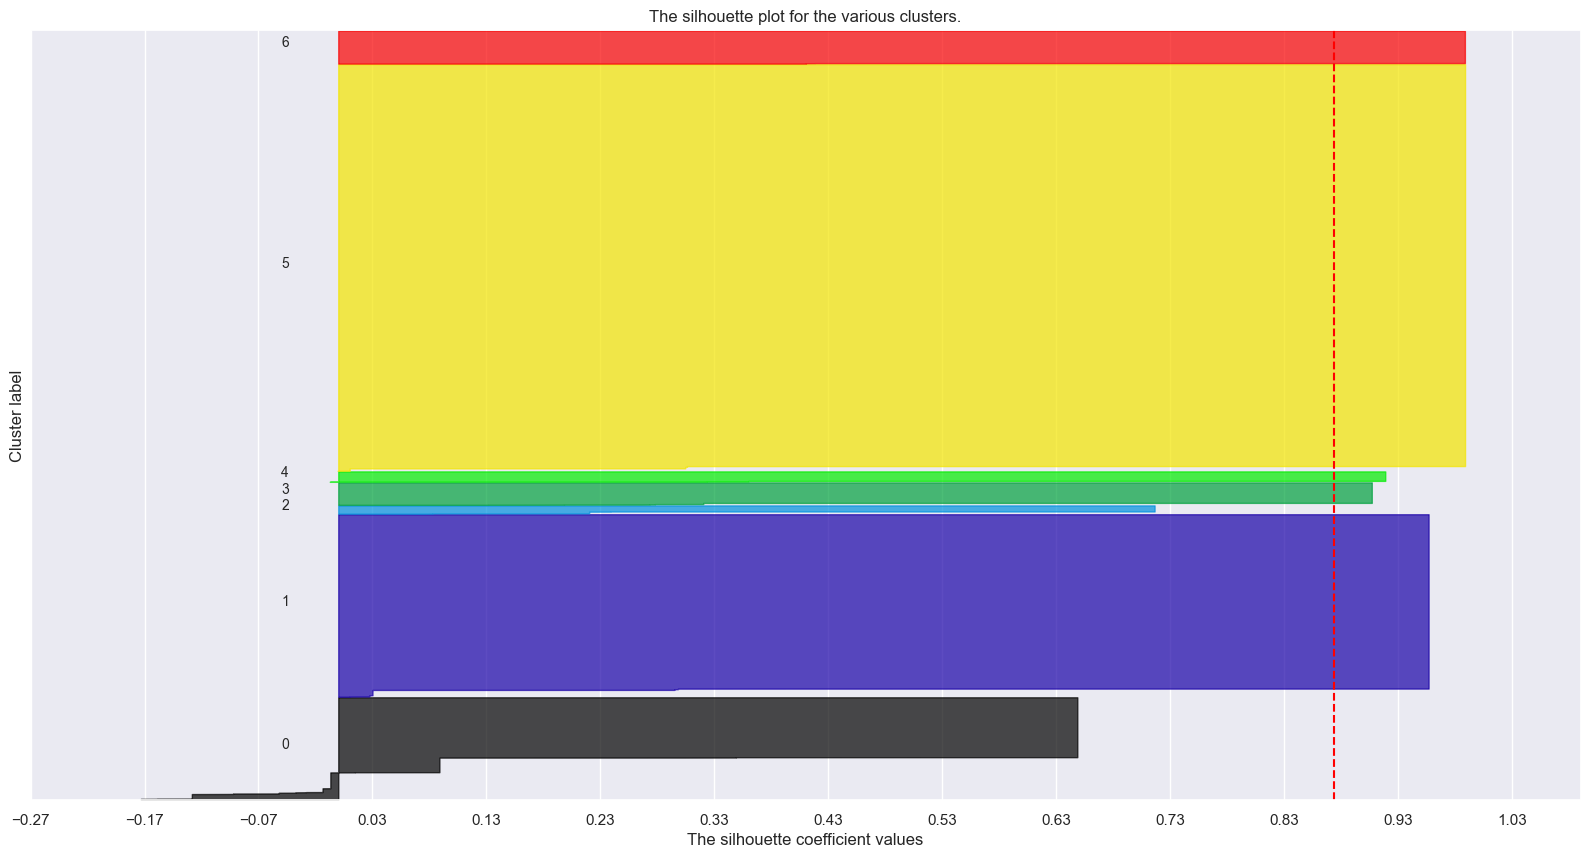

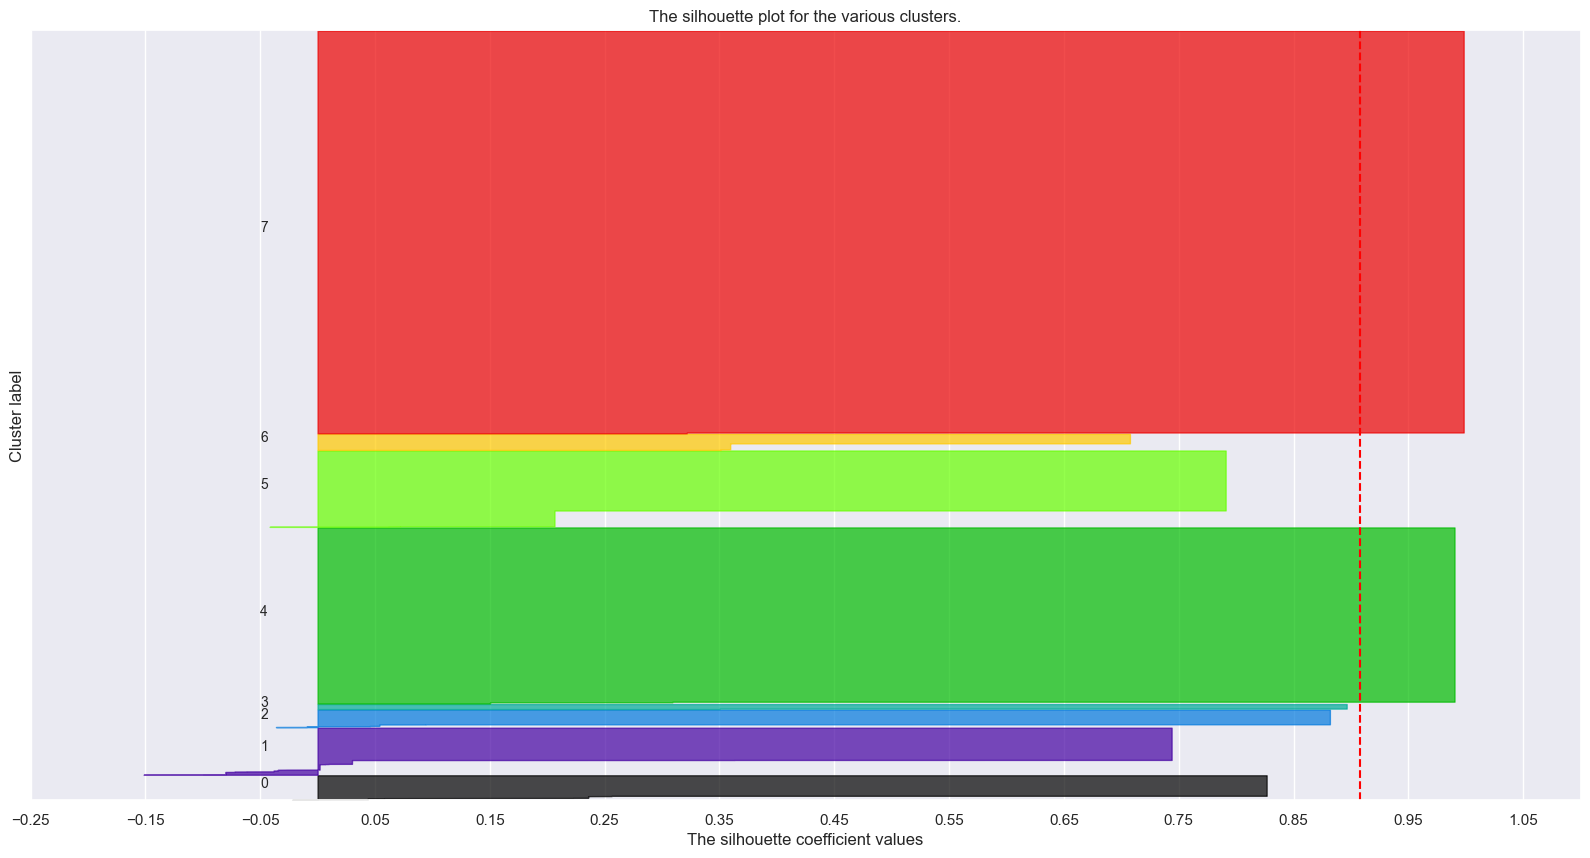

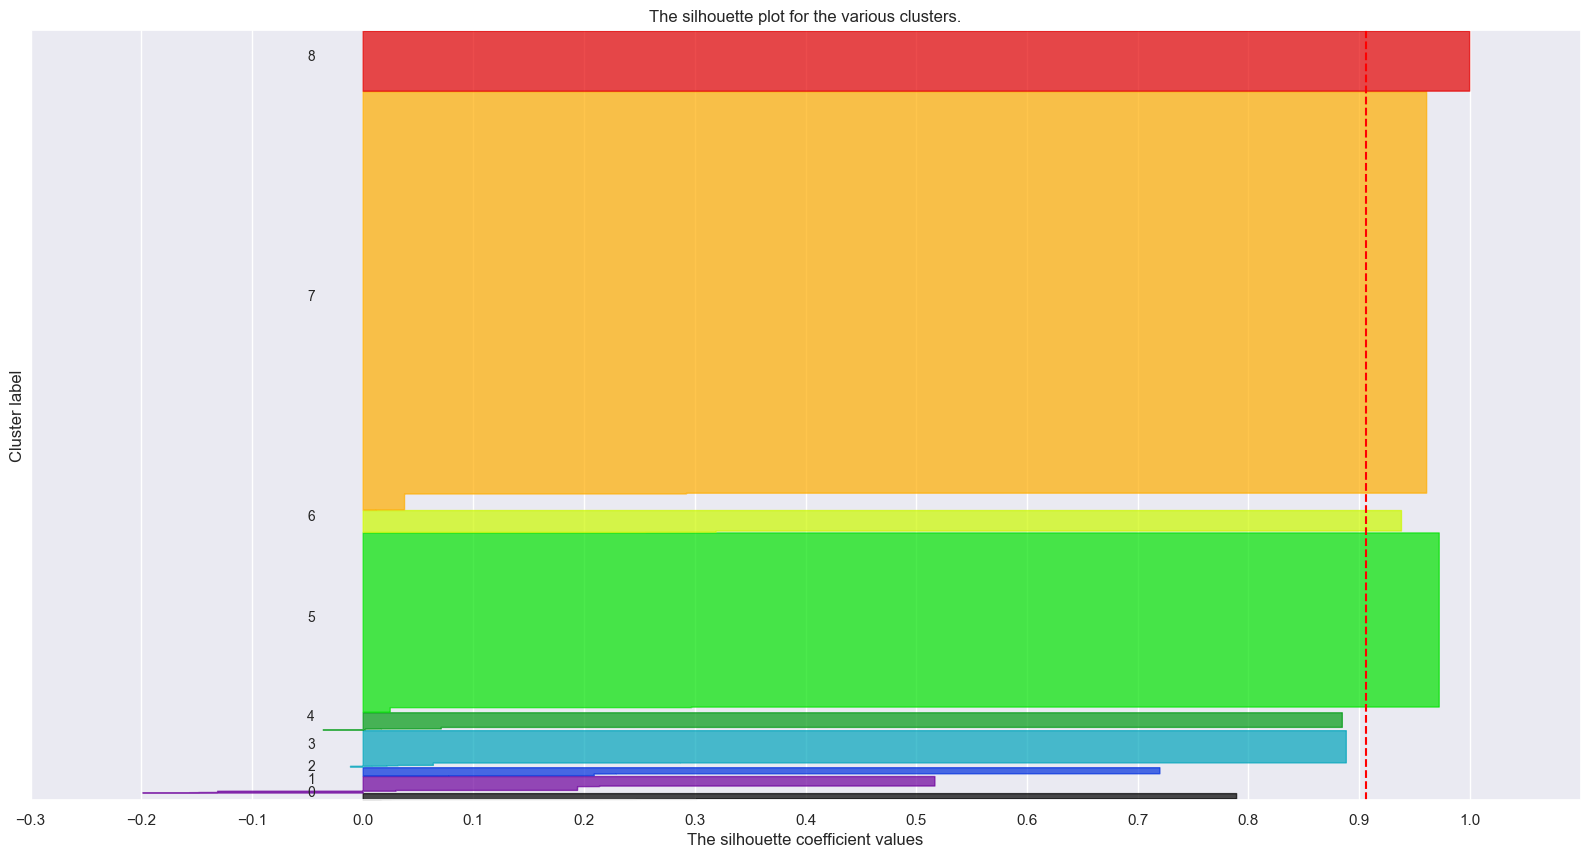

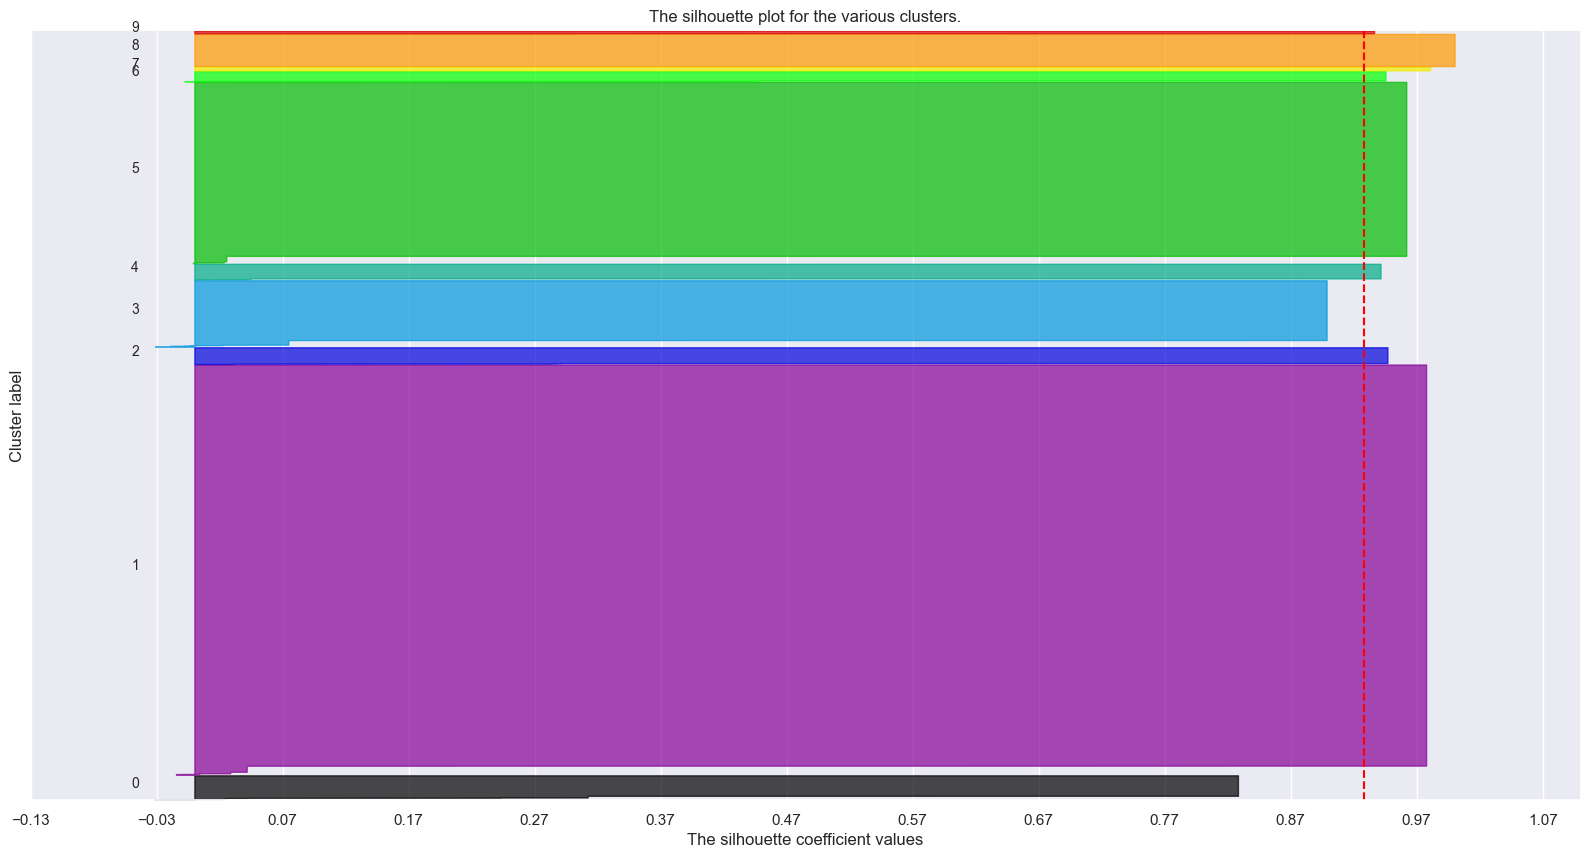

In [174]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Create a figure
    fig = plt.figure(figsize=(20, 10))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmode = KModes(n_clusters=nclus, init = "Huang", n_init = 4, verbose=1, random_state = 1)
    cluster_labels = kmode.fit_predict(Activities)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(Activities, cluster_labels,metric='hamming', random_state = 1)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Activities, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])

    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(Activities) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

4 clusters is our selected choice for the Activities' perspective as it displays a good silhouette score, all clusters pass the mean value, and the smallest negative is only 0.02, so the clusters are well defined.

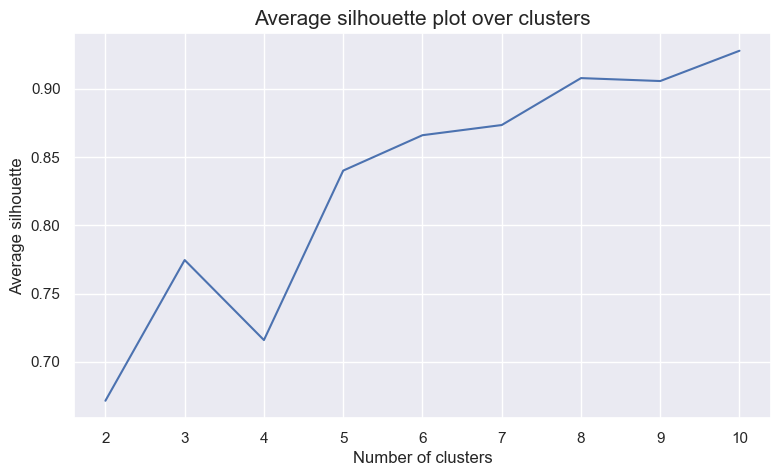

In [175]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

Final solution:

In [176]:
kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1, random_state = 1)
clusters = kmode.fit_predict(Activities)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4014, cost: 3653.0
Run 1, iteration: 2/100, moves: 1408, cost: 3653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1122, cost: 8633.0
Run 2, iteration: 2/100, moves: 6, cost: 8633.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3433.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 414, cost: 3318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 923, cost: 2533.0
Best run was number 5


In [177]:
# Characterizing the final clusters
df_concat_kmode = pd.concat((Activities, pd.Series(clusters, name='labels', index=Activities.index)), axis=1)
df_concat_kmode.groupby('labels').mean()

AthleticsActivities  WaterActivities  FitnessActivities  \
labels                                                            
0                  0.009954         0.050645           0.938963   
1                  0.003947         1.000000           0.000000   
2                  0.003115         0.000000           0.000000   
3                  0.000874         0.000000           0.000000   

        TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
labels                                                                          
0             0.007219          0.034894          0.038066           0.038394   
1             0.032422          0.004229          0.027347           0.006766   
2             1.000000          0.012461          0.028037           0.007788   
3             0.000000          0.005245          1.000000           0.003497   

        OtherActivities  
labels                   
0              0.003063  
1              0.000000  
2              0.000000  
3              0.000000

In [178]:
sst_kmode = get_ss(df_concat_kmode)  # get total sum of squares
ssw_labels_kmode = df_concat_kmode.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb_kmode = sst_kmode - np.sum(ssw_labels_kmode)  # remember: SST = SSW + SSB
r2_kmode = ssb_kmode / sst_kmode
r2_kmode

0.8851087301793733

# <font color='#2DA9B4'>**Manually Merge**</font> <a class="anchor" id="manually"></a>
[Back to Contents](#toc)

Since we know the best method for each perspective, we can join their labels in our dataset.

This join was made on the unscaled and scaled version of our dataset.

In [179]:
customer_labels = df_concat_km['labels']
activities_labels = df_concat_kmode['labels']

In [180]:
df_copy['cluster'] = customer_labels.astype(str) + activities_labels.astype(str)

df_copy['CustomerLabels'] = customer_labels.astype(str)

df_copy['ActivityLabels'] = activities_labels.astype(str)

df_copy_unscaled['cluster'] = customer_labels.astype(str) + activities_labels.astype(str)

df_copy_unscaled['CustomerLabels'] = customer_labels.astype(str)

df_copy_unscaled['ActivityLabels'] = activities_labels.astype(str)

df_copy.head()

Gender    Income  DaysWithoutFrequency  UseByTime  AthleticsActivities  \
ID                                                                              
10000     1.0  0.625711              0.000595        0.0                  0.0   
10001     1.0  0.299204              0.035693        0.0                  0.0   
10002     0.0  0.225256              0.004164        0.0                  0.0   
10003     0.0  0.000000              0.013087        0.0                  0.0   
10004     0.0  0.491468              0.124926        0.0                  0.0   

       WaterActivities  FitnessActivities  TeamActivities  RacketActivities  \
ID                                                                            
10000              0.0                1.0             0.0               0.0   
10001              0.0                0.0             0.0               0.0   
10002              0.0                1.0             0.0               0.0   
10003              0.0                0.0             1.0               0.0   
10004              0.0                1.0             0.0               0.0   

       CombatActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10001               0.0                1.0              0.0   
10002               0.0                0.0              0.0   
10003               0.0                0.0              0.0   
10004               0.0                0.0              0.0   

       NumberOfFrequencies  AllowedWeeklyVisitsBySLA  \
ID                                                     
10000             0.008969                  1.000000   
10001             0.024664                  0.166667   
10002             0.005605                  1.000000   
10003             0.021300                  0.166667   
10004             0.044843                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                    0.023886            0.023810          0.000000   
10001                    0.070405            0.011905          0.333333   
10002                    0.123063            0.071429          0.000000   
10003                    0.071658            0.035714          0.000000   
10004                    0.252265            0.000000          0.500000   

       HasReferences  NumberOfReferences  Dropout  DaysSinceLastEnrollment  \
ID                                                                           
10000            0.0                 0.0      0.0                 0.000000   
10001            0.0                 0.0      1.0                 0.762772   
10002            0.0                 0.0      1.0                 0.446131   
10003            0.0                 0.0      1.0                 0.132018   
10004            0.0                 0.0      1.0                 0.258472   

       DifferentActivities cluster CustomerLabels ActivityLabels  
ID                                                                
10000                  0.0      10              1              0  
10001                  0.0      20              2              0  
10002                  0.0      00              0              0  
10003                  0.0      02              0              2  
10004                  0.0      20              2              0

In [181]:
df_copy_unscaled.groupby(df_copy['cluster']).mean().T

cluster                              00           01           02  \
Gender                         0.649148     0.617441     0.506964   
Income                      1959.238281  1321.190325  1036.016713   
DaysWithoutFrequency          69.649148    60.357734    78.523677   
UseByTime                      0.031428       0.0331     0.008357   
AthleticsActivities            0.009233     0.000637          0.0   
WaterActivities                0.019709          1.0          0.0   
FitnessActivities              0.951349          0.0          0.0   
TeamActivities                 0.002841     0.012731          1.0   
RacketActivities               0.037997     0.003819     0.005571   
CombatActivities               0.032315      0.01846     0.016713   
SpecialActivities              0.010298      0.00191     0.002786   
OtherActivities                0.001776          0.0          0.0   
NumberOfFrequencies           20.741655    22.060471    11.727019   
AllowedWeeklyVisitsBySLA       6.726207     4.547422     3.830084   
AllowedNumberOfVisitsBySLA    44.862731    34.185964    29.403705   
RealNumberOfVisits             5.734197     4.733927     2.197772   
NumberOfRenewals               0.374467     0.394017     0.384401   
HasReferences                  0.004439     0.022915     0.019499   
NumberOfReferences             0.004084     0.029917     0.033426   
Dropout                        0.907493     0.788033     0.793872   
DaysSinceLastEnrollment      887.484908   668.086569   645.768802   
DifferentActivities            1.065518     1.037556      1.02507   
cluster                             0.0          inf          inf   
CustomerLabels                      0.0          0.0          0.0   
ActivityLabels                      0.0          inf          inf   

cluster                              03           10           11  \
Gender                         0.473262     0.670699     0.572354   
Income                      1705.949198  4992.782258  4768.034557   
DaysWithoutFrequency          77.842246    69.950941     74.24838   
UseByTime                      0.013369     0.048387     0.064795   
AthleticsActivities                 0.0     0.008737      0.00432   
WaterActivities                     0.0     0.073253          1.0   
FitnessActivities                   0.0     0.872984          0.0   
TeamActivities                      0.0     0.004704     0.006479   
RacketActivities               0.004011     0.027554      0.00216   
CombatActivities                    1.0     0.015457      0.00216   
SpecialActivities                   0.0     0.110887     0.017279   
OtherActivities                     0.0     0.010753          0.0   
NumberOfFrequencies           13.794118    39.301075    40.136069   
AllowedWeeklyVisitsBySLA       6.747326     6.267473     5.209503   
AllowedNumberOfVisitsBySLA    56.985428    45.089798    42.458272   
RealNumberOfVisits             2.378342     6.223118     5.032397   
NumberOfRenewals               0.356952     0.975134          1.0   
HasReferences                  0.004011     0.010753     0.017279   
NumberOfReferences             0.004011     0.011425     0.019438   
Dropout                         0.90107      0.77957     0.794816   
DaysSinceLastEnrollment      875.137701   721.997312   751.652268   
DifferentActivities            1.004011     1.124328     1.032397   
cluster                             inf          inf          inf   
CustomerLabels                      0.0          inf          inf   
ActivityLabels                      inf          0.0          inf   

cluster                                                                    12  \
Gender                                                               0.277778   
Income                                                            4561.388889   
DaysWithoutFrequency                                                90.277778   
UseByTime                                                            0.027778   
Athle

In [182]:
df_copy.groupby(df_copy['cluster']).agg(["max","min", "mean", "count"]).T

cluster                     00        01        02        03        10  \
Gender         max         1.0       1.0       1.0       1.0       1.0   
               min         0.0       0.0       0.0       0.0       0.0   
               mean   0.649148  0.617441  0.506964  0.473262  0.670699   
               count      5632      1571       359       748      1488   
Income         max    0.412969  0.411832  0.401593  0.407281       1.0   
...                        ...       ...       ...       ...       ...   
CustomerLabels count      5632      1571       359       748      1488   
ActivityLabels max           0         1         2         3         0   
               min           0         1         2         3         0   
               mean        0.0       inf       inf       inf       0.0   
               count      5632      1571       359       748      1488   

cluster                     11                                    12  \
Gender         max         1.0                                   1.0   
               min         0.0                                   0.0   
               mean   0.572354                              0.277778   
               count       463                                    36   
Income         max    0.944255                              0.827076   
...                        ...                                   ...   
CustomerLabels count       463                                    36   
ActivityLabels max           1                                     2   
               min           1                                     2   
               mean        inf  6172839506172839782262224587849728.0   
               count       463                                    36   

cluster                                                              13  \
Gender         max                                                  1.0   
               min                                                  0.0   
               mean                                               0.392   
               count                                                125   
Income         max                                             0.899886   
...                                                                 ...   
CustomerLabels count                                                125   
ActivityLabels max                                                    3   
               min                                                    3   
               mean   2666666666666666705082526899320730282216316326...   
               count                                                125   

cluster                     20        21  \
Gender         max         1.0       1.0   
               min         0.0       0.0   
               mean   0.562809  0.559815   
               count      2022      1513   
Income         max    0.828214  0.761092   
...                        ...       ...   
CustomerLabels count      2022      1513   
ActivityLabels max           0         1   
               min           0         1   
               mean        0.0       inf   
               count      2022      1513   

cluster                                                              22  \
Gender         max                                                  1.0   
               min                                                  0.0   
               mean                                             0.34413   
               count                                                247   
Income         max                                             0.604096   
...                                                                 ...   
CustomerLabels count                                                247   
ActivityLabels max                                                    2   
               min                                                    2   
               mean   89968511021142609636553562952247005521580737

# <font color='#2DA9B4'>**Clusters Visualization and Interpretation**</font> <a class="anchor" id="visandinterp"></a>
[Back to Contents](#toc)

To analyze each cluster, a graph was created to compute the mean values in each cluster to the overall variables' mean, thus highlighting the characteristing of each group.

In [186]:
df_copy_unscaled.columns

Index(['Gender', 'Income', 'DaysWithoutFrequency', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout', 'DaysSinceLastEnrollment',
       'DifferentActivities', 'cluster', 'CustomerLabels', 'ActivityLabels'],
      dtype='object')

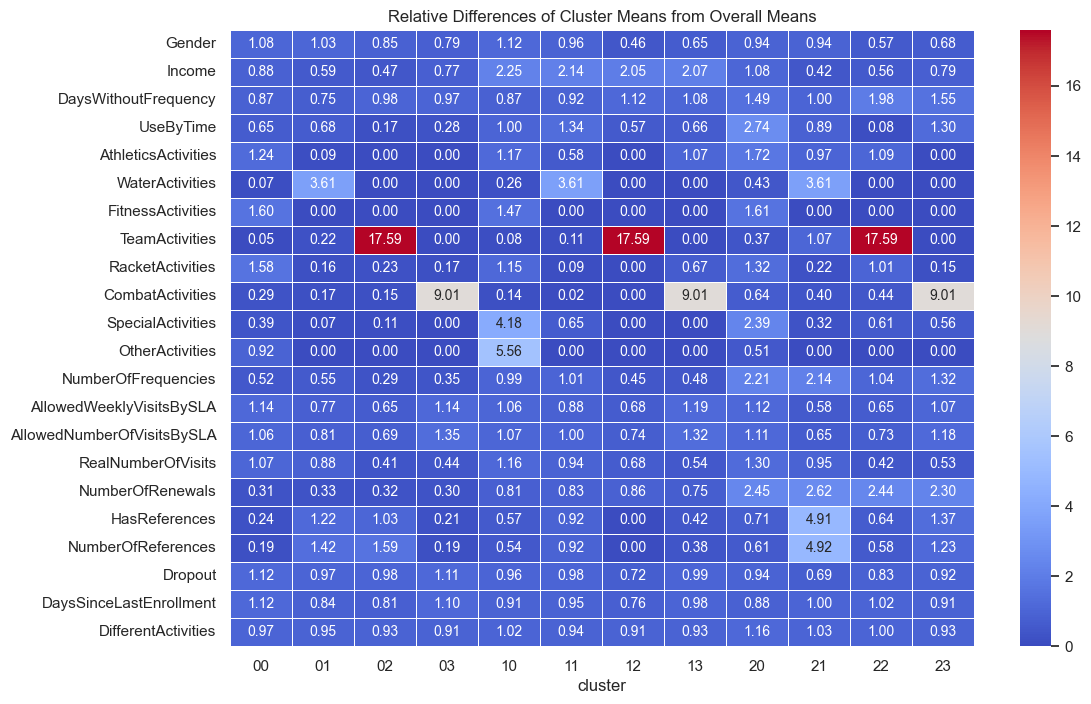

In [188]:
# Group by cluster and calculate the mean for each cluster
cluster_means = df_copy_unscaled[['Gender', 'Income', 'DaysWithoutFrequency', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout', 'DaysSinceLastEnrollment',
       'DifferentActivities']].groupby(df_copy['cluster']).mean().T

# Calculate the overall mean for each variable
overall_means = df_copy_unscaled[['Gender', 'Income', 'DaysWithoutFrequency', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout', 'DaysSinceLastEnrollment',
       'DifferentActivities']].mean()

# Calculate the relative differences between cluster means and overall means
relative_means = (cluster_means.T / overall_means).T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(relative_means, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Relative Differences of Cluster Means from Overall Means')
plt.show()

To further help us in our analysis, the following graphs were also computed, using the scaled version of our dataset with almost all variables, excluding the univariate ones and *LastPeriodStart* and *LastPeriodFinish* to highlight all the changes in the clusters, given that the high scales of some unscaled variables shadowed the clusters' fluctuations in other variables with smaller values.

In [189]:
df2.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout',
       'DaysSinceFirstEnrollment', 'DaysSinceLastEnrollment',
       'DaysSinceLastVisit', 'DifferentActivities'],
      dtype='object')

In [190]:
scale2 = MinMaxScaler().fit(df2[['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout',
       'DaysSinceFirstEnrollment', 'DaysSinceLastEnrollment',
       'DaysSinceLastVisit', 'DifferentActivities']])

minmax_data2 = scale2.transform(df2[['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout',
       'DaysSinceFirstEnrollment', 'DaysSinceLastEnrollment',
       'DaysSinceLastVisit', 'DifferentActivities']])

df_copy_scaled2 = pd.DataFrame(minmax_data2, columns = df2[['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout',
       'DaysSinceFirstEnrollment', 'DaysSinceLastEnrollment',
       'DaysSinceLastVisit', 'DifferentActivities']].columns, index=df2.index)

In [191]:
df_copy_scaled2['cluster'] = customer_labels.astype(str) + ', ' +activities_labels.astype(str)

df_copy_scaled2['CustomerLabels'] = customer_labels.astype(str)

df_copy_scaled2['ActivityLabels'] = activities_labels.astype(str)


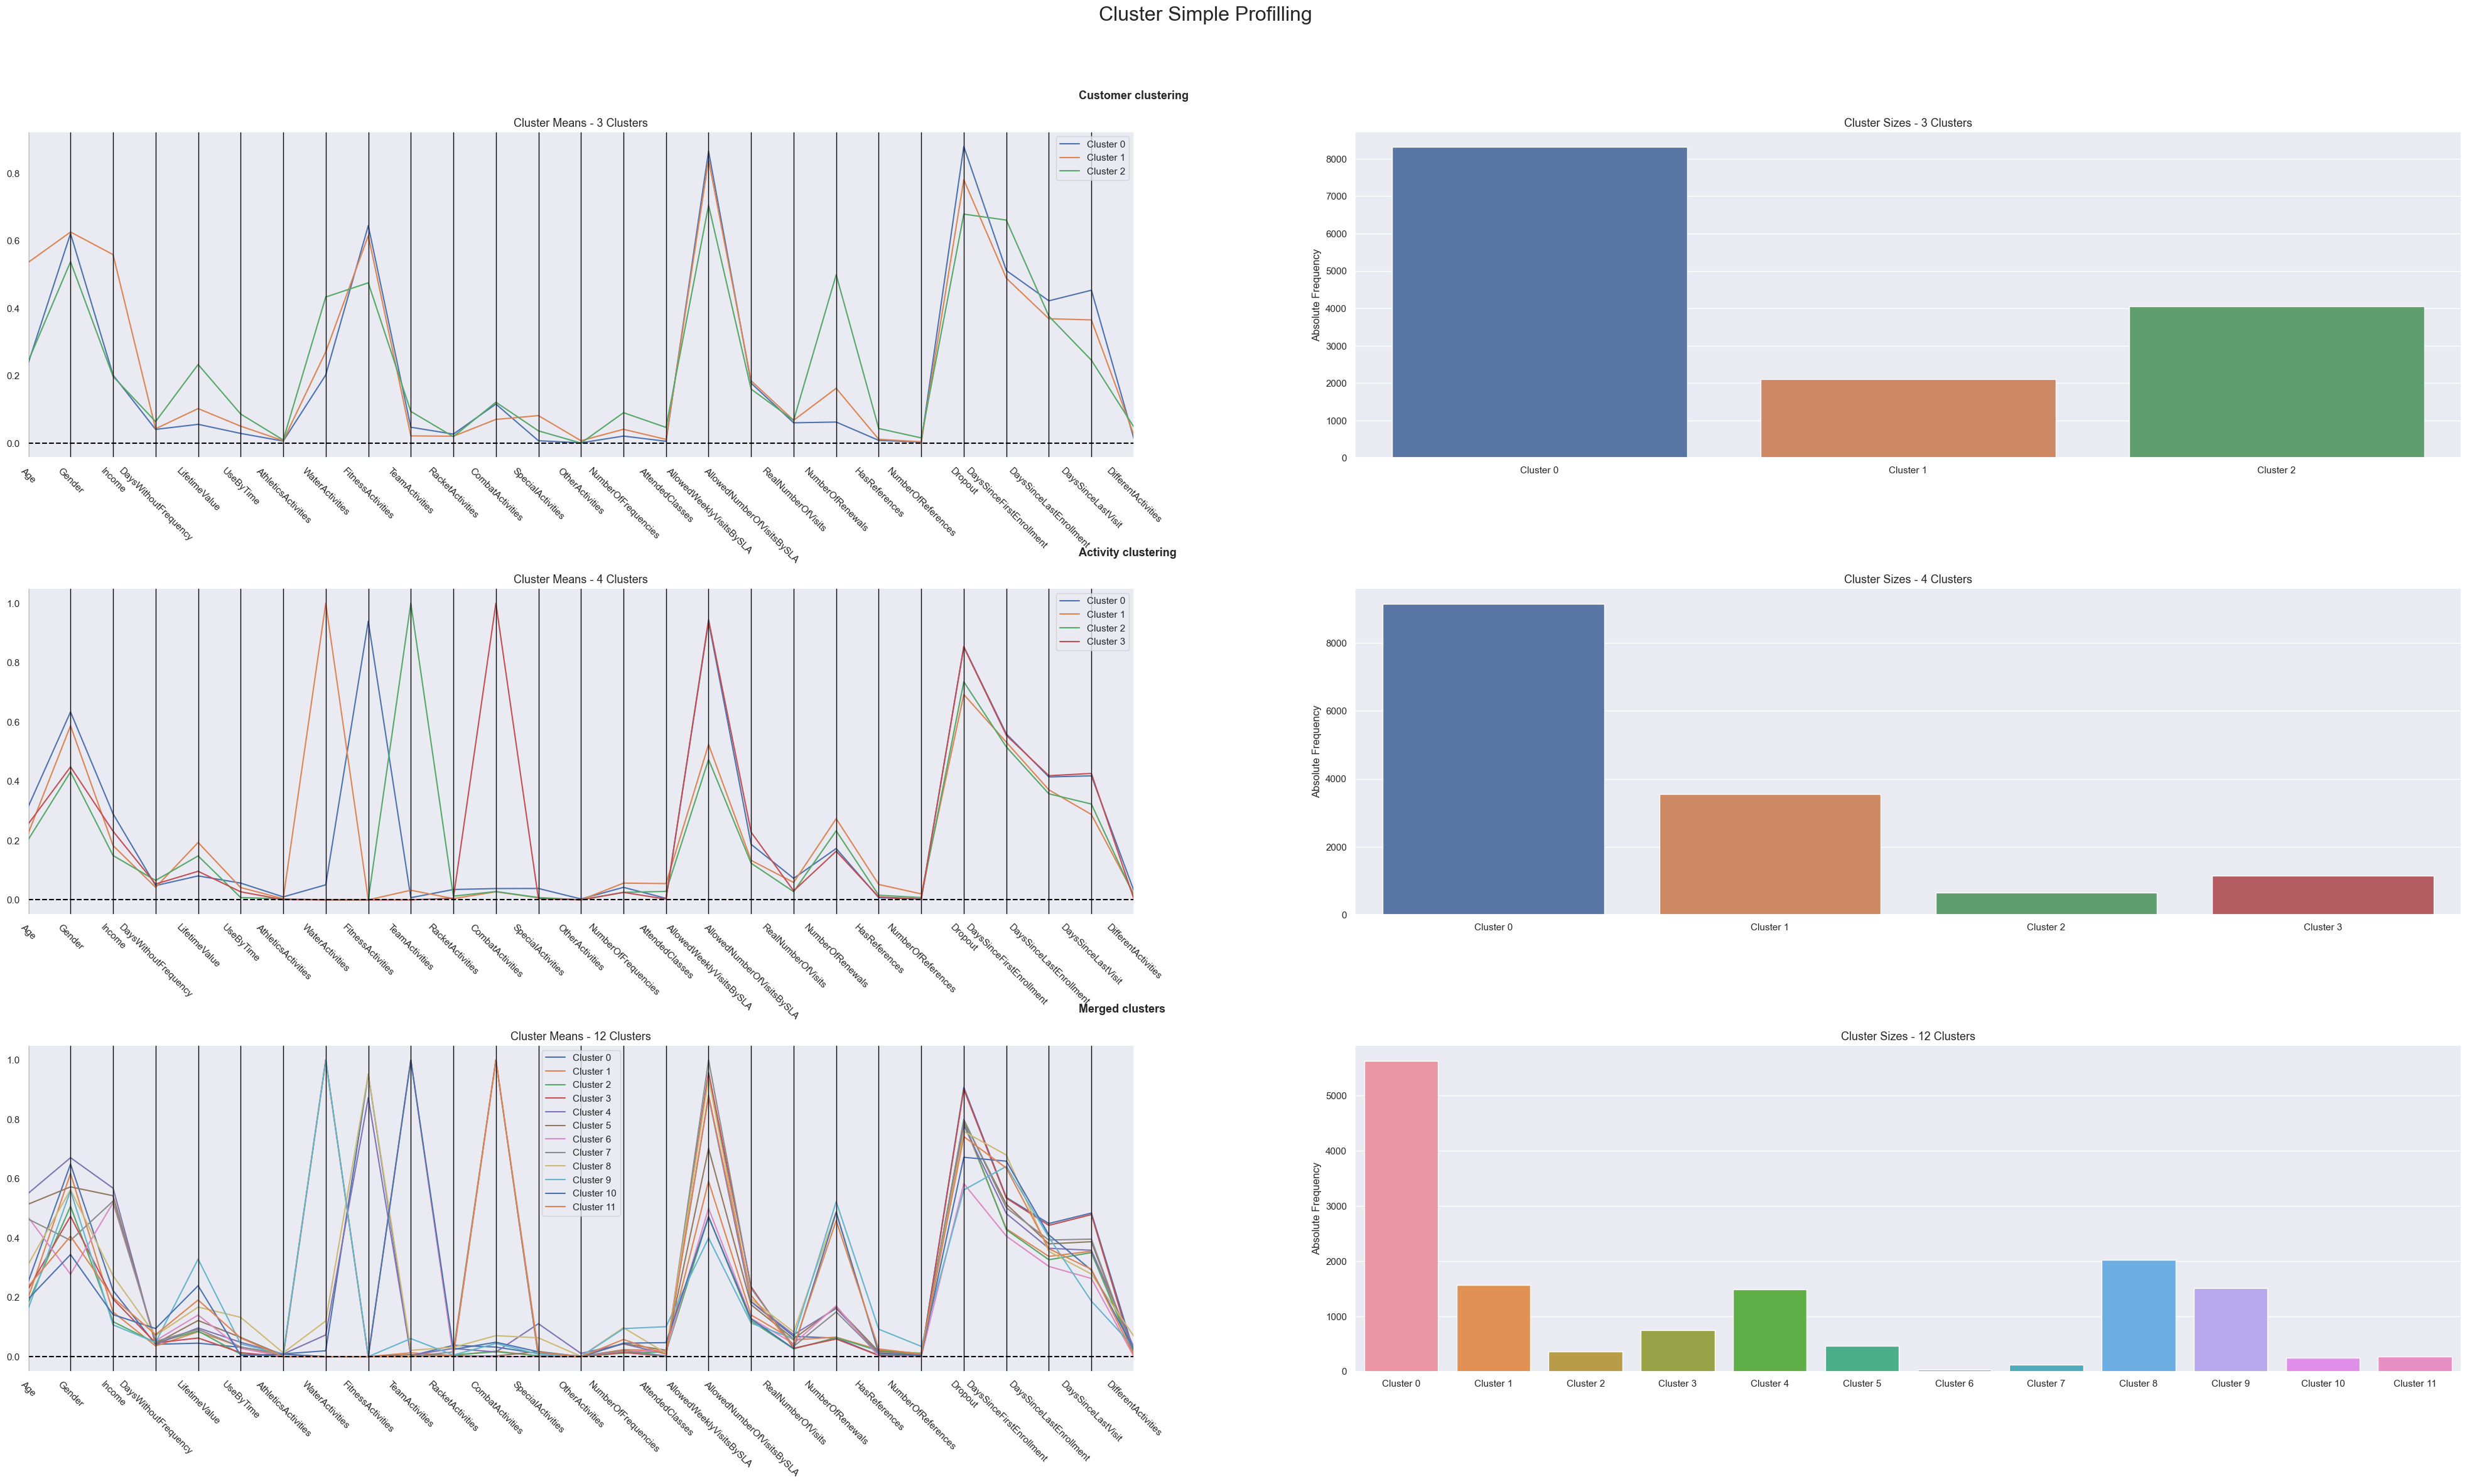

In [192]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels.
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df_copy_scaled2,
    label_columns = ['CustomerLabels', 'ActivityLabels', 'cluster'],
    figsize = (50, 25),
    compar_titles = ["Customer clustering", "Activity clustering", "Merged clusters"]
)

In [193]:
metrics = ['Income',
 'DaysWithoutFrequency',
 'NumberOfFrequencies',
 'AllowedWeeklyVisitsBySLA',
 'AllowedNumberOfVisitsBySLA',
 'RealNumberOfVisits',
 'NumberOfRenewals',
 'NumberOfReferences',
 'DaysSinceLastEnrollment',
 'DifferentActivities']

In [194]:
cluster_plot = {'00': 0, '01': 1, '02': 2, '03': 3, '10': 4, '11': 5, '12': 6, '13': 7, '20': 8, '21': 9, '22': 10, '23': 11}

In [195]:
df_copy['Cluster_Plot'] = df_copy['cluster'].replace(cluster_plot)

In [196]:
two_dim = TSNE(random_state=42).fit_transform(df_copy[metrics])

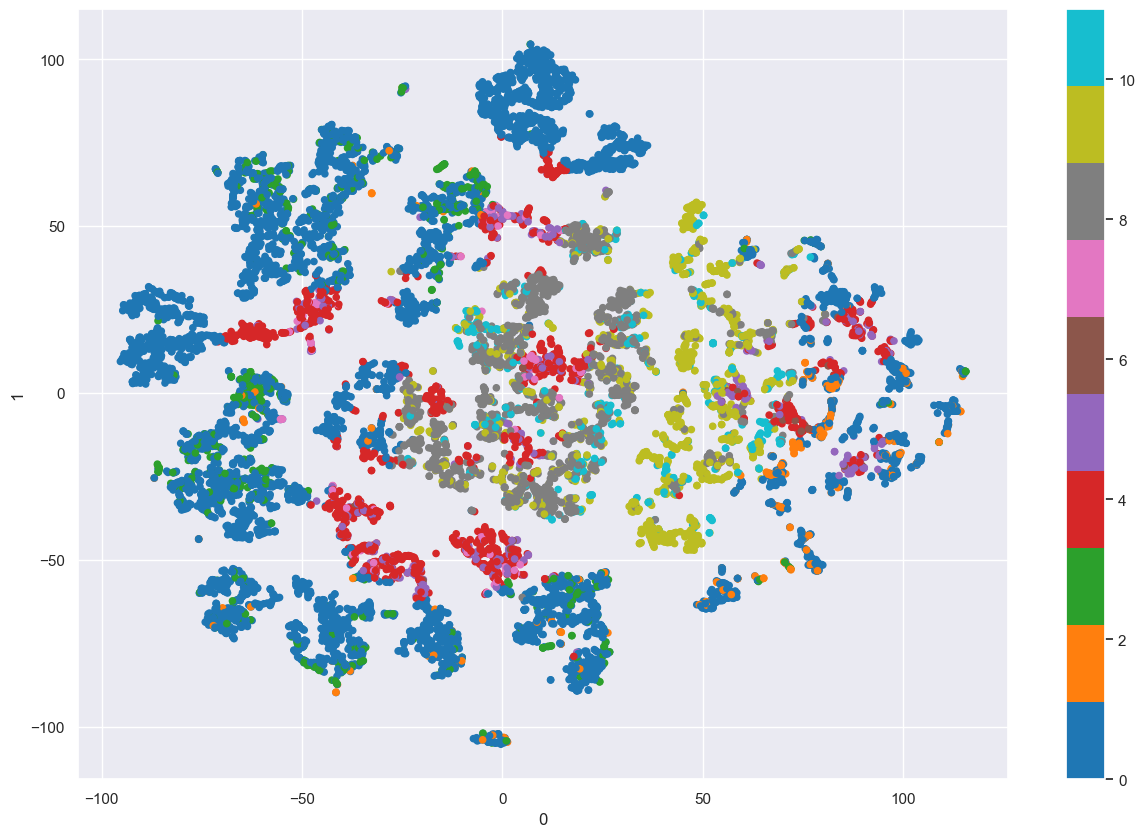

In [197]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_copy['Cluster_Plot'], colormap='tab10', figsize=(15,10))
plt.show()

Let's also make the representation of our clusters if all variables were to be included and not only the metric ones.

In [198]:
df_copy_no_labels = df_copy.drop(['cluster', 'CustomerLabels', 'ActivityLabels',
       'Cluster_Plot'], axis = 1)

In [199]:
two_dim_all_vars = TSNE(random_state=42).fit_transform(df_copy_no_labels)

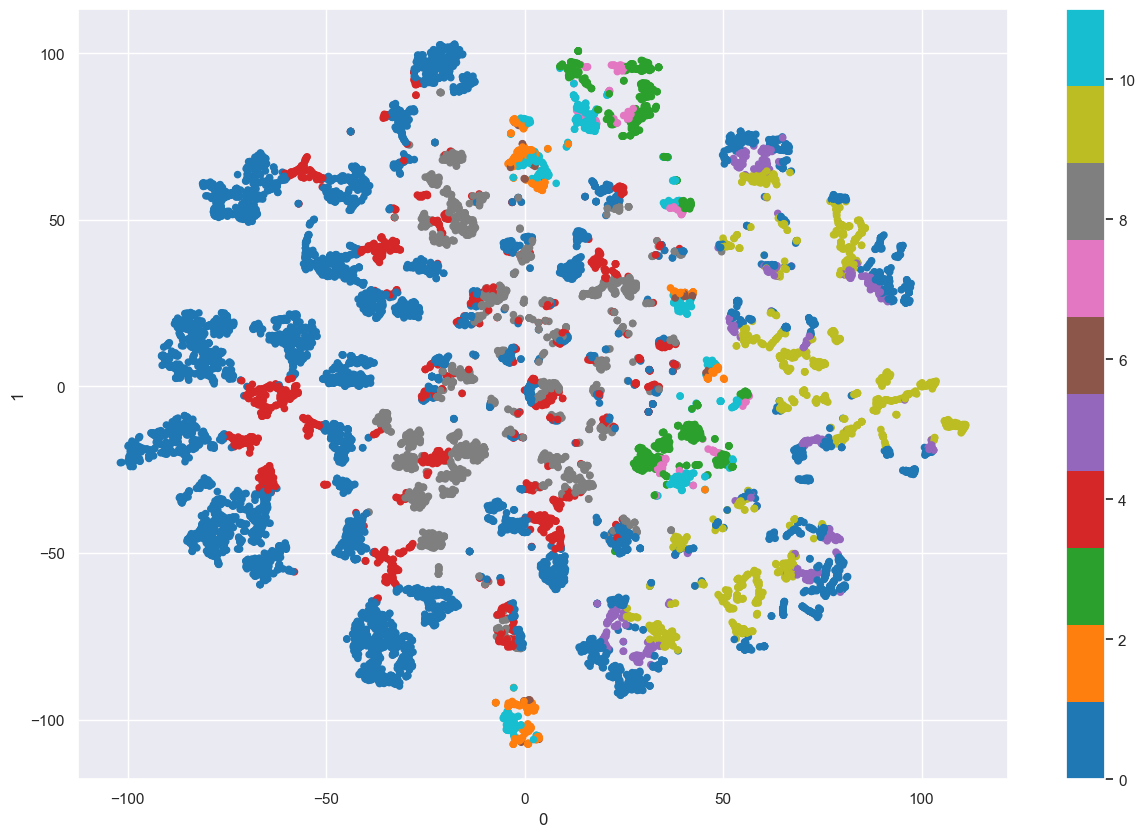

In [200]:
# t-SNE visualization
pd.DataFrame(two_dim_all_vars).plot.scatter(x=0, y=1, c=df_copy['Cluster_Plot'], colormap='tab10', figsize=(15,10))
plt.show()